<a href="https://colab.research.google.com/github/PriyathamVarma/PriyathamVarma/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [922]:
# Mounting google drive for accessing files
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [923]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import seaborn
#import seaborn as sns
# imports
#import plotly.express as px 
# Tensorflow
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import datetime

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

# Miles


In [924]:
# Creating a wb variable to store the spreadsheet bu URL

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=0')

In [925]:
# Getting the sheet(if multiple sheets exists) by sheet name

sheet = wb.worksheet('Trips')

In [926]:
# Getting all values that exist in the sheet

data = sheet.get_all_values()

In [927]:
# Converting the values into a dataframe

data_frame = pd.DataFrame(data)

In [928]:
data_frame.style.background_gradient(cmap="Blues")

In [929]:
# Transpose of the table
data_frame_transposed = data_frame.T
data_frame_transposed

0          1   ...            15           16
0   Purpose  Commuting  ...  All purposes  individuals
1      2003        166  ...          1060        16685
2      2004        170  ...          1054        16487
3      2005        162  ...          1070        16956
4      2006        162  ...          1067        16648
5      2007        164  ...           998        16858
6      2008        158  ...          1014        16360
7      2009        147  ...           997        17299
8      2010        150  ...           982        16553
9      2011        148  ...           972        15730
10     2012        147  ...           971        16670
11     2013        146  ...           943        16192
12     2014        148  ...           942        16491
13     2015        144  ...           934        15525
14     2016        144  ...           954        15840
15     2017        144  ...           975        14541
16     2018        144  ...           986        14150
17     2019        140  ...           953        14356

[18 rows x 17 columns]

In [930]:
# Getting the first row to be the header

data_frame_transposed.columns = data_frame_transposed.iloc[0]

data_frame_transposed = data_frame_transposed.iloc[1:].reset_index(drop=True)

data_frame_transposed

0  Purpose Commuting  ... All purposes individuals
0     2003       166  ...         1060       16685
1     2004       170  ...         1054       16487
2     2005       162  ...         1070       16956
3     2006       162  ...         1067       16648
4     2007       164  ...          998       16858
5     2008       158  ...         1014       16360
6     2009       147  ...          997       17299
7     2010       150  ...          982       16553
8     2011       148  ...          972       15730
9     2012       147  ...          971       16670
10    2013       146  ...          943       16192
11    2014       148  ...          942       16491
12    2015       144  ...          934       15525
13    2016       144  ...          954       15840
14    2017       144  ...          975       14541
15    2018       144  ...          986       14150
16    2019       140  ...          953       14356

[17 rows x 17 columns]

In [931]:
new_df = data_frame_transposed.set_index('Purpose')
new_df.style.background_gradient(cmap = "Greens")

In [932]:

max_value_in_population = int(new_df.individuals.max())
new_df.individuals.values

array(['16685', '16487', '16956', '16648', '16858', '16360', '17299',
       '16553', '15730', '16670', '16192', '16491', '15525', '15840',
       '14541', '14150', '14356'], dtype=object)

In [933]:
'''max_value_in_population'''


'max_value_in_population'

In [934]:

population_size_percentage_list = []
for values in new_df.individuals:
  new_values = int(values)/max_value_in_population
  needed_values = (max_value_in_population-int(values))/int(values)
  population_size_percentage_list.append(needed_values)
  #print(new_values)
  #print(needed_values)

In [935]:

'''population_size_percentage_list'''

'population_size_percentage_list'

In [936]:

sample = new_df.values.astype(int)
numeric_df = pd.DataFrame(sample)
numeric_df

0   1   2   3    4   5    6    7   8   9   10  11  12  13    14     15
0   166  34  72  52  215  96  110  122  49  47  20  11  24  41  1060  16685
1   170  35  70  51  214  93  109  121  46  51  19  11  24  41  1054  16487
2   162  38  69  52  212  96  112  125  50  52  17  12  28  45  1070  16956
3   162  35  65  47  225  98  109  121  52  51  16  11  27  47  1067  16648
4   164  34  65  47  191  87  100  112  50  49  18  11  28  41   998  16858
5   158  31  64  46  202  97  106  110  48  44  20  11  29  46  1014  16360
6   147  30  65  48  196  93  106  111  49  44  20  12  28  47   997  17299
7   150  29  62  52  197  92  101  102  48  47  18  12  28  45   982  16553
8   148  28  61  50  194  93   95  105  46  48  17  11  30  46   972  15730
9   147  30  66  56  191  88   96  103  45  52  15  10  27  46   971  16670
10  146  30  66  51  184  87   91   96  45  51  14  10  28  44   943  16192
11  148  32  65  53  178  86   95   92  47  52  13   9  29  42   942  16491
12  144  31  65  50  182  84   91   89  48  52  13  12  28  47   934  15525
13  144  33  64  54  183  84   89   90  50  56  14   9  29  56   954  15840
14  144  27  67  54  189  87   96   88  49  54  14  12  35  58   975  14541
15  144  30  66  60  188  89   92   84  53  60  14  12  33  62   986  14150
16  140  28  68  58  181  83   88   82  48  59  13  13  32  61   953  14356

In [937]:

years_list = []
for values in new_df.index:
  years_list.append(values)
  
years_list  

['2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']

In [938]:

numeric_df['Year'] = years_list
year_indexed_numeric_df = numeric_df.set_index('Year')
year_indexed_numeric_df

0   1   2   3    4   5    6    7   8   9   10  11  12  13    14     15
Year                                                                         
2003  166  34  72  52  215  96  110  122  49  47  20  11  24  41  1060  16685
2004  170  35  70  51  214  93  109  121  46  51  19  11  24  41  1054  16487
2005  162  38  69  52  212  96  112  125  50  52  17  12  28  45  1070  16956
2006  162  35  65  47  225  98  109  121  52  51  16  11  27  47  1067  16648
2007  164  34  65  47  191  87  100  112  50  49  18  11  28  41   998  16858
2008  158  31  64  46  202  97  106  110  48  44  20  11  29  46  1014  16360
2009  147  30  65  48  196  93  106  111  49  44  20  12  28  47   997  17299
2010  150  29  62  52  197  92  101  102  48  47  18  12  28  45   982  16553
2011  148  28  61  50  194  93   95  105  46  48  17  11  30  46   972  15730
2012  147  30  66  56  191  88   96  103  45  52  15  10  27  46   971  16670
2013  146  30  66  51  184  87   91   96  45  51  14  10  28  44   943  16192
2014  148  32  65  53  178  86   95   92  47  52  13   9  29  42   942  16491
2015  144  31  65  50  182  84   91   89  48  52  13  12  28  47   934  15525
2016  144  33  64  54  183  84   89   90  50  56  14   9  29  56   954  15840
2017  144  27  67  54  189  87   96   88  49  54  14  12  35  58   975  14541
2018  144  30  66  60  188  89   92   84  53  60  14  12  33  62   986  14150
2019  140  28  68  58  181  83   88   82  48  59  13  13  32  61   953  14356

In [939]:

columns_list = []
for values in new_df.columns:
  columns_list.append(values)

columns_list

['Commuting',
 'Business',
 'Education',
 'Escort education',
 'Shopping',
 'Other escort',
 'Personal business',
 'Visiting friends at private home',
 'Visiting friends elsewhere',
 'Entertainment / public activity',
 'Sport: participate',
 'Holiday: base',
 'Day trip',
 'Other including just walk',
 'All purposes',
 'individuals']

In [940]:

year_indexed_numeric_df.columns = columns_list
year_indexed_numeric_df.style.background_gradient(cmap="Greens")

In [941]:

new_df = year_indexed_numeric_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2003 to 2019
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Commuting                         17 non-null     int64
 1   Business                          17 non-null     int64
 2   Education                         17 non-null     int64
 3   Escort education                  17 non-null     int64
 4   Shopping                          17 non-null     int64
 5   Other escort                      17 non-null     int64
 6   Personal business                 17 non-null     int64
 7   Visiting friends at private home  17 non-null     int64
 8   Visiting friends elsewhere        17 non-null     int64
 9   Entertainment / public activity   17 non-null     int64
 10  Sport: participate                17 non-null     int64
 11  Holiday: base                     17 non-null     int64
 12  Day trip                          17 n

In [942]:
new_row = pd.DataFrame(population_size_percentage_list)
len(new_df)
len(new_row)
new_df.shape
new_row.shape

(17, 1)

In [943]:
new_df['sample_percentage'] = population_size_percentage_list
new_df

Commuting  Business  ...  individuals  sample_percentage
Year                       ...                                
2003        166        34  ...        16685           0.036800
2004        170        35  ...        16487           0.049251
2005        162        38  ...        16956           0.020229
2006        162        35  ...        16648           0.039104
2007        164        34  ...        16858           0.026160
2008        158        31  ...        16360           0.057396
2009        147        30  ...        17299           0.000000
2010        150        29  ...        16553           0.045067
2011        148        28  ...        15730           0.099746
2012        147        30  ...        16670           0.037732
2013        146        30  ...        16192           0.068367
2014        148        32  ...        16491           0.048996
2015        144        31  ...        15525           0.114267
2016        144        33  ...        15840           0.092109
2017        144        27  ...        14541           0.189671
2018        144        30  ...        14150           0.222544
2019        140        28  ...        14356           0.205001

[17 rows x 17 columns]

In [944]:
main_array = []
for i in range(0,new_df.shape[0]):
  #print(new_df.iloc[i:i+1,:-1].values)
  percentage_value = new_df.iloc[i:i+1,:-1].values
  #print(percentage_value.shape)
  req_array = []
  for j in range(0,percentage_value.shape[1]):
    adj_value = new_df.iloc[i:i+1,-1:].values[0][0]
    ind_value = new_df.iloc[i:i+1,j:j+1].values[0][0]
    z = ind_value*adj_value
    req_value = ind_value + z
    req_list = req_value.tolist()
    #print(req_list)
    req_array.append(req_list)
  #print(req_array)
  main_array.append(req_array)
  #print(main_array)
    #req_array = np.concatenate((req_value))

In [945]:
'''main_array'''

'main_array'

In [946]:
req_array
req_df = pd.DataFrame(main_array)
req_df

0          1          2   ...         13           14       15
0   172.108720  35.251184  74.649565  ...  42.508780  1099.007492  17299.0
1   178.372657  36.723782  73.447565  ...  43.019288  1105.910475  17299.0
2   165.277070  38.768695  70.395789  ...  45.910297  1091.644845  17299.0
3   168.334815  36.368633  67.541747  ...  48.837878  1108.723751  17299.0
4   168.290189  34.889429  66.700380  ...  42.072547  1024.107367  17299.0
5   167.068582  32.779279  67.673350  ...  48.640220  1072.199633  17299.0
6   147.000000  30.000000  65.000000  ...  47.000000   997.000000  17299.0
7   156.760104  30.306953  64.794176  ...  47.028031  1026.256147  17299.0
8   162.762365  30.792880  67.084488  ...  50.588303  1068.952829  17299.0
9   152.546671  31.131974  68.490342  ...  47.735693  1007.638212  17299.0
10  155.981596  32.051013  70.512228  ...  47.008152  1007.470170  17299.0
11  155.251470  33.567886  68.184767  ...  44.057850   988.154630  17299.0
12  160.454493  34.542287  72.427375  ...  52.370564  1040.725668  17299.0
13  157.263636  36.039583  69.894949  ...  61.158081  1041.871591  17299.0
14  171.312564  32.121106  79.707929  ...  69.000894  1159.928822  17299.0
15  176.046360  36.676325  80.687915  ...  75.797739  1205.428551  17299.0
16  168.700195  33.740039  81.940095  ...  73.505085  1148.366328  17299.0

[17 rows x 16 columns]

In [947]:
# dates
req_df['date'] = years_list
final_data = req_df.set_index('date')
final_data

0          1          2   ...         13           14       15
date                                    ...                                 
2003  172.108720  35.251184  74.649565  ...  42.508780  1099.007492  17299.0
2004  178.372657  36.723782  73.447565  ...  43.019288  1105.910475  17299.0
2005  165.277070  38.768695  70.395789  ...  45.910297  1091.644845  17299.0
2006  168.334815  36.368633  67.541747  ...  48.837878  1108.723751  17299.0
2007  168.290189  34.889429  66.700380  ...  42.072547  1024.107367  17299.0
2008  167.068582  32.779279  67.673350  ...  48.640220  1072.199633  17299.0
2009  147.000000  30.000000  65.000000  ...  47.000000   997.000000  17299.0
2010  156.760104  30.306953  64.794176  ...  47.028031  1026.256147  17299.0
2011  162.762365  30.792880  67.084488  ...  50.588303  1068.952829  17299.0
2012  152.546671  31.131974  68.490342  ...  47.735693  1007.638212  17299.0
2013  155.981596  32.051013  70.512228  ...  47.008152  1007.470170  17299.0
2014  155.251470  33.567886  68.184767  ...  44.057850   988.154630  17299.0
2015  160.454493  34.542287  72.427375  ...  52.370564  1040.725668  17299.0
2016  157.263636  36.039583  69.894949  ...  61.158081  1041.871591  17299.0
2017  171.312564  32.121106  79.707929  ...  69.000894  1159.928822  17299.0
2018  176.046360  36.676325  80.687915  ...  75.797739  1205.428551  17299.0
2019  168.700195  33.740039  81.940095  ...  73.505085  1148.366328  17299.0

[17 rows x 16 columns]

In [948]:
final_data.columns = columns_list
final_data

Commuting   Business  ...  All purposes  individuals
date                         ...                           
2003  172.108720  35.251184  ...   1099.007492      17299.0
2004  178.372657  36.723782  ...   1105.910475      17299.0
2005  165.277070  38.768695  ...   1091.644845      17299.0
2006  168.334815  36.368633  ...   1108.723751      17299.0
2007  168.290189  34.889429  ...   1024.107367      17299.0
2008  167.068582  32.779279  ...   1072.199633      17299.0
2009  147.000000  30.000000  ...    997.000000      17299.0
2010  156.760104  30.306953  ...   1026.256147      17299.0
2011  162.762365  30.792880  ...   1068.952829      17299.0
2012  152.546671  31.131974  ...   1007.638212      17299.0
2013  155.981596  32.051013  ...   1007.470170      17299.0
2014  155.251470  33.567886  ...    988.154630      17299.0
2015  160.454493  34.542287  ...   1040.725668      17299.0
2016  157.263636  36.039583  ...   1041.871591      17299.0
2017  171.312564  32.121106  ...   1159.928822      17299.0
2018  176.046360  36.676325  ...   1205.428551      17299.0
2019  168.700195  33.740039  ...   1148.366328      17299.0

[17 rows x 16 columns]

In [949]:
'''frames = []
for i in range(0,new_df.shape[0]):
  #print(new_df.iloc[i:i+1,:-1].values)
  percentage_value = new_df.iloc[i:i+1,-1:].values
  #print(new_df.iloc[i:i+1,-1:].values)
  percentage_adjustment = new_df.iloc[i:i+1,:-1].values*percentage_value
  #print(type(percentage_adjustment))
  new_df2 = pd.DataFrame(percentage_adjustment)
  print(type(new_df2))
  frames.append(new_df2)'''



'frames = []\nfor i in range(0,new_df.shape[0]):\n  #print(new_df.iloc[i:i+1,:-1].values)\n  percentage_value = new_df.iloc[i:i+1,-1:].values\n  #print(new_df.iloc[i:i+1,-1:].values)\n  percentage_adjustment = new_df.iloc[i:i+1,:-1].values*percentage_value\n  #print(type(percentage_adjustment))\n  new_df2 = pd.DataFrame(percentage_adjustment)\n  print(type(new_df2))\n  frames.append(new_df2)'

In [950]:
'''frames
result = pd.concat(frames)
result'''

'frames\nresult = pd.concat(frames)\nresult'

In [951]:
'''columns_list'''

'columns_list'

In [952]:
'''columns_list.remove('sample_percentage')
result.columns = columns_list'''

"columns_list.remove('sample_percentage')\nresult.columns = columns_list"

In [953]:
'''years_list
result['date'] = years_list
final_data = result.set_index('date')
final_data'''

"years_list\nresult['date'] = years_list\nfinal_data = result.set_index('date')\nfinal_data"

In [954]:
main_data = final_data.astype(int)

In [955]:
main_data

Commuting  Business  ...  All purposes  individuals
date                       ...                           
2003        172        35  ...          1099        17299
2004        178        36  ...          1105        17299
2005        165        38  ...          1091        17299
2006        168        36  ...          1108        17299
2007        168        34  ...          1024        17299
2008        167        32  ...          1072        17299
2009        147        30  ...           997        17299
2010        156        30  ...          1026        17299
2011        162        30  ...          1068        17299
2012        152        31  ...          1007        17299
2013        155        32  ...          1007        17299
2014        155        33  ...           988        17299
2015        160        34  ...          1040        17299
2016        157        36  ...          1041        17299
2017        171        32  ...          1159        17299
2018        176        36  ...          1205        17299
2019        168        33  ...          1148        17299

[17 rows x 16 columns]

In [956]:
main_data.style.background_gradient(cmap='Blues')

# Linear regression for trips

In [957]:
x = np.array(years_list).reshape(-1,1)


In [958]:
x = x.astype(int)

In [959]:
x

array([[2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

R Square test value: 0.029130057619456196


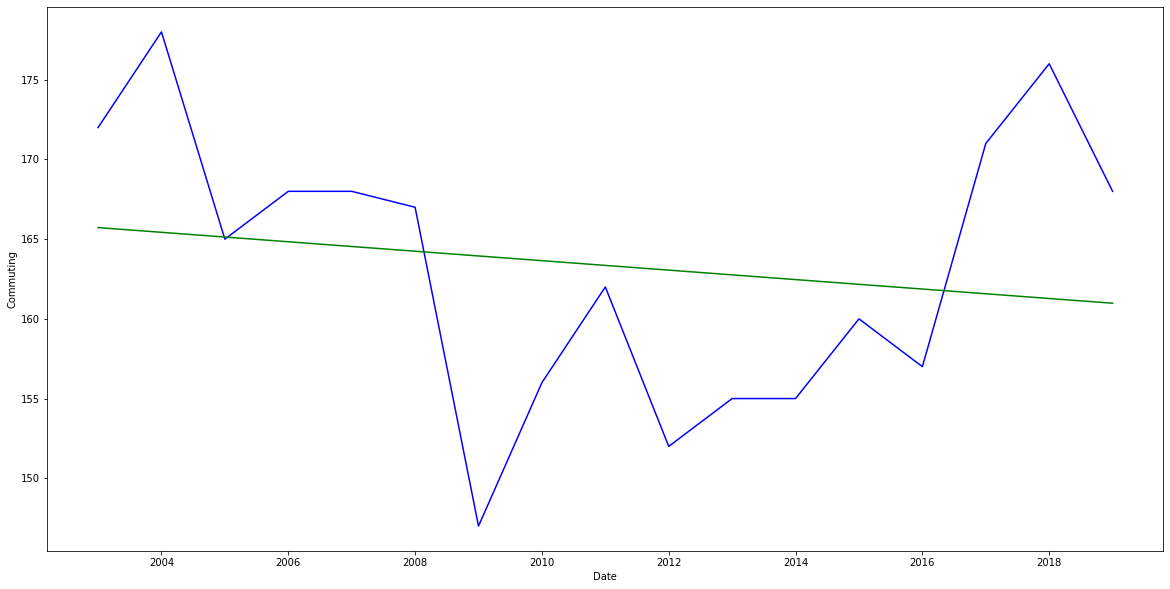

R Square test value: 0.04836131095123741


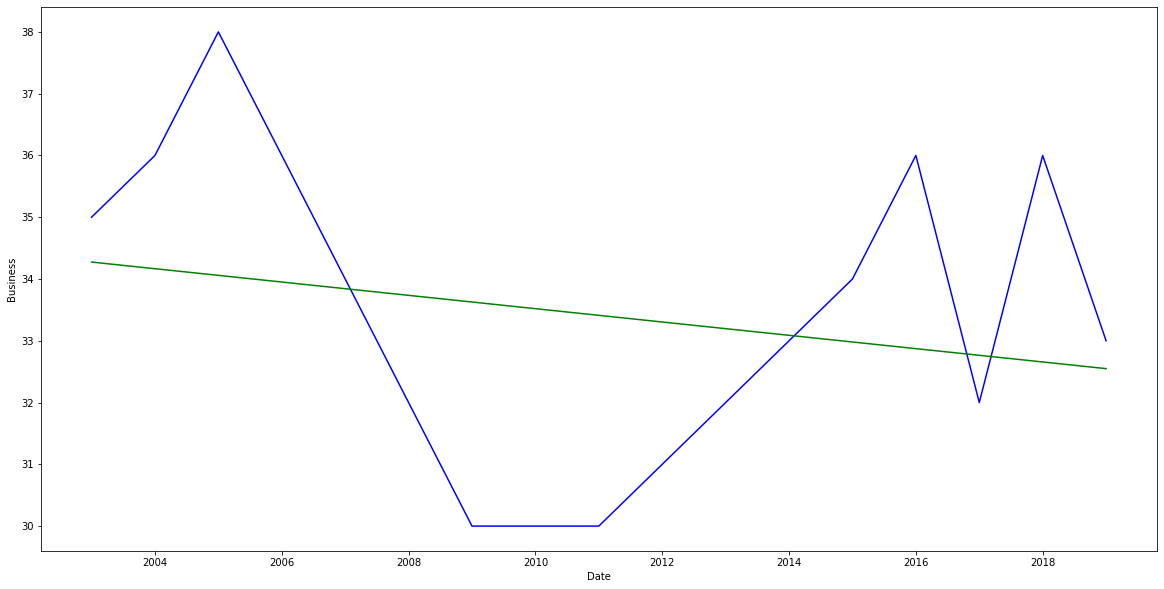

R Square test value: 0.24671052631577284


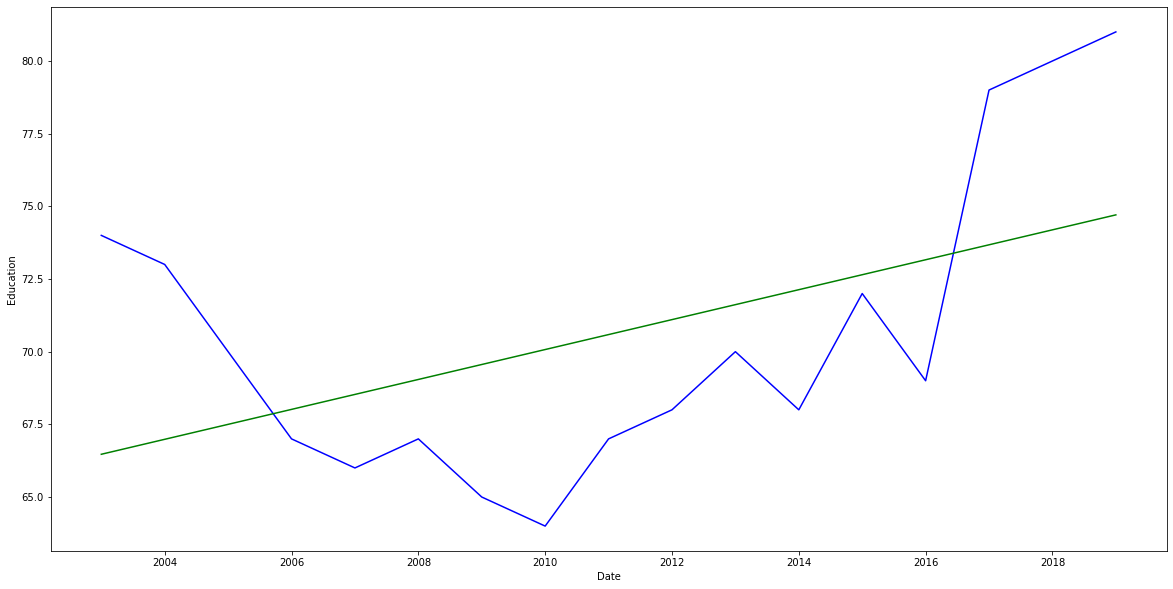

R Square test value: 0.5995747085415163


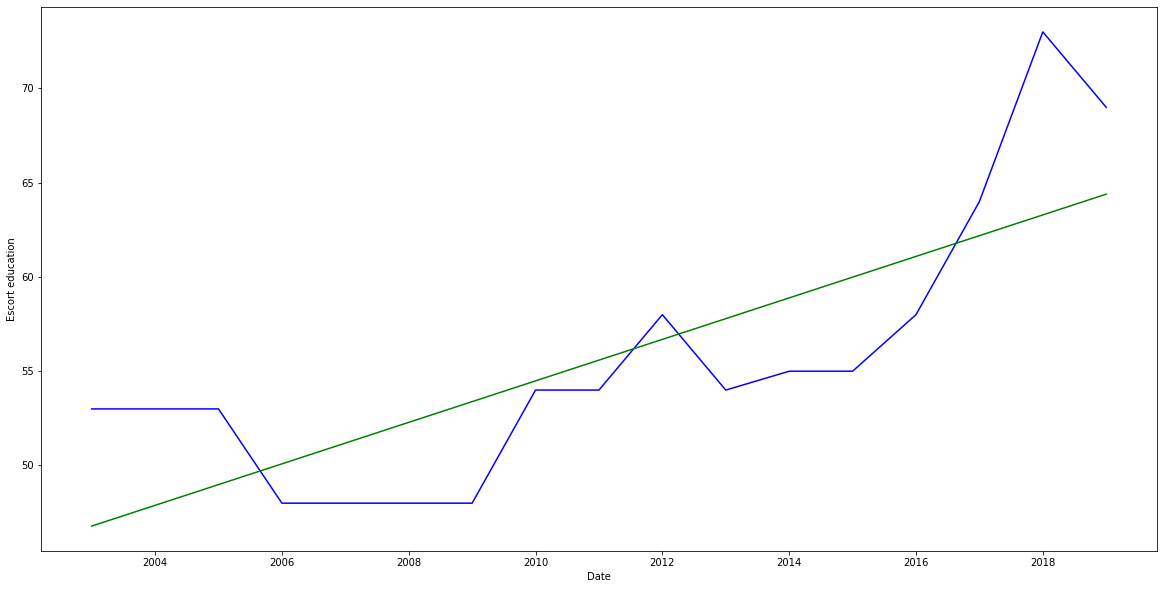

R Square test value: 0.02540710361714782


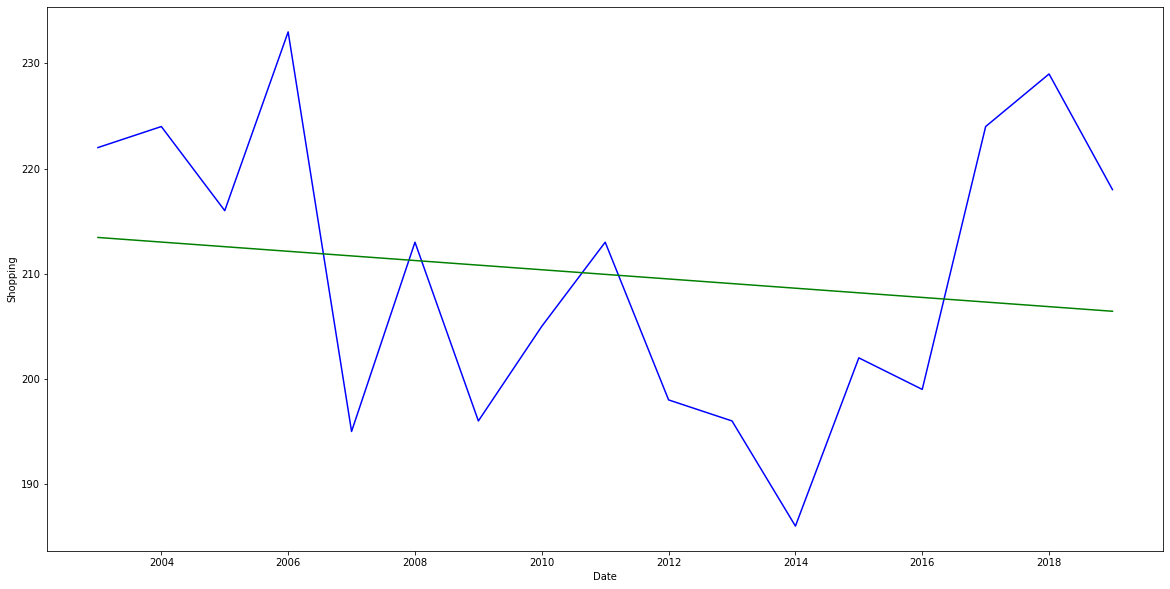

R Square test value: 0.009936766034325584


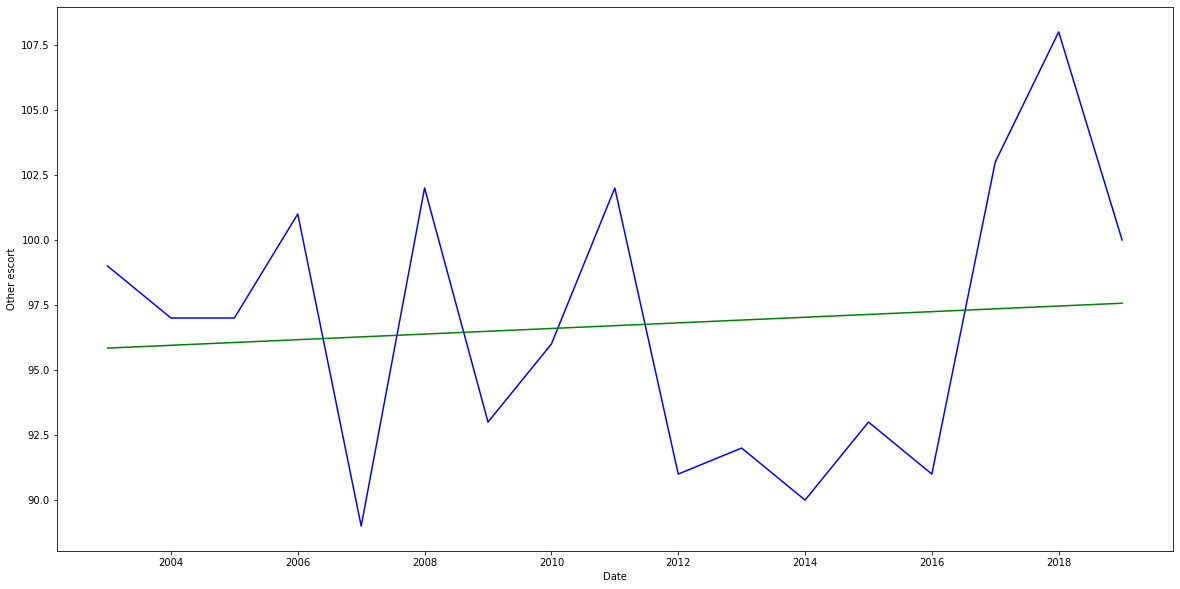

R Square test value: 0.18244032174363933


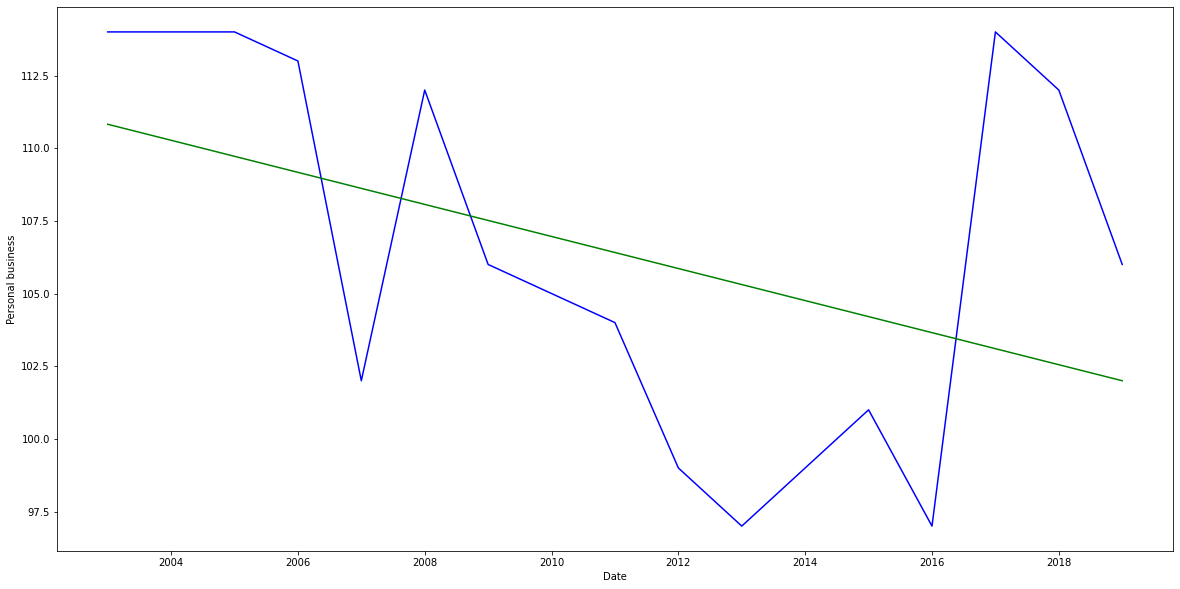

R Square test value: 0.8296393795289871


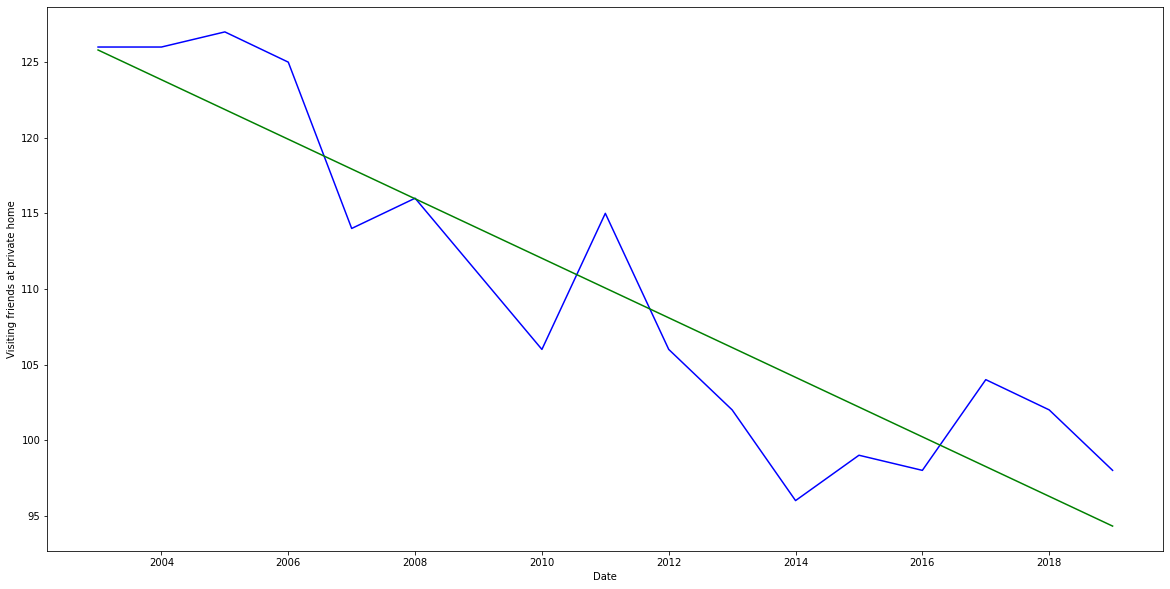

R Square test value: 0.33691996791312284


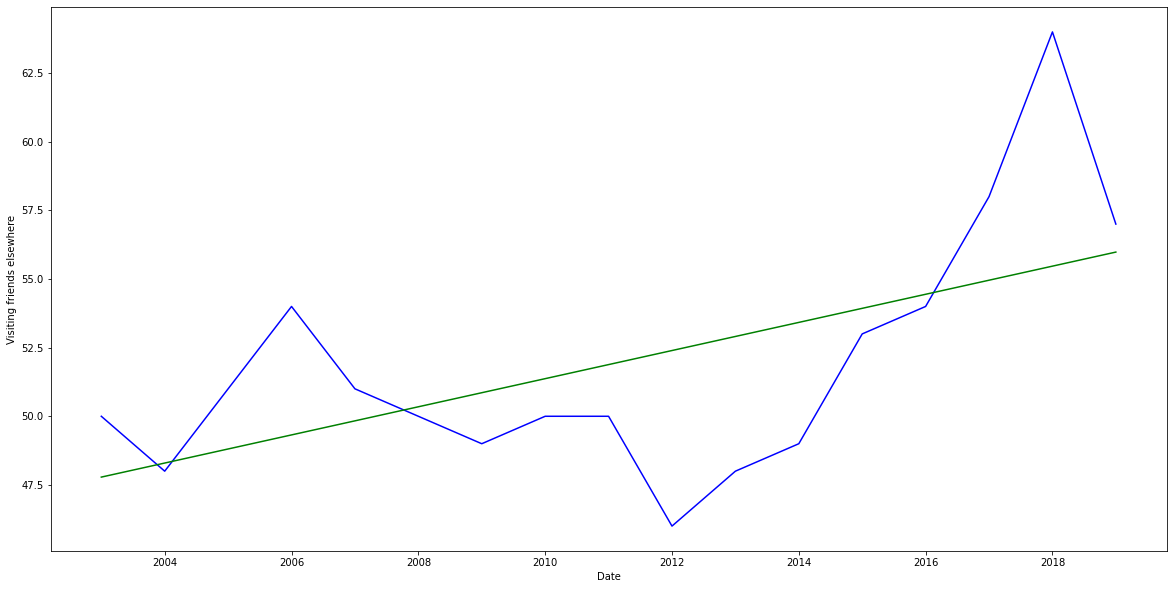

R Square test value: 0.6124770134354103


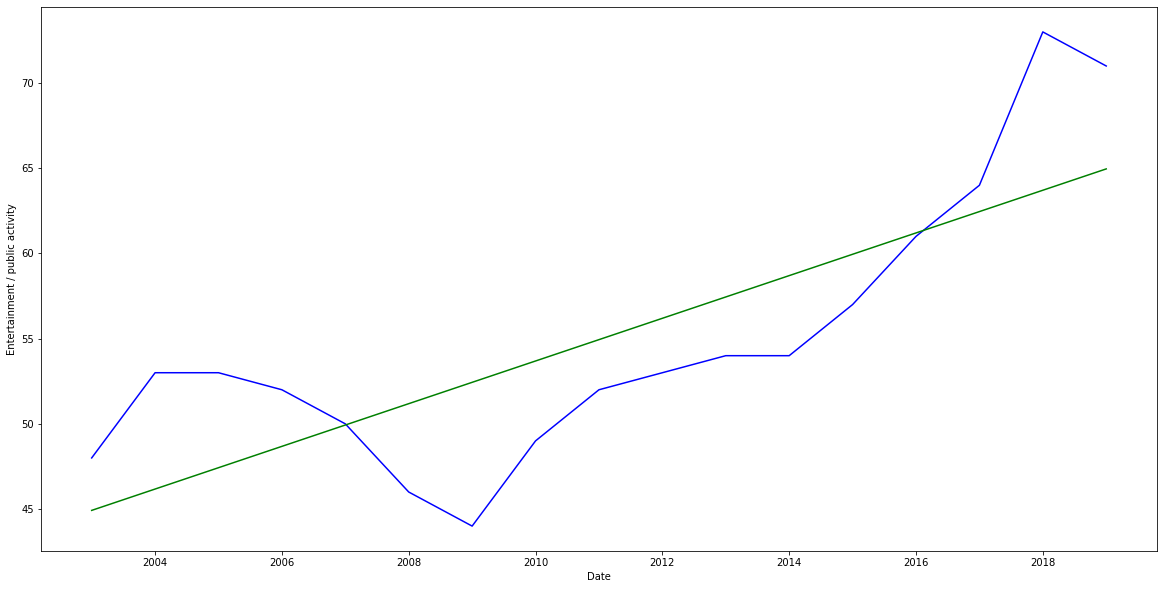

R Square test value: 0.3989361702127673


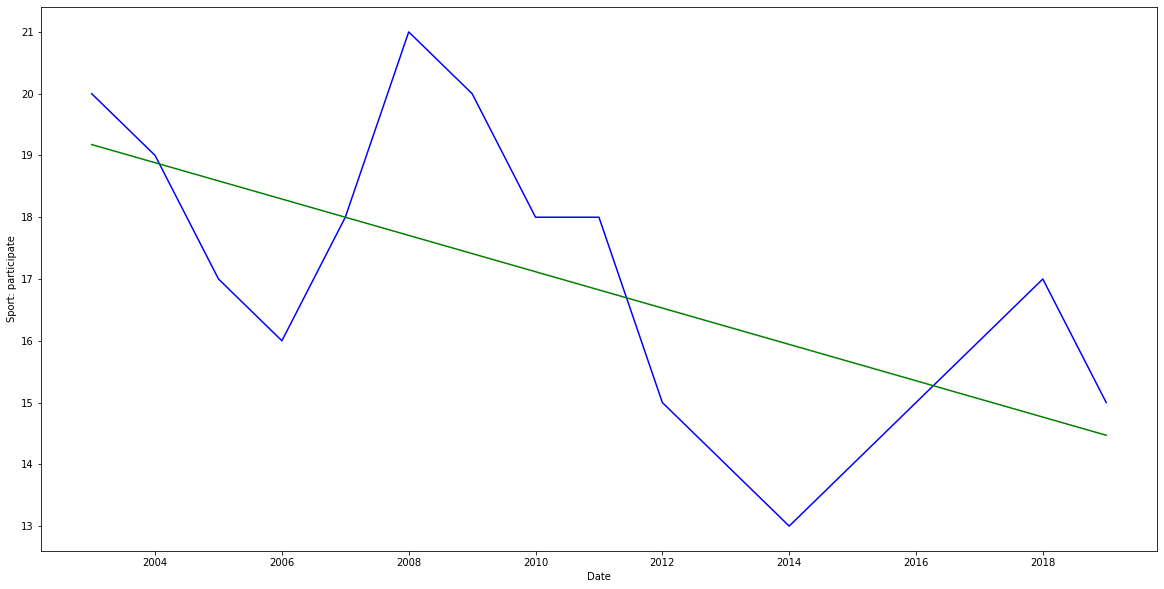

R Square test value: 0.13823341836734693


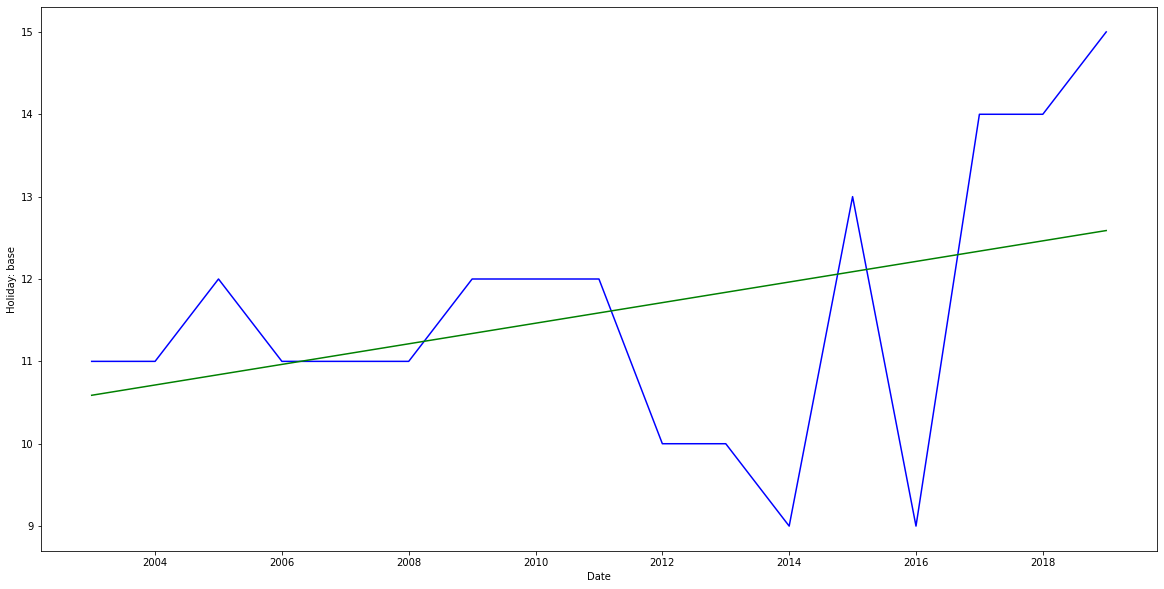

R Square test value: 0.6946375306274577


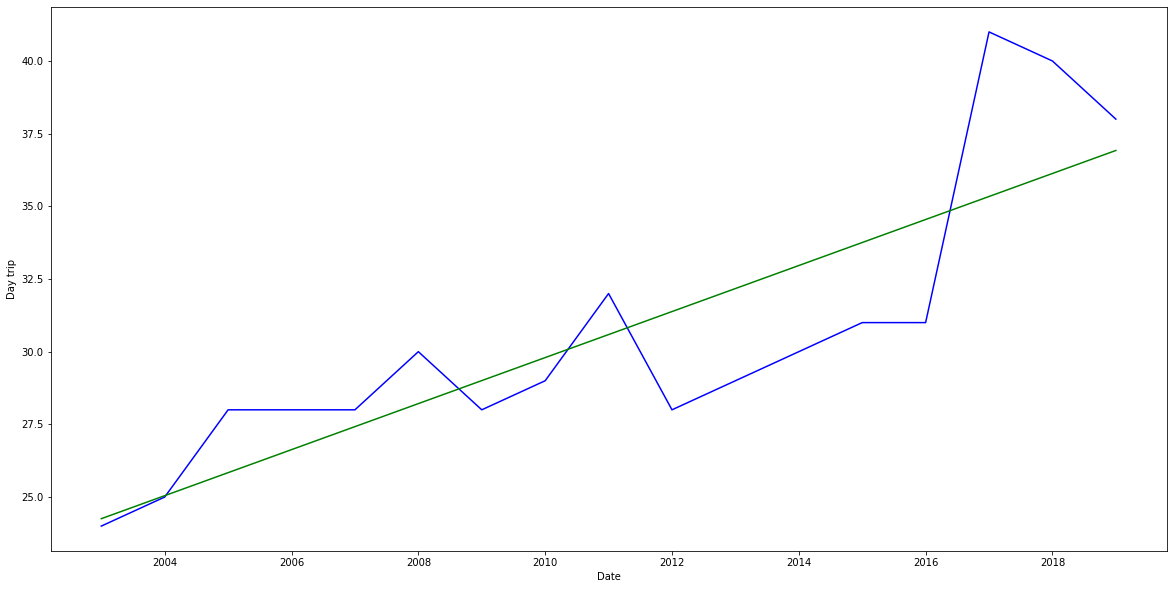

R Square test value: 0.6591880678122541


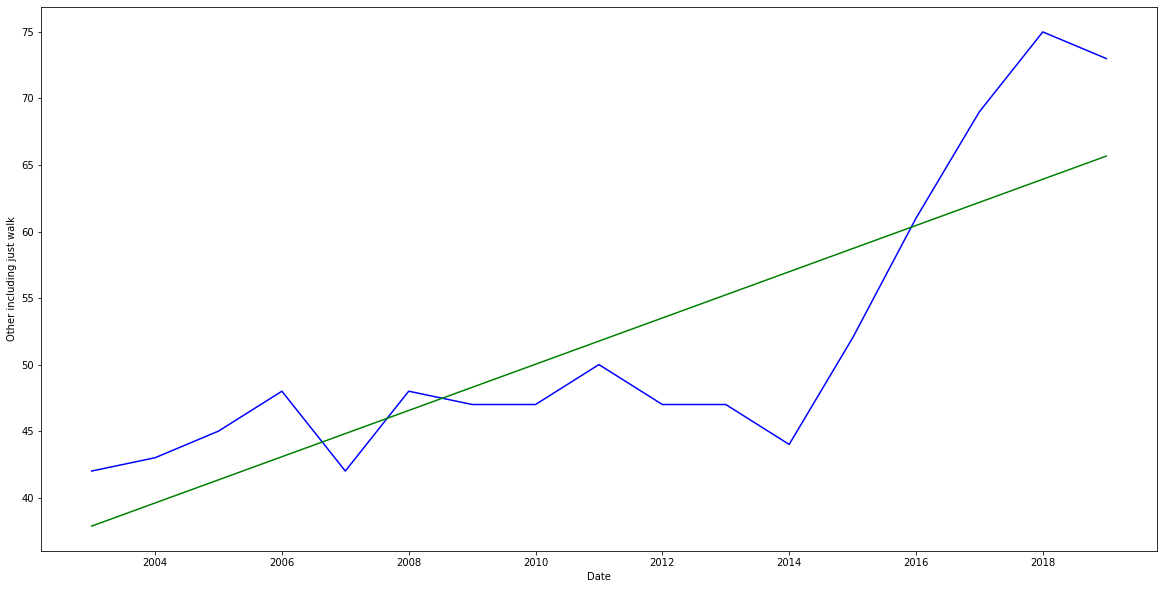

R Square test value: 0.03782904103972118


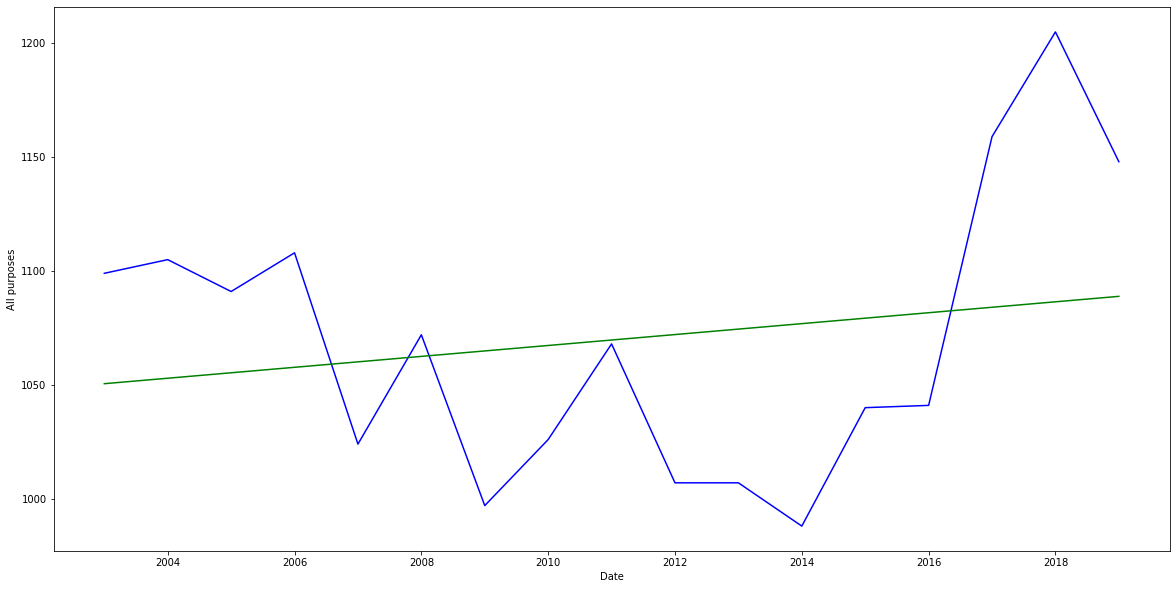

R Square test value: 1.0


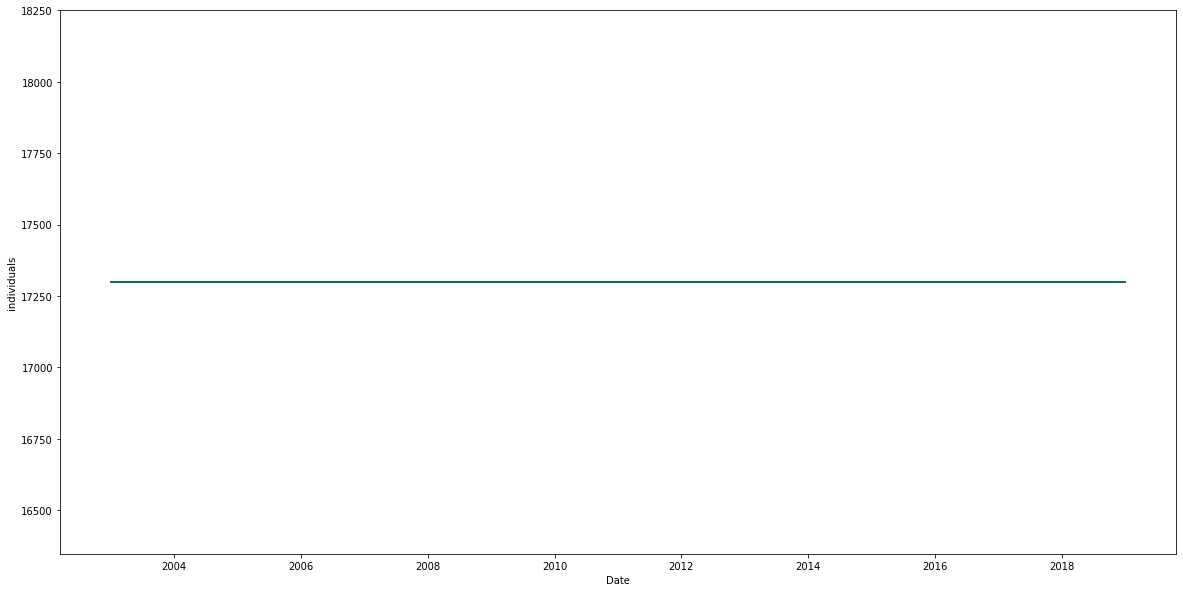

In [960]:
r2_for_linear_df = []
for items in columns_list:
  #x = np.array(years_list).reshape(-1,1)
  y = main_data[items].values
  model = LinearRegression().fit(x, y)
  y_pred = model.predict(x)
  r_square_value = model.score(x,y)
  print('R Square test value:',r_square_value)
  r2_for_linear_df.append(r_square_value*100)

  plt.figure(figsize=(20,10))
  plt.plot(x,y,'blue')
  plt.plot(x,y_pred,'green')
  plt.xlabel("Date")
  plt.ylabel(f"{items}")
  plt.show()

In [961]:
r2_for_linear_df

[2.9130057619456196,
 4.836131095123742,
 24.671052631577282,
 59.95747085415163,
 2.540710361714782,
 0.9936766034325584,
 18.244032174363934,
 82.96393795289872,
 33.691996791312285,
 61.247701343541024,
 39.893617021276725,
 13.823341836734693,
 69.46375306274577,
 65.91880678122541,
 3.782904103972118,
 100.0]

In [962]:
linear_df = pd.DataFrame()
linear_df['purpose'] = columns_list
linear_df['R2_value_linear'] = r2_for_linear_df
req_linear_df = linear_df.set_index('purpose')
req_linear_df

R2_value_linear
purpose                                          
Commuting                                2.913006
Business                                 4.836131
Education                               24.671053
Escort education                        59.957471
Shopping                                 2.540710
Other escort                             0.993677
Personal business                       18.244032
Visiting friends at private home        82.963938
Visiting friends elsewhere              33.691997
Entertainment / public activity         61.247701
Sport: participate                      39.893617
Holiday: base                           13.823342
Day trip                                69.463753
Other including just walk               65.918807
All purposes                             3.782904
individuals                            100.000000

In [963]:
x_list = []
for k in range(0,len(x)):  
  x_list.append(x[k][0])
print(x_list)  


[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [964]:
x_list

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [965]:
x1 = np.array(x_list)
x1

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

In [966]:
y

array([17299, 17299, 17299, 17299, 17299, 17299, 17299, 17299, 17299,
       17299, 17299, 17299, 17299, 17299, 17299, 17299, 17299])

In [967]:
year_needed = 2022

# Polynomial regression for trips

R Sqaure test for Commuting 62.0 %


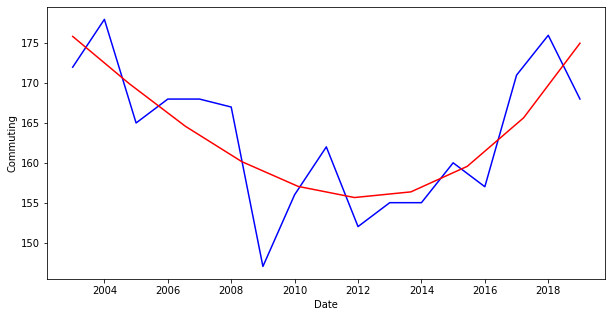

Expected at 2022: 199
 
R Sqaure test for Business 46.0 %


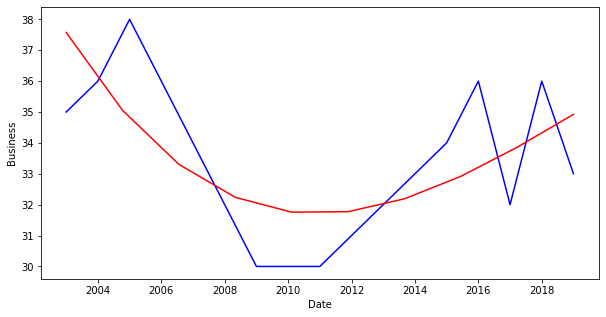

Expected at 2022: 36
 
R Sqaure test for Education 89.0 %


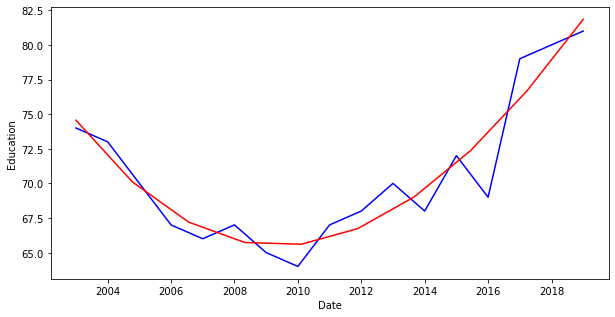

Expected at 2022: 92
 
R Sqaure test for Escort education 85.0 %


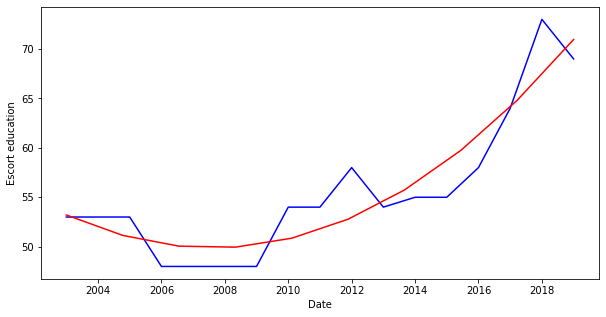

Expected at 2022: 83
 
R Sqaure test for Shopping 52.0 %


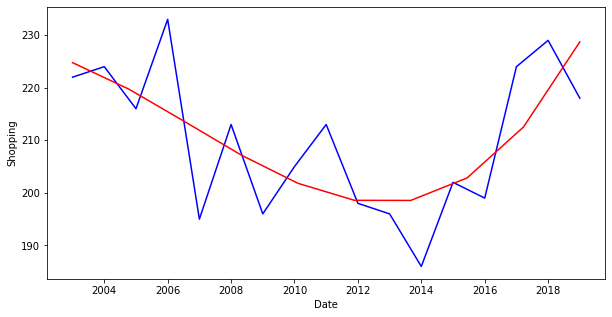

Expected at 2022: 273
 
R Sqaure test for Other escort 31.0 %


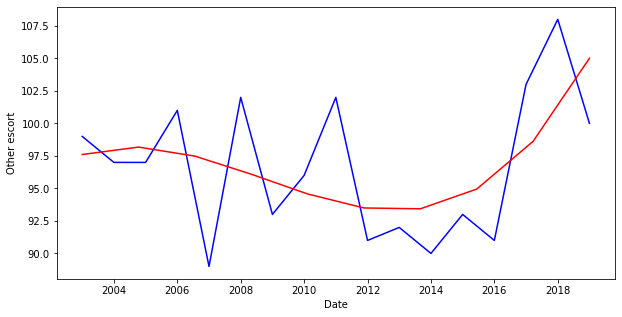

Expected at 2022: 123
 
R Sqaure test for Personal business 59.0 %


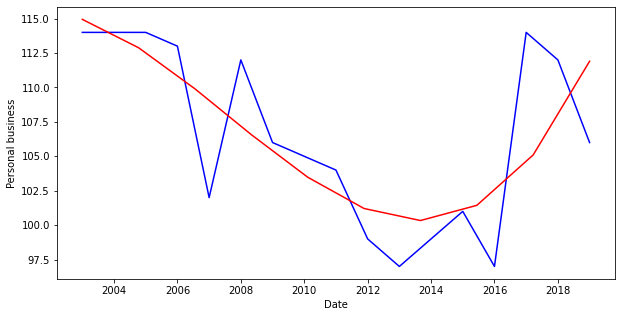

Expected at 2022: 132
 
R Sqaure test for Visiting friends at private home 90.0 %


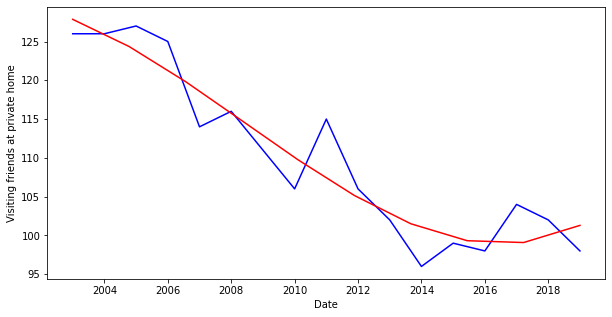

Expected at 2022: 111
 
R Sqaure test for Visiting friends elsewhere 68.0 %


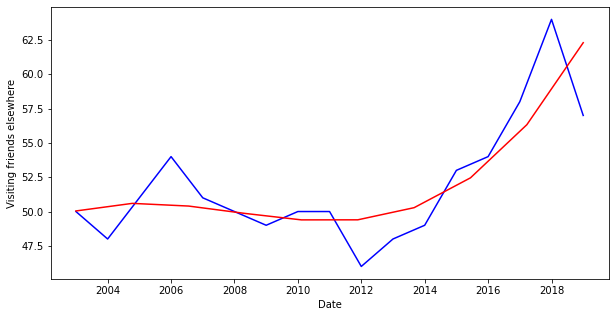

Expected at 2022: 78
 
R Sqaure test for Entertainment / public activity 90.0 %


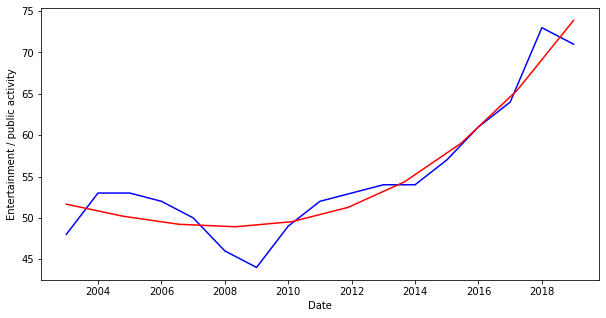

Expected at 2022: 93
 
R Sqaure test for Sport: participate 50.0 %


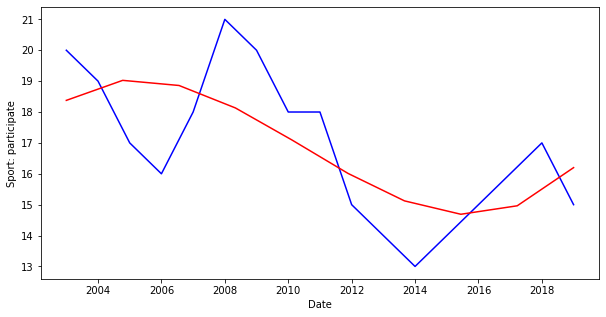

Expected at 2022: 21
 
R Sqaure test for Holiday: base 54.0 %


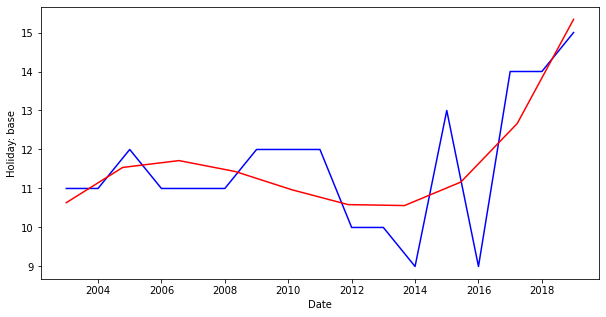

Expected at 2022: 23
 
R Sqaure test for Day trip 81.0 %


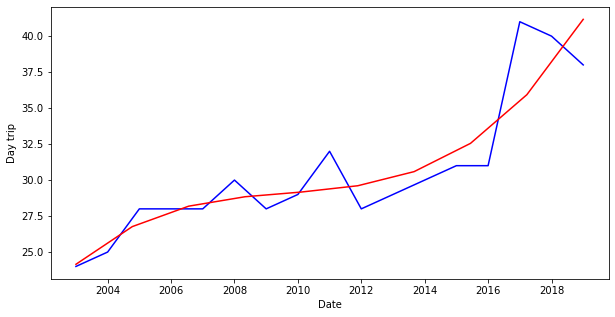

Expected at 2022: 55
 
R Sqaure test for Other including just walk 90.0 %


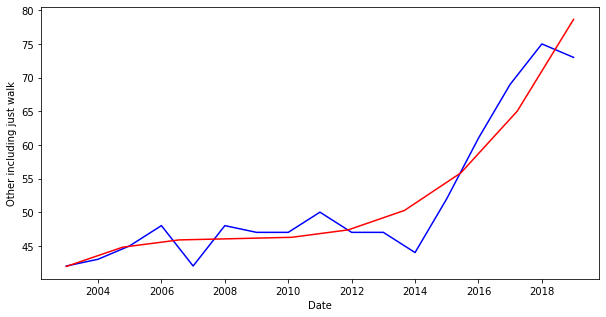

Expected at 2022: 114
 
R Sqaure test for All purposes 69.0 %


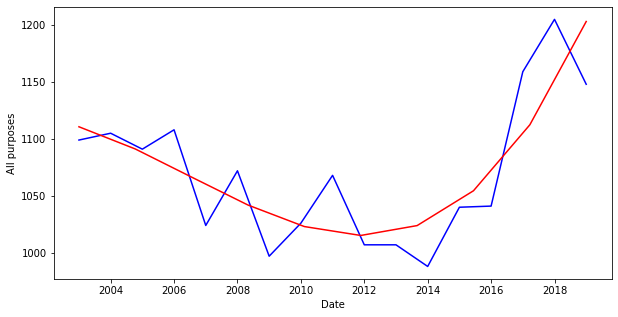

Expected at 2022: 1445
 
R Sqaure test for individuals 0.0 %


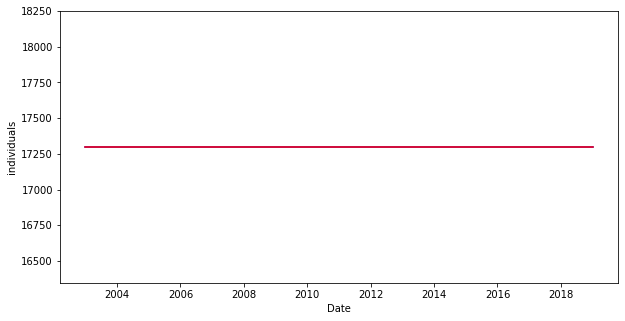

Expected at 2022: 17299
 


In [968]:
# Polynomial regression
polynomial_list = []

for items in columns_list:

  #x = np.array(years_list).reshape(-1,1)
  y = main_data[items].values
  mymodel = np.poly1d(np.polyfit(x1, y ,3))

  myline = np.linspace(2003, 2019, 10)
  print(f"R Sqaure test for {items}",round(r2_score(y, mymodel(x1)),2)*100,"%")
  r2_poly = r2_score(y, mymodel(x1)) * 100
  polynomial_list.append(r2_poly)

  # Figure details
  plt.figure(figsize=(10,5))
  plt.plot(x1, y,'blue')
  plt.plot(myline, mymodel(myline),'red')
  plt.xlabel("Date")
  plt.ylabel(f"{items}")
  plt.show()

  speed = mymodel(year_needed)
  print(f"Expected at {year_needed}:",int(speed))
  print(" ")


# Predictions for trips

In [969]:
# Expected values for trips count
y_prediction_trips = main_data['All purposes'].values
y_prediction_trips

array([1099, 1105, 1091, 1108, 1024, 1072,  997, 1026, 1068, 1007, 1007,
        988, 1040, 1041, 1159, 1205, 1148])

In [970]:
future_miles = []
for i in range(0,11):
  mymodel_trips = np.poly1d(np.polyfit(x1, y_prediction_trips ,3))
  speed_miles = mymodel_trips(2020+i)
  future_miles.append(int(speed_miles))
  print(f"Expected at {2020+i}:",int(speed_miles))


Expected at 2020: 1270
Expected at 2021: 1351
Expected at 2022: 1445
Expected at 2023: 1555
Expected at 2024: 1680
Expected at 2025: 1822
Expected at 2026: 1983
Expected at 2027: 2162
Expected at 2028: 2361
Expected at 2029: 2581
Expected at 2030: 2822


In [971]:
future_miles

[1270, 1351, 1445, 1555, 1680, 1822, 1983, 2162, 2361, 2581, 2822]

In [972]:
prediction_years = ['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029','2030']

In [973]:
prediction_years

['2020',
 '2021',
 '2022',
 '2023',
 '2024',
 '2025',
 '2026',
 '2027',
 '2028',
 '2029',
 '2030']

In [974]:
prediction_df = pd.DataFrame()
prediction_df['year'] = prediction_years

In [975]:
prediction_dataFrame = prediction_df.set_index('year')
prediction_dataFrame['Predictions_for_trips'] = future_miles
prediction_dataFrame

Predictions_for_trips
year                       
2020                   1270
2021                   1351
2022                   1445
2023                   1555
2024                   1680
2025                   1822
2026                   1983
2027                   2162
2028                   2361
2029                   2581
2030                   2822

In [976]:
polynomial_list

[61.81632388822973,
 45.683979219189794,
 89.0733648138031,
 84.77184216861669,
 51.56703993700751,
 30.832122971766317,
 59.343600062313016,
 89.72346915635161,
 68.13680110673994,
 90.227771923255,
 50.005540564727546,
 53.92890728024994,
 81.4485176780948,
 90.03227567894741,
 69.04263298598742,
 0.0]

In [977]:
req_linear_df['R2_value_polynomial'] = polynomial_list
req_linear_df.style.background_gradient(cmap='GnBu')

# Second part for average miles per person by purpose

In [978]:
# Creating a wb variable to store the spreadsheet bu URL

wb2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=1463922786')

In [979]:
# Getting the sheet(if multiple sheets exists) by sheet name

sheet2 = wb.worksheet('Miles')

In [980]:
# Getting all values that exist in the sheet

data2 = sheet2.get_all_values()

In [981]:
# Converting the values into a dataframe

data_frame2 = pd.DataFrame(data2)

In [982]:
data_frame2

0      1      2   ...     15     16     17
0                            Purpose  2,003  2,004  ...   2017   2018   2019
1                          Commuting   1424   1427  ...   1309   1277   1276
2                           Business    706    720  ...    644    623    632
3                          Education    223    211  ...    213    202    201
4                   Escort education    111    113  ...    118    121    121
5                           Shopping    890    855  ...    728    752    736
6                       Other escort    493    470  ...    433    438    431
7                  Personal business    464    472  ...    496    458    485
8   Visiting friends at private home   1148   1103  ...    978    964    924
9         Visiting friends elsewhere    265    264  ...    287    306    308
10   Entertainment / public activity    375    395  ...    390    407    412
11                Sport: participate    124    122  ...     84     95     86
12                     Holiday: base    558    506  ...    426    576    438
13                          Day trip    389    356  ...    367    358    381
14         Other including just walk     41     44  ...     42     48     50
15                      All purposes   7211   7058  ...   6496   6657   6499
16                       individuals  16685  16487  ...  14541  14150  14356

[17 rows x 18 columns]

In [983]:
# Transpose of the table
data_frame_transposed_2 = data_frame2.T
data_frame_transposed_2

0          1   ...            15           16
0   Purpose  Commuting  ...  All purposes  individuals
1     2,003       1424  ...          7211        16685
2     2,004       1427  ...          7058        16487
3     2,005       1398  ...          7181        16956
4     2,006       1414  ...          7107        16648
5      2007       1444  ...          7134        16858
6      2008       1348  ...          6888        16360
7      2009       1264  ...          6719        17299
8      2010       1351  ...          6698        16553
9      2011       1322  ...          6762        15730
10     2012       1309  ...          6606        16670
11     2013       1280  ...          6593        16192
12     2014       1290  ...          6496        16491
13     2015       1309  ...          6657        15525
14     2016       1296  ...          6501        15840
15     2017       1309  ...          6496        14541
16     2018       1277  ...          6657        14150
17     2019       1276  ...          6499        14356

[18 rows x 17 columns]

In [984]:
# Getting the first row to be the header

data_frame_transposed_2.columns = data_frame_transposed_2.iloc[0]

data_frame_transposed_2 = data_frame_transposed_2.iloc[1:].reset_index(drop=True)

data_frame_transposed_2

0  Purpose Commuting  ... All purposes individuals
0    2,003      1424  ...         7211       16685
1    2,004      1427  ...         7058       16487
2    2,005      1398  ...         7181       16956
3    2,006      1414  ...         7107       16648
4     2007      1444  ...         7134       16858
5     2008      1348  ...         6888       16360
6     2009      1264  ...         6719       17299
7     2010      1351  ...         6698       16553
8     2011      1322  ...         6762       15730
9     2012      1309  ...         6606       16670
10    2013      1280  ...         6593       16192
11    2014      1290  ...         6496       16491
12    2015      1309  ...         6657       15525
13    2016      1296  ...         6501       15840
14    2017      1309  ...         6496       14541
15    2018      1277  ...         6657       14150
16    2019      1276  ...         6499       14356

[17 rows x 17 columns]

In [985]:
indexed_data_frame2 = data_frame_transposed_2.set_index('Purpose')
indexed_data_frame2

0       Commuting Business  ... All purposes individuals
Purpose                     ...                         
2,003        1424      706  ...         7211       16685
2,004        1427      720  ...         7058       16487
2,005        1398      713  ...         7181       16956
2,006        1414      672  ...         7107       16648
2007         1444      724  ...         7134       16858
2008         1348      628  ...         6888       16360
2009         1264      543  ...         6719       17299
2010         1351      574  ...         6698       16553
2011         1322      535  ...         6762       15730
2012         1309      581  ...         6606       16670
2013         1280      621  ...         6593       16192
2014         1290      644  ...         6496       16491
2015         1309      623  ...         6657       15525
2016         1296      632  ...         6501       15840
2017         1309      644  ...         6496       14541
2018         1277      623  ...         6657       14150
2019         1276      632  ...         6499       14356

[17 rows x 16 columns]

In [986]:
max_value_in_population_2 = int(indexed_data_frame2.individuals.max())
indexed_data_frame2.individuals.values

array(['16685', '16487', '16956', '16648', '16858', '16360', '17299',
       '16553', '15730', '16670', '16192', '16491', '15525', '15840',
       '14541', '14150', '14356'], dtype=object)

In [987]:
sample_2 = indexed_data_frame2.values.astype(int)
numeric_df_2 = pd.DataFrame(sample_2)
numeric_df_2

0    1    2    3    4    5    6   ...   9    10   11   12  13    14     15
0   1424  706  223  111  890  493  464  ...  375  124  558  389  41  7211  16685
1   1427  720  211  113  855  470  472  ...  395  122  506  356  44  7058  16487
2   1398  713  209   96  863  483  512  ...  394  101  513  399  47  7181  16956
3   1414  672  202  105  906  475  484  ...  377  108  490  392  48  7107  16648
4   1444  724  207  113  828  470  486  ...  379  104  538  395  47  7134  16858
5   1348  628  214  106  855  502  489  ...  344  121  481  390  48  6888  16360
6   1264  543  193  104  803  467  483  ...  370  118  546  392  46  6719  17299
7   1351  574  201  120  810  495  502  ...  337  108  487  407  45  6698  16553
8   1322  535  206  111  824  501  484  ...  343  117  574  398  46  6762  15730
9   1309  581  223  129  818  477  481  ...  390   96  413  342  45  6606  16670
10  1280  621  228  107  770  473  446  ...  359   84  512  368  49  6593  16192
11  1290  644  213  118  728  433  496  ...  390   84  426  367  42  6496  16491
12  1309  623  202  121  752  438  458  ...  407   95  576  358  48  6657  15525
13  1296  632  201  121  736  431  485  ...  412   86  438  381  50  6501  15840
14  1309  644  213  118  728  433  496  ...  390   84  426  367  42  6496  14541
15  1277  623  202  121  752  438  458  ...  407   95  576  358  48  6657  14150
16  1276  632  201  121  736  431  485  ...  412   86  438  381  50  6499  14356

[17 rows x 16 columns]

In [988]:
numeric_df_2['Year'] = years_list
year_indexed_numeric_df_2 = numeric_df_2.set_index('Year')
year_indexed_numeric_df_2

0    1    2    3    4    5    6   ...   9    10   11   12  13    14     15
Year                                      ...                                     
2003  1424  706  223  111  890  493  464  ...  375  124  558  389  41  7211  16685
2004  1427  720  211  113  855  470  472  ...  395  122  506  356  44  7058  16487
2005  1398  713  209   96  863  483  512  ...  394  101  513  399  47  7181  16956
2006  1414  672  202  105  906  475  484  ...  377  108  490  392  48  7107  16648
2007  1444  724  207  113  828  470  486  ...  379  104  538  395  47  7134  16858
2008  1348  628  214  106  855  502  489  ...  344  121  481  390  48  6888  16360
2009  1264  543  193  104  803  467  483  ...  370  118  546  392  46  6719  17299
2010  1351  574  201  120  810  495  502  ...  337  108  487  407  45  6698  16553
2011  1322  535  206  111  824  501  484  ...  343  117  574  398  46  6762  15730
2012  1309  581  223  129  818  477  481  ...  390   96  413  342  45  6606  16670
2013  1280  621  228  107  770  473  446  ...  359   84  512  368  49  6593  16192
2014  1290  644  213  118  728  433  496  ...  390   84  426  367  42  6496  16491
2015  1309  623  202  121  752  438  458  ...  407   95  576  358  48  6657  15525
2016  1296  632  201  121  736  431  485  ...  412   86  438  381  50  6501  15840
2017  1309  644  213  118  728  433  496  ...  390   84  426  367  42  6496  14541
2018  1277  623  202  121  752  438  458  ...  407   95  576  358  48  6657  14150
2019  1276  632  201  121  736  431  485  ...  412   86  438  381  50  6499  14356

[17 rows x 16 columns]

In [989]:
year_indexed_numeric_df_2.columns = columns_list
year_indexed_numeric_df_2.style.background_gradient(cmap="Oranges")

In [990]:
new_df_2 = year_indexed_numeric_df_2
new_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2003 to 2019
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Commuting                         17 non-null     int64
 1   Business                          17 non-null     int64
 2   Education                         17 non-null     int64
 3   Escort education                  17 non-null     int64
 4   Shopping                          17 non-null     int64
 5   Other escort                      17 non-null     int64
 6   Personal business                 17 non-null     int64
 7   Visiting friends at private home  17 non-null     int64
 8   Visiting friends elsewhere        17 non-null     int64
 9   Entertainment / public activity   17 non-null     int64
 10  Sport: participate                17 non-null     int64
 11  Holiday: base                     17 non-null     int64
 12  Day trip                          17 n

In [991]:
new_df_2['sample_percentage'] = population_size_percentage_list
new_df_2

Commuting  Business  ...  individuals  sample_percentage
Year                       ...                                
2003       1424       706  ...        16685           0.036800
2004       1427       720  ...        16487           0.049251
2005       1398       713  ...        16956           0.020229
2006       1414       672  ...        16648           0.039104
2007       1444       724  ...        16858           0.026160
2008       1348       628  ...        16360           0.057396
2009       1264       543  ...        17299           0.000000
2010       1351       574  ...        16553           0.045067
2011       1322       535  ...        15730           0.099746
2012       1309       581  ...        16670           0.037732
2013       1280       621  ...        16192           0.068367
2014       1290       644  ...        16491           0.048996
2015       1309       623  ...        15525           0.114267
2016       1296       632  ...        15840           0.092109
2017       1309       644  ...        14541           0.189671
2018       1277       623  ...        14150           0.222544
2019       1276       632  ...        14356           0.205001

[17 rows x 17 columns]

In [992]:
main_array_2 = []
for i in range(0,new_df_2.shape[0]):
  #print(new_df.iloc[i:i+1,:-1].values)
  percentage_value_2 = new_df_2.iloc[i:i+1,:-1].values
  #print(percentage_value.shape)
  req_array_2 = []
  for j in range(0,percentage_value_2.shape[1]):
    adj_value_2 = new_df_2.iloc[i:i+1,-1:].values[0][0]
    ind_value_2 = new_df_2.iloc[i:i+1,j:j+1].values[0][0]
    z_2 = ind_value_2*adj_value_2
    req_value_2 = ind_value_2 + z_2
    req_list_2 = req_value_2.tolist()
    #print(req_list)
    req_array_2.append(req_list_2)
  #print(req_array)
  main_array_2.append(req_array_2)
  #print(main_array)
    #req_array = np.concatenate((req_value))

In [993]:
req_array_2
req_df_2 = pd.DataFrame(main_array_2)
req_df_2

0           1           2   ...         13           14       15
0   1476.402517  731.980461  231.206293  ...  42.508780  7476.361343  17299.0
1   1497.281070  755.460666  221.391945  ...  46.167041  7405.613028  17299.0
2   1426.279901  727.423154  213.227825  ...  47.950755  7326.263211  17299.0
3   1469.292768  698.277751  209.898967  ...  49.876982  7384.910680  17299.0
4   1481.774588  742.939613  212.415055  ...  48.229505  7320.623206  17299.0
5   1425.369927  664.044743  226.282763  ...  50.755012  7283.344254  17299.0
6   1264.000000  543.000000  193.000000  ...  46.000000  6719.000000  17299.0
7   1411.886003  599.868664  210.058539  ...  47.028031  6999.861173  17299.0
8   1453.863827  588.363954  226.547616  ...  50.588303  7436.480483  17299.0
9   1358.391782  602.922555  231.414337  ...  46.697960  6855.260588  17299.0
10  1367.509881  663.455966  243.587698  ...  52.349988  7043.744256  17299.0
11  1353.205385  675.553696  223.436238  ...  44.057850  6814.280759  17299.0
12  1458.575910  694.188535  225.081997  ...  53.484831  7417.677488  17299.0
13  1415.372727  690.212626  219.513826  ...  54.605429  7099.797917  17299.0
14  1557.278798  766.147858  253.399835  ...  49.966165  7728.100131  17299.0
15  1561.188905  761.645018  246.953922  ...  58.682120  8138.476537  17299.0
16  1537.581778  761.560880  242.205280  ...  60.250070  7831.304054  17299.0

[17 rows x 16 columns]

In [994]:
# dates
req_df_2['date'] = years_list
final_data_2 = req_df_2.set_index('date')
final_data_2

0           1           2   ...         13           14       15
date                                       ...                                 
2003  1476.402517  731.980461  231.206293  ...  42.508780  7476.361343  17299.0
2004  1497.281070  755.460666  221.391945  ...  46.167041  7405.613028  17299.0
2005  1426.279901  727.423154  213.227825  ...  47.950755  7326.263211  17299.0
2006  1469.292768  698.277751  209.898967  ...  49.876982  7384.910680  17299.0
2007  1481.774588  742.939613  212.415055  ...  48.229505  7320.623206  17299.0
2008  1425.369927  664.044743  226.282763  ...  50.755012  7283.344254  17299.0
2009  1264.000000  543.000000  193.000000  ...  46.000000  6719.000000  17299.0
2010  1411.886003  599.868664  210.058539  ...  47.028031  6999.861173  17299.0
2011  1453.863827  588.363954  226.547616  ...  50.588303  7436.480483  17299.0
2012  1358.391782  602.922555  231.414337  ...  46.697960  6855.260588  17299.0
2013  1367.509881  663.455966  243.587698  ...  52.349988  7043.744256  17299.0
2014  1353.205385  675.553696  223.436238  ...  44.057850  6814.280759  17299.0
2015  1458.575910  694.188535  225.081997  ...  53.484831  7417.677488  17299.0
2016  1415.372727  690.212626  219.513826  ...  54.605429  7099.797917  17299.0
2017  1557.278798  766.147858  253.399835  ...  49.966165  7728.100131  17299.0
2018  1561.188905  761.645018  246.953922  ...  58.682120  8138.476537  17299.0
2019  1537.581778  761.560880  242.205280  ...  60.250070  7831.304054  17299.0

[17 rows x 16 columns]

In [995]:
final_data_2.columns = columns_list
final_data_2

Commuting    Business  ...  All purposes  individuals
date                           ...                           
2003  1476.402517  731.980461  ...   7476.361343      17299.0
2004  1497.281070  755.460666  ...   7405.613028      17299.0
2005  1426.279901  727.423154  ...   7326.263211      17299.0
2006  1469.292768  698.277751  ...   7384.910680      17299.0
2007  1481.774588  742.939613  ...   7320.623206      17299.0
2008  1425.369927  664.044743  ...   7283.344254      17299.0
2009  1264.000000  543.000000  ...   6719.000000      17299.0
2010  1411.886003  599.868664  ...   6999.861173      17299.0
2011  1453.863827  588.363954  ...   7436.480483      17299.0
2012  1358.391782  602.922555  ...   6855.260588      17299.0
2013  1367.509881  663.455966  ...   7043.744256      17299.0
2014  1353.205385  675.553696  ...   6814.280759      17299.0
2015  1458.575910  694.188535  ...   7417.677488      17299.0
2016  1415.372727  690.212626  ...   7099.797917      17299.0
2017  1557.278798  766.147858  ...   7728.100131      17299.0
2018  1561.188905  761.645018  ...   8138.476537      17299.0
2019  1537.581778  761.560880  ...   7831.304054      17299.0

[17 rows x 16 columns]

In [996]:
main_data_2 = final_data_2.astype(int)
main_data_2.style.background_gradient(cmap='GnBu')

R Square test value: 0.042184884460878536


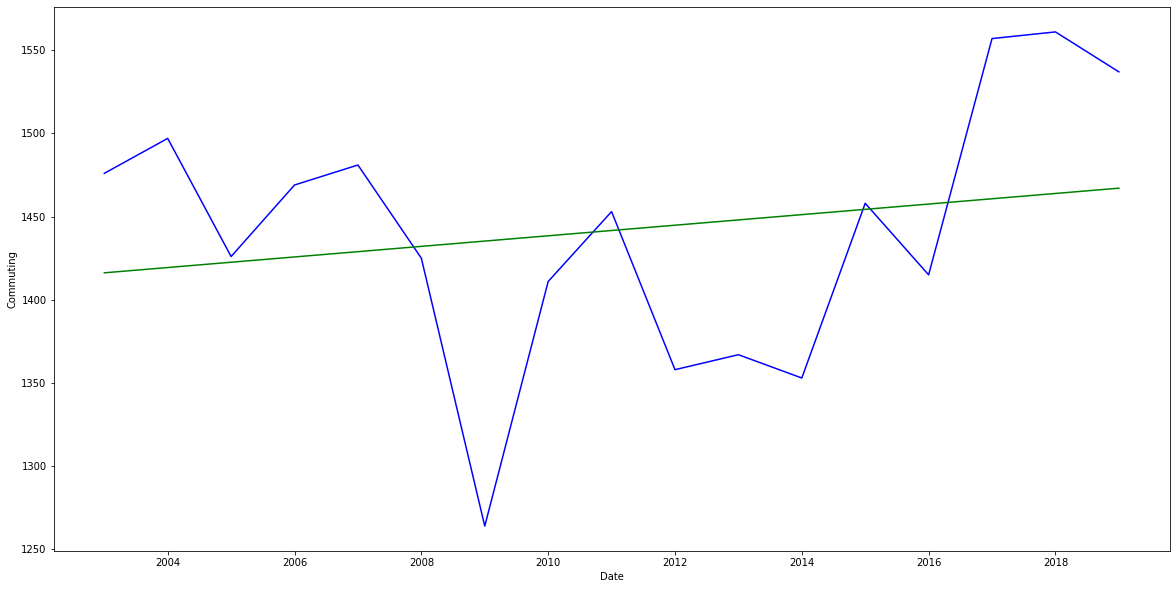

R Square test value: 0.010209099015759171


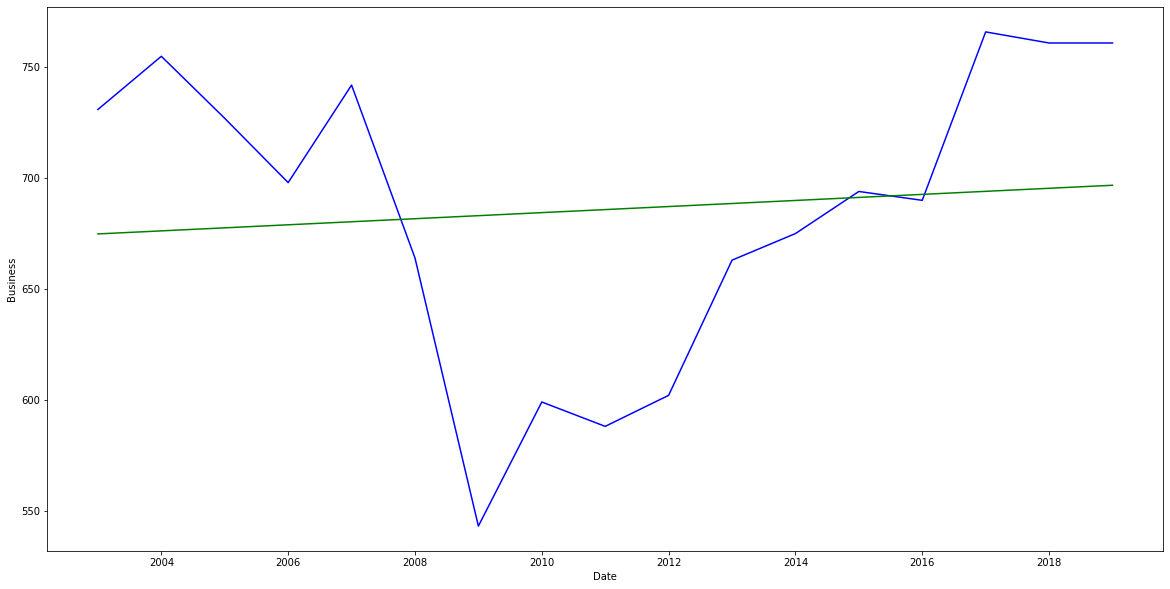

R Square test value: 0.33283158270921676


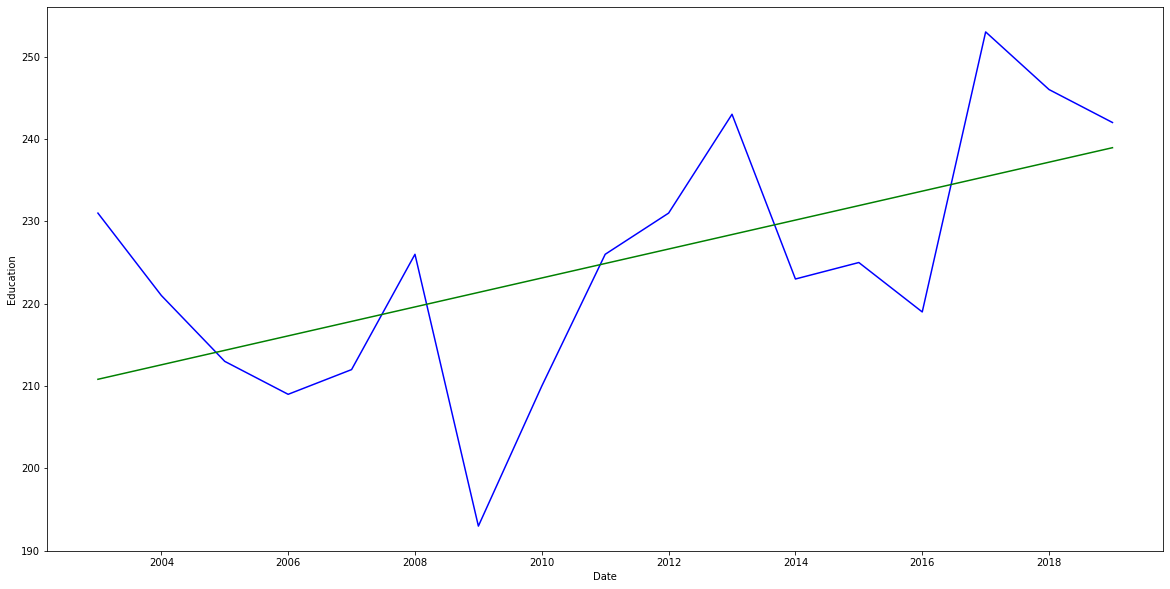

R Square test value: 0.6866388747762096


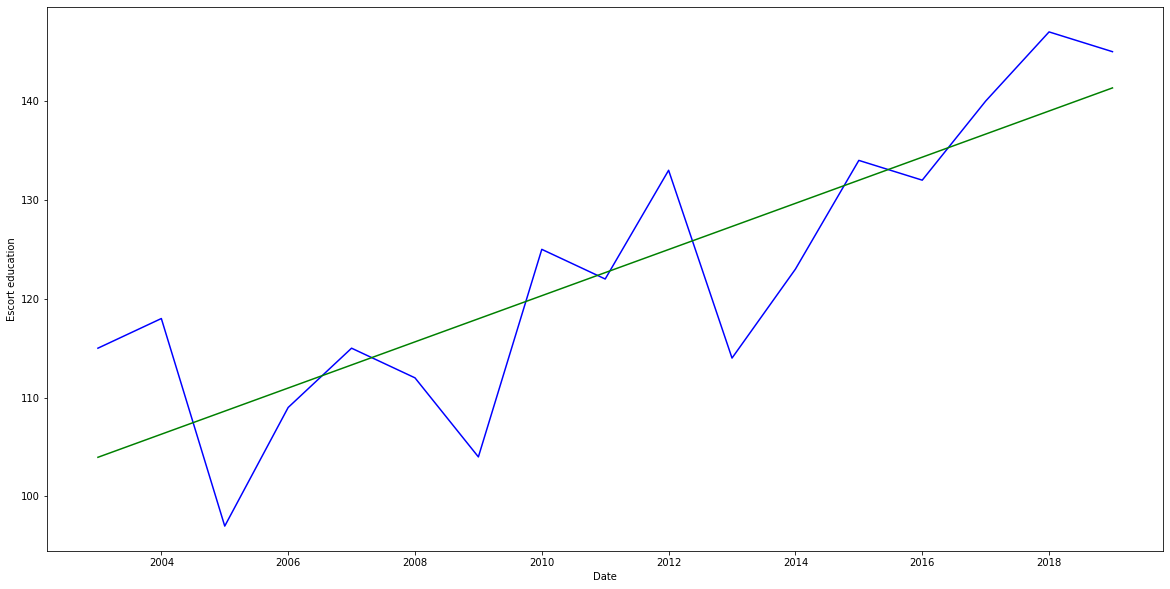

R Square test value: 0.1142740214194562


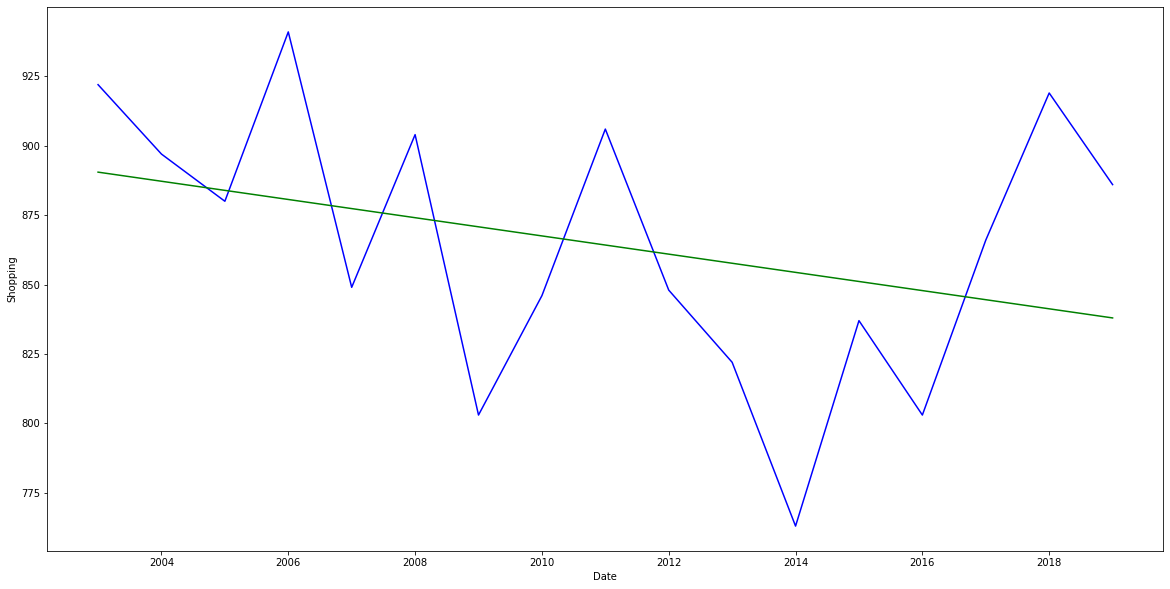

R Square test value: 0.012462494722876305


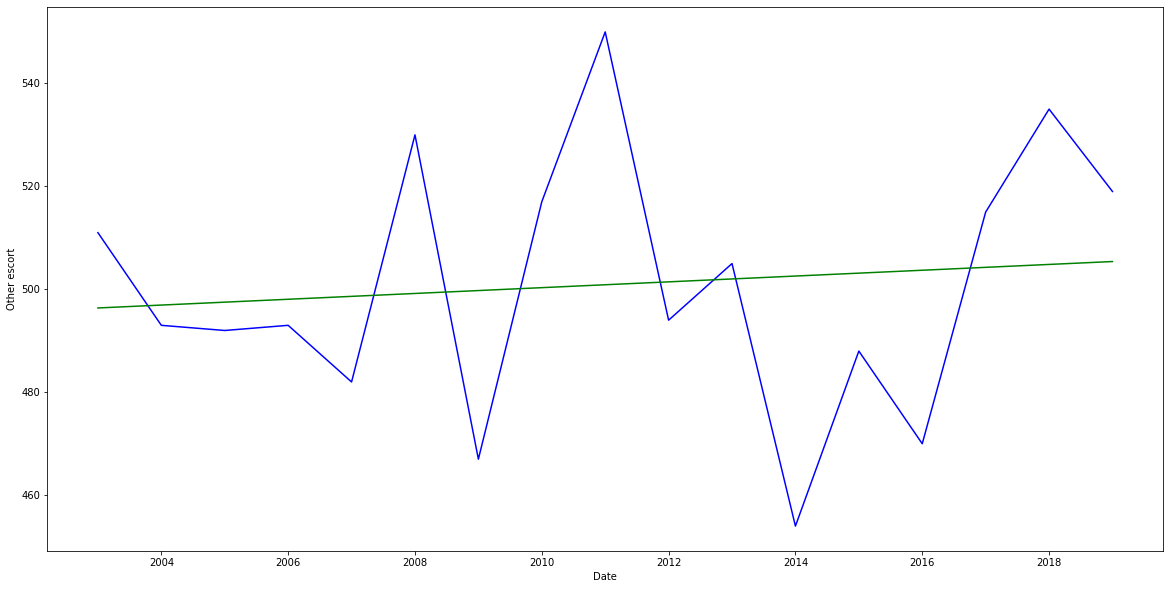

R Square test value: 0.46923831725579634


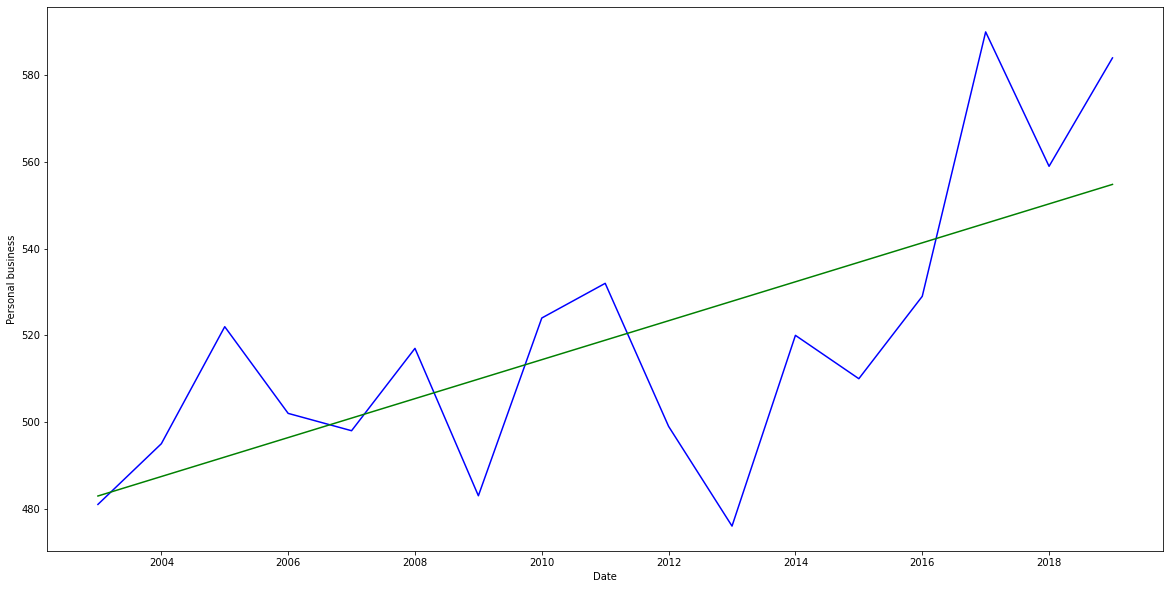

R Square test value: 0.20202748352391198


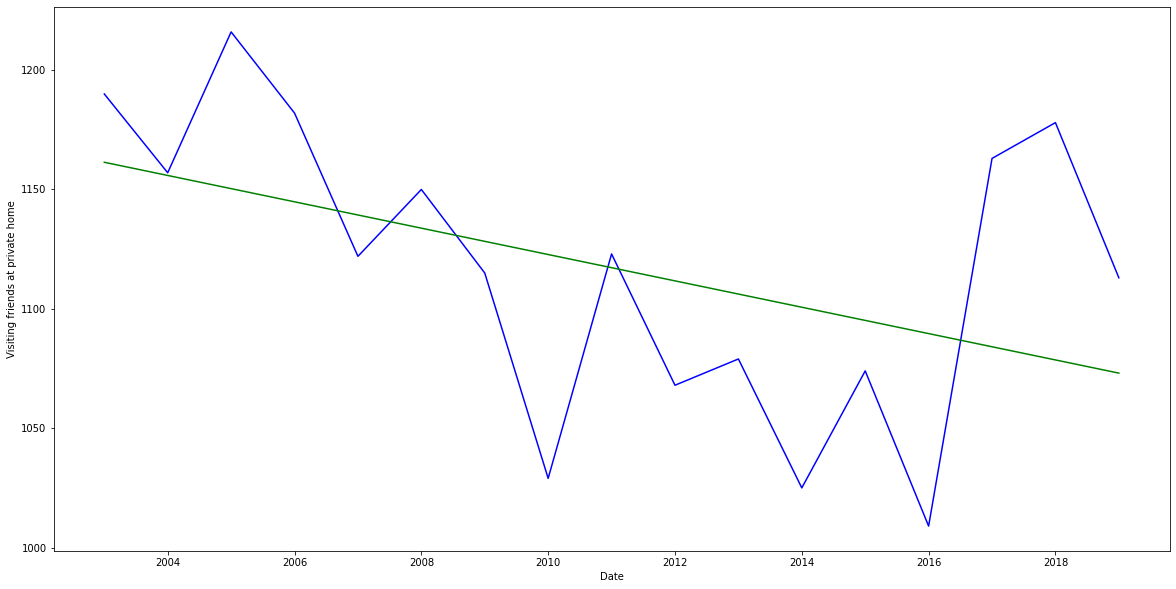

R Square test value: 0.7021007491283782


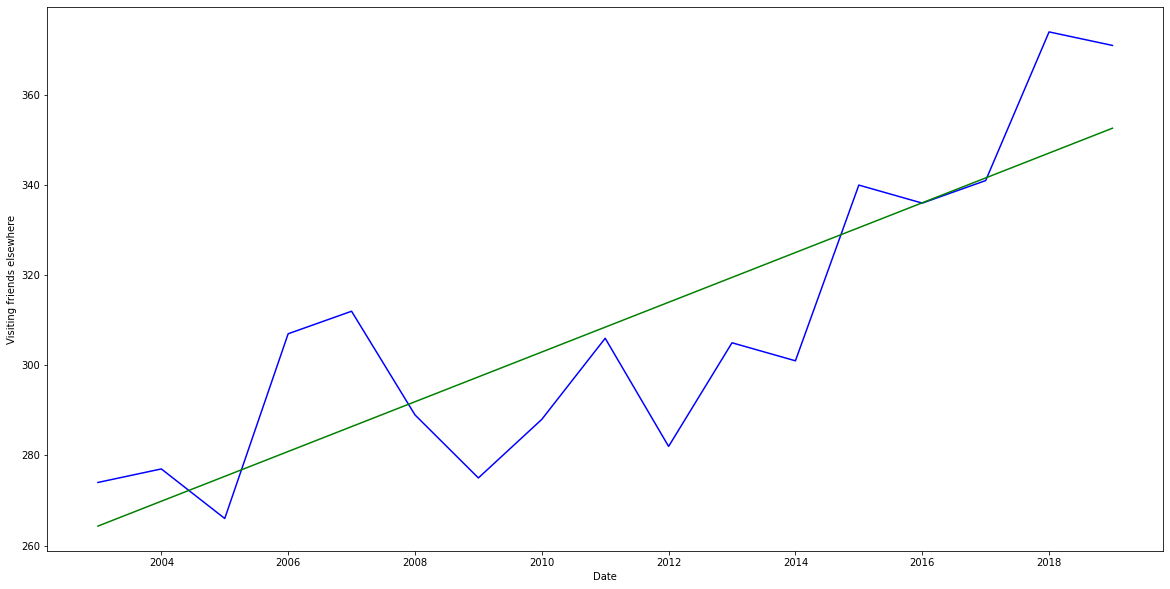

R Square test value: 0.5182787174066168


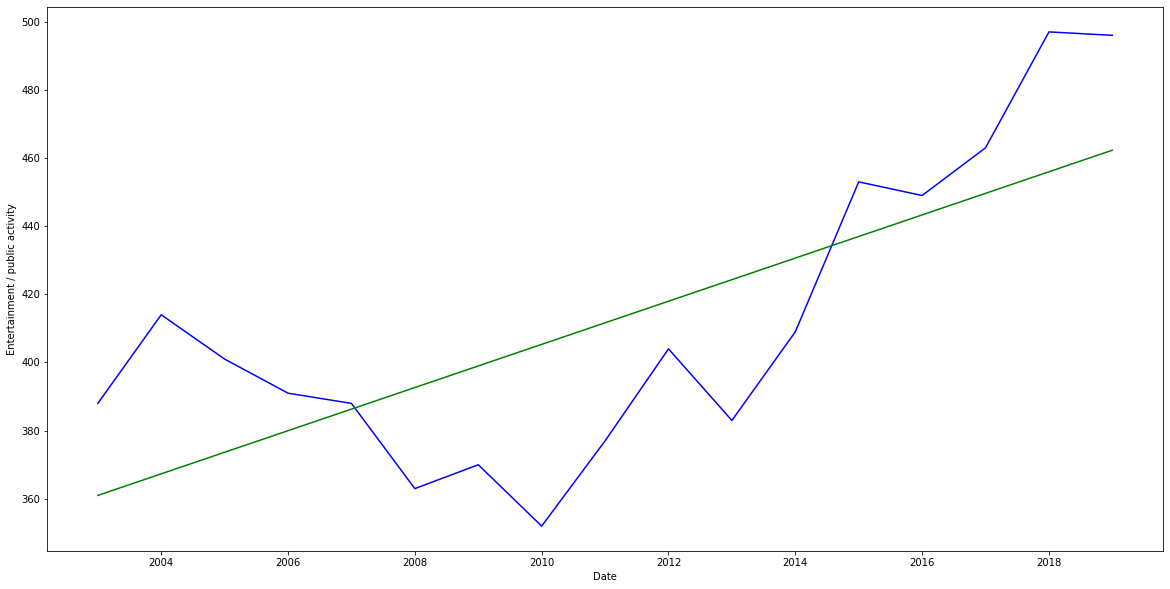

R Square test value: 0.2942440290965205


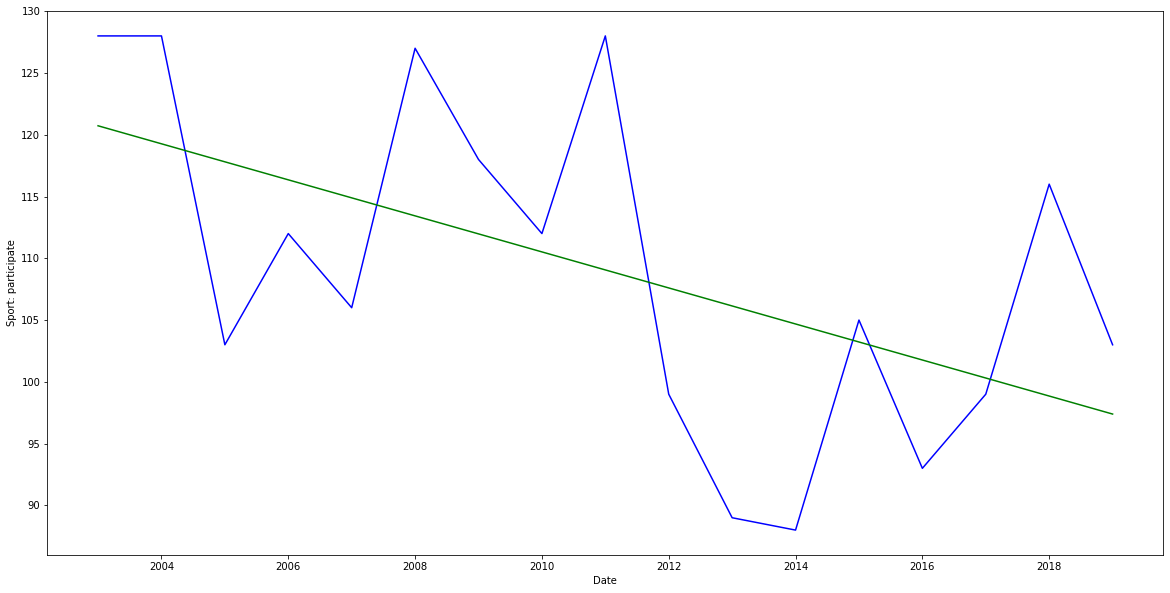

R Square test value: 0.013246078759508562


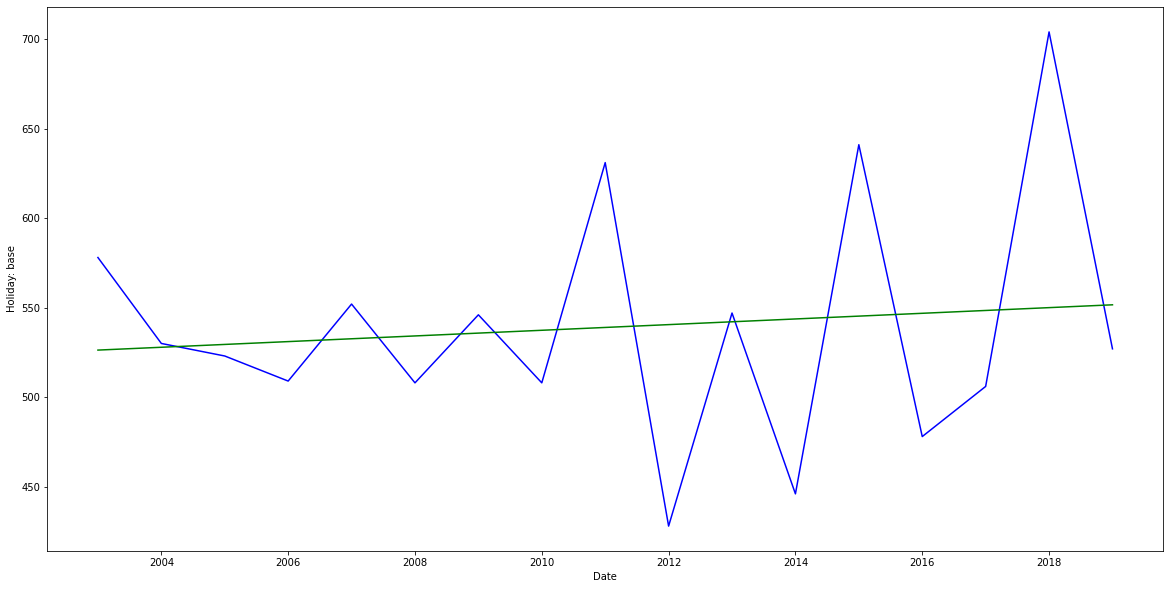

R Square test value: 0.1985305630505083


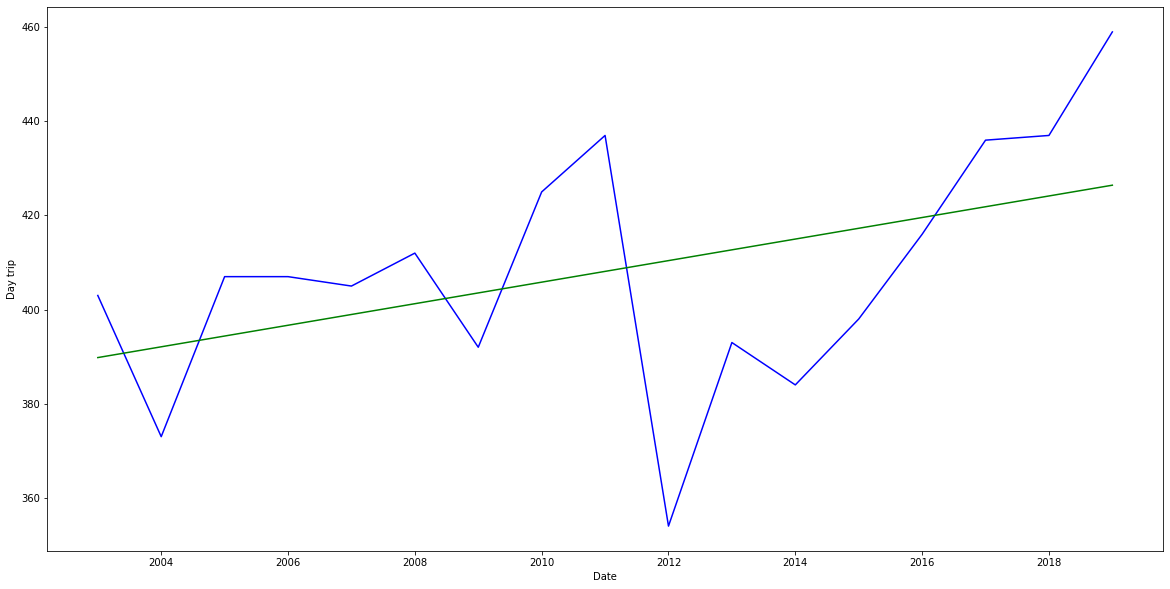

R Square test value: 0.5258273459612497


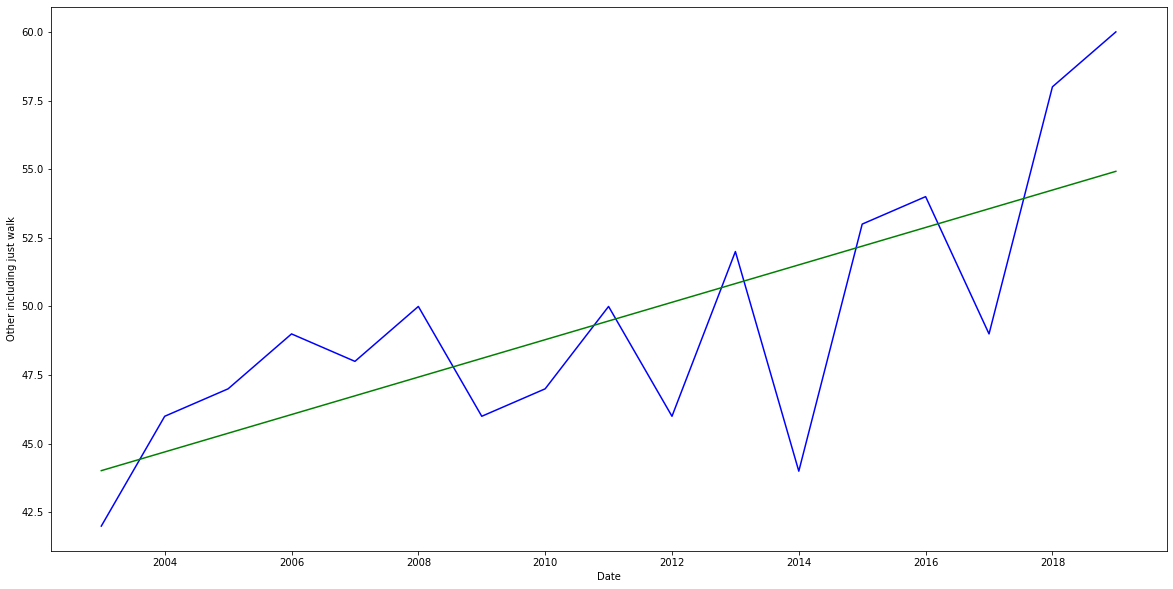

R Square test value: 0.07880509731044583


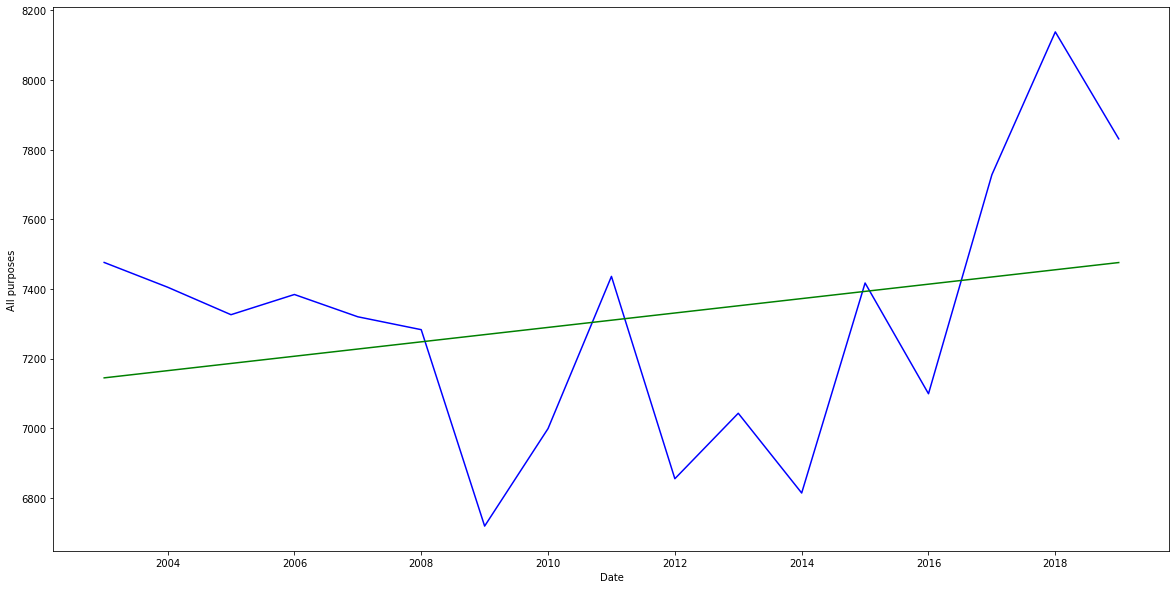

R Square test value: 1.0


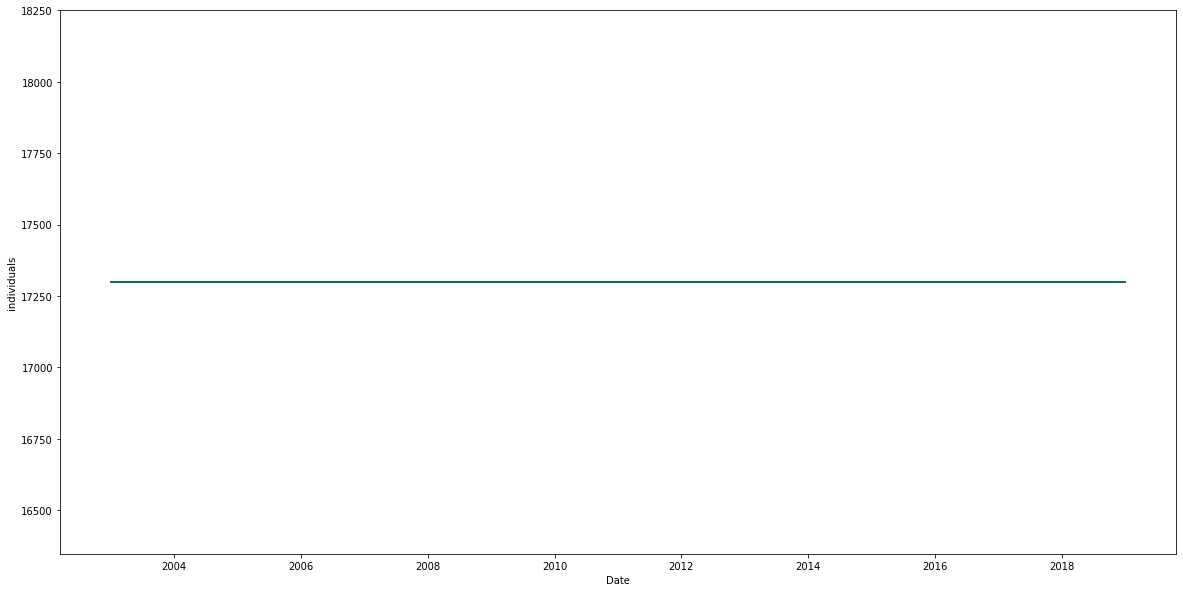

In [997]:
r2_for_linear_df_2 = []
for items in columns_list:
  #x = np.array(years_list).reshape(-1,1)
  y_2 = main_data_2[items].values
  model_2 = LinearRegression().fit(x, y_2)
  y_pred_2 = model_2.predict(x)
  r_square_value_2 = model_2.score(x,y_2)
  print('R Square test value:',r_square_value_2)
  r2_for_linear_df_2.append(r_square_value_2*100)

  plt.figure(figsize=(20,10))
  plt.plot(x,y_2,'blue')
  plt.plot(x,y_pred_2,'green')
  plt.xlabel("Date")
  plt.ylabel(f"{items}")
  plt.show()

In [998]:
r2_for_linear_df_2

[4.218488446087854,
 1.020909901575917,
 33.283158270921675,
 68.66388747762096,
 11.42740214194562,
 1.2462494722876305,
 46.92383172557963,
 20.202748352391197,
 70.21007491283781,
 51.82787174066168,
 29.42440290965205,
 1.3246078759508562,
 19.85305630505083,
 52.58273459612497,
 7.880509731044583,
 100.0]

In [999]:

req_linear_df['R2_value_linear_for_AvgMiles'] = r2_for_linear_df_2
req_linear_df

R2_value_linear  ...  R2_value_linear_for_AvgMiles
purpose                                            ...                              
Commuting                                2.913006  ...                      4.218488
Business                                 4.836131  ...                      1.020910
Education                               24.671053  ...                     33.283158
Escort education                        59.957471  ...                     68.663887
Shopping                                 2.540710  ...                     11.427402
Other escort                             0.993677  ...                      1.246249
Personal business                       18.244032  ...                     46.923832
Visiting friends at private home        82.963938  ...                     20.202748
Visiting friends elsewhere              33.691997  ...                     70.210075
Entertainment / public activity         61.247701  ...                     51.827872
Sport: participate                      39.893617  ...                     29.424403
Holiday: base                           13.823342  ...                      1.324608
Day trip                                69.463753  ...                     19.853056
Other including just walk               65.918807  ...                     52.582735
All purposes                             3.782904  ...                      7.880510
individuals                            100.000000  ...                    100.000000

[16 rows x 3 columns]

In [1000]:
y

array([17299, 17299, 17299, 17299, 17299, 17299, 17299, 17299, 17299,
       17299, 17299, 17299, 17299, 17299, 17299, 17299, 17299])

R Sqaure test for Commuting 55.00000000000001 %


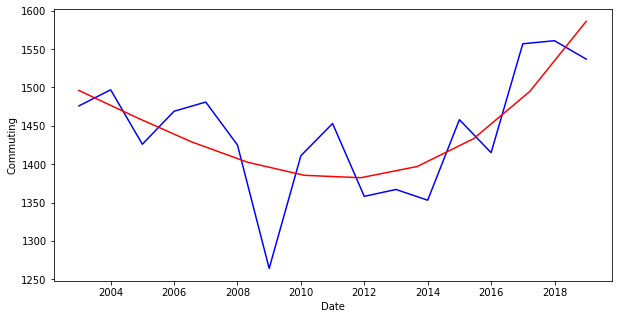

Expected at 2022: 1818
 
R Sqaure test for Business 66.0 %


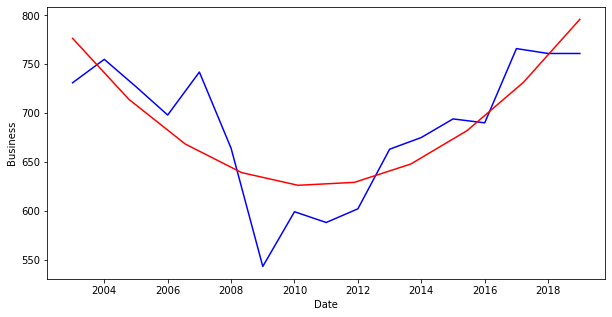

Expected at 2022: 937
 
R Sqaure test for Education 54.0 %


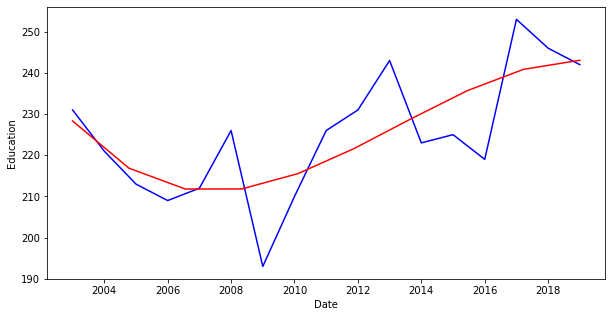

Expected at 2022: 236
 
R Sqaure test for Escort education 77.0 %


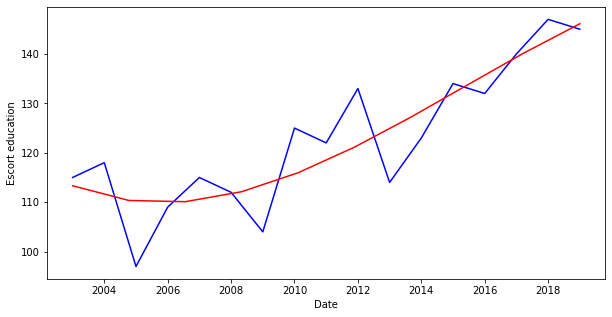

Expected at 2022: 153
 
R Sqaure test for Shopping 46.0 %


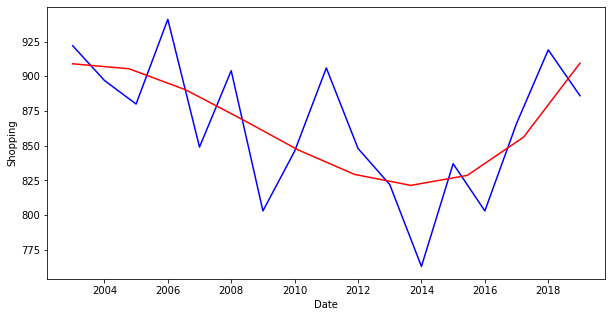

Expected at 2022: 1072
 
R Sqaure test for Other escort 10.0 %


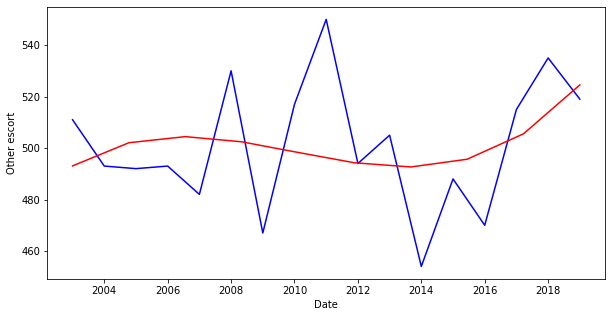

Expected at 2022: 583
 
R Sqaure test for Personal business 69.0 %


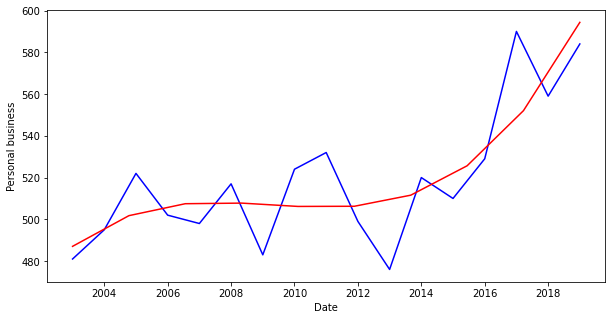

Expected at 2022: 711
 
R Sqaure test for Visiting friends at private home 56.99999999999999 %


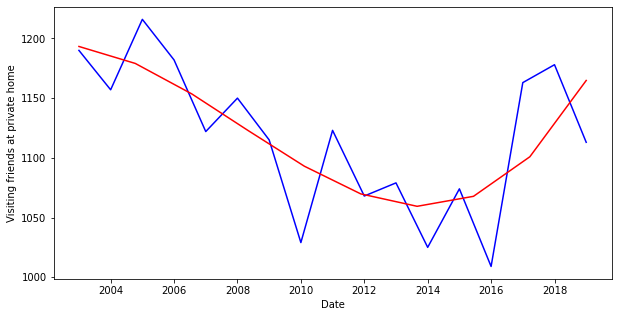

Expected at 2022: 1359
 
R Sqaure test for Visiting friends elsewhere 84.0 %


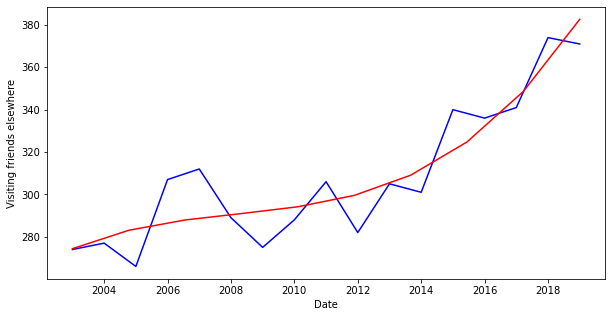

Expected at 2022: 468
 
R Sqaure test for Entertainment / public activity 89.0 %


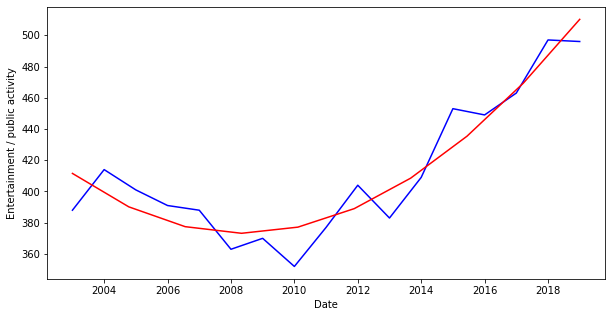

Expected at 2022: 593
 
R Sqaure test for Sport: participate 38.0 %


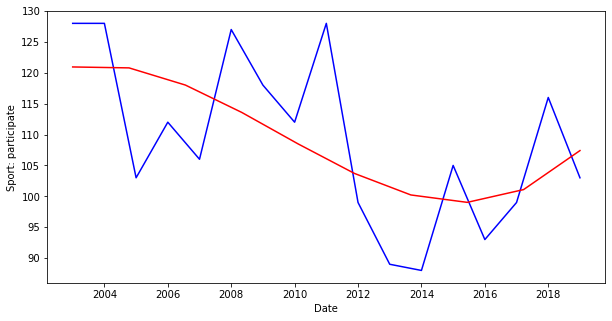

Expected at 2022: 130
 
R Sqaure test for Holiday: base 7.000000000000001 %


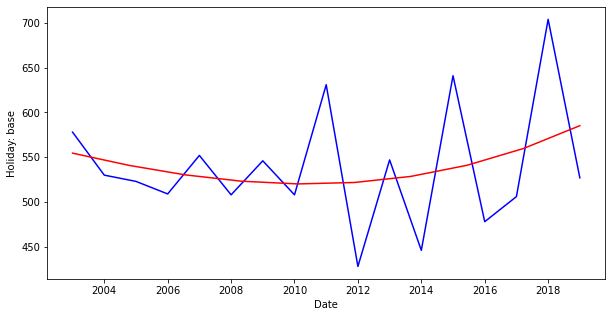

Expected at 2022: 645
 
R Sqaure test for Day trip 50.0 %


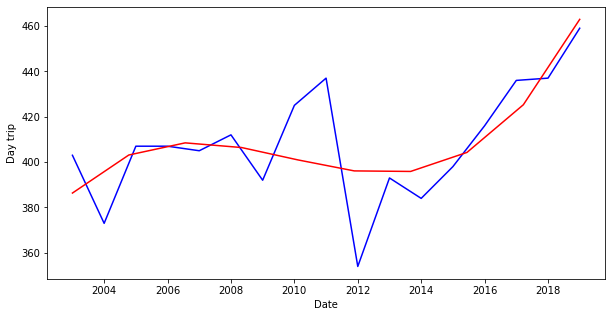

Expected at 2022: 575
 
R Sqaure test for Other including just walk 73.0 %


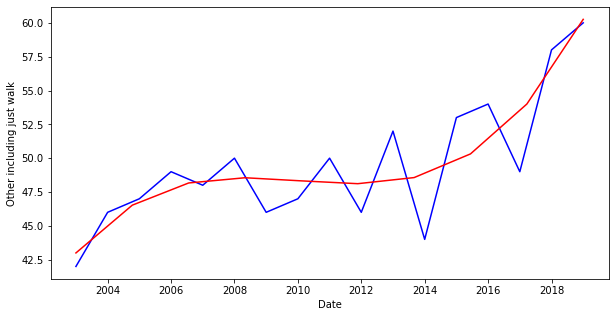

Expected at 2022: 78
 
R Sqaure test for All purposes 64.0 %


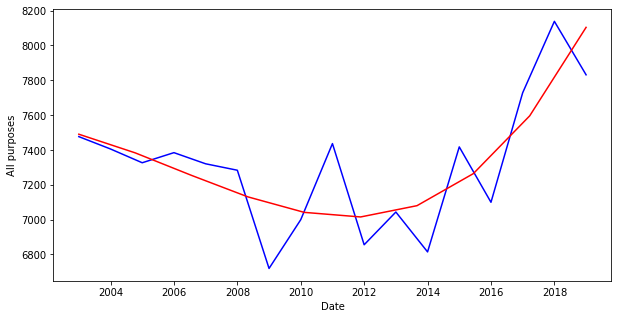

Expected at 2022: 9439
 
R Sqaure test for individuals 0.0 %


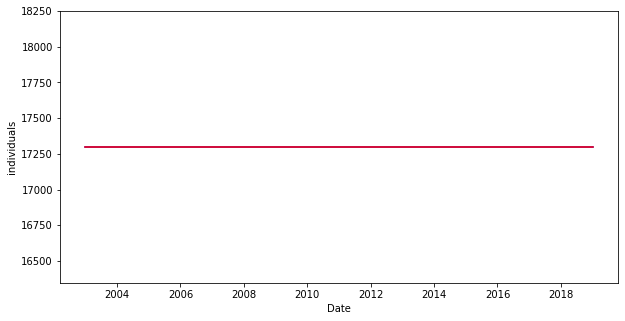

Expected at 2022: 17299
 


In [1001]:
# Polynomial regression
polynomial_list_2 = []

for items in columns_list:

  #x = np.array(years_list).reshape(-1,1)
  y_2 = main_data_2[items].values
  mymodel_2 = np.poly1d(np.polyfit(x1, y_2 ,3))

  myline_2 = np.linspace(2003, 2019, 10)
  print(f"R Sqaure test for {items}",round(r2_score(y_2, mymodel_2(x1)),2)*100,"%")
  r2_poly_2 = r2_score(y_2, mymodel_2(x1)) * 100
  polynomial_list_2.append(r2_poly_2)

  # Figure details
  plt.figure(figsize=(10,5))
  plt.plot(x1, y_2,'blue')
  plt.plot(myline_2, mymodel_2(myline_2),'red')
  plt.xlabel("Date")
  plt.ylabel(f"{items}")
  plt.show()

  speed_2 = mymodel_2(year_needed)
  print(f"Expected at {year_needed}:",int(speed_2))
  print(" ")

In [1002]:
req_linear_df['R2_value_polynomial_for_AvgMiles'] = polynomial_list_2
req_linear_df.style.background_gradient(cmap='GnBu')

In [1003]:
# Expected values for trips count
y_prediction_miles = main_data_2['All purposes'].values
y_prediction_miles

array([7476, 7405, 7326, 7384, 7320, 7283, 6719, 6999, 7436, 6855, 7043,
       6814, 7417, 7099, 7728, 8138, 7831])

In [1004]:
future_miles_2 = []
for i in range(0,11):
  mymodel_miles = np.poly1d(np.polyfit(x1, y_prediction_miles ,3))
  speed_miles_2 = mymodel_miles(2020+i)
  future_miles_2.append(int(speed_miles_2))
  print(f"Expected at {2020+i}:",int(speed_miles_2))

Expected at 2020: 8477
Expected at 2021: 8920
Expected at 2022: 9439
Expected at 2023: 10037
Expected at 2024: 10720
Expected at 2025: 11493
Expected at 2026: 12360
Expected at 2027: 13328
Expected at 2028: 14401
Expected at 2029: 15584
Expected at 2030: 16882


In [1005]:
prediction_dataFrame['Prediction_for_miles'] = future_miles_2
#prediction_dataFrame['Miles_per_Trips'] = prediction_dataFrame['Predictions_for_miles'].values / prediction_dataFrame['Prediction_for_trips'].values
type(prediction_dataFrame['Prediction_for_miles'].values)

numpy.ndarray

In [1006]:
arr1 = prediction_dataFrame['Prediction_for_miles'].values
arr2 = prediction_dataFrame['Predictions_for_trips'].values
print ("arr1         : ", arr1)
print ("arr2         : ", arr2)
  
# output_array
out = np.divide(arr1, arr2)
print ("\nOutput array : \n", out)

arr1         :  [ 8477  8920  9439 10037 10720 11493 12360 13328 14401 15584 16882]
arr2         :  [1270 1351 1445 1555 1680 1822 1983 2162 2361 2581 2822]

Output array : 
 [6.67480315 6.60251665 6.53217993 6.45466238 6.38095238 6.3079034
 6.23298033 6.16466235 6.0995341  6.03796978 5.98228207]


# Prediction data frame

In [1007]:
prediction_dataFrame['Miles_per_Trips'] = out
prediction_dataFrame

Predictions_for_trips  Prediction_for_miles  Miles_per_Trips
year                                                              
2020                   1270                  8477         6.674803
2021                   1351                  8920         6.602517
2022                   1445                  9439         6.532180
2023                   1555                 10037         6.454662
2024                   1680                 10720         6.380952
2025                   1822                 11493         6.307903
2026                   1983                 12360         6.232980
2027                   2162                 13328         6.164662
2028                   2361                 14401         6.099534
2029                   2581                 15584         6.037970
2030                   2822                 16882         5.982282

In [1008]:
# avg efficiency of electric vehciles in watt-hour per miles
efficiency = 304.43

In [1009]:
prediction_dataFrame['Prediction_for_miles'].values * efficiency

array([2580653.11, 2715515.6 , 2873514.77, 3055563.91, 3263489.6 ,
       3498813.99, 3762754.8 , 4057443.04, 4384096.43, 4744237.12,
       5139387.26])

# Population

In [1010]:
# Creating a wb variable to store the spreadsheet bu URL

wb3 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=303197882')

In [1011]:
# Getting the sheet(if multiple sheets exists) by sheet name

sheet3 = wb.worksheet('Population')

In [1012]:
# Getting all values that exist in the sheet

data3 = sheet3.get_all_values()

In [1013]:
# Converting the values into a dataframe

data_frame3 = pd.DataFrame(data3)

In [1014]:
data_frame3

0           1
0   Year  Population
1   2003    49925500
2   2004    50194600
3   2005    50606000
4   2006    50965200
5   2007    51381100
6   2008    51815900
7   2009    52196400
8   2010    52642500
9   2011    53107200
10  2012    53493700
11  2013    53865800
12  2014    54316600
13  2015    54786300
14  2016    55268100
15  2017    55619400
16  2018    55977200
17  2019    56287000

In [1015]:
# Getting the first row to be the header

data_frame3.columns = data_frame3.iloc[0]

data_frame3 = data_frame3.iloc[1:].reset_index(drop=True)

data_frame3

0   Year Population
0   2003   49925500
1   2004   50194600
2   2005   50606000
3   2006   50965200
4   2007   51381100
5   2008   51815900
6   2009   52196400
7   2010   52642500
8   2011   53107200
9   2012   53493700
10  2013   53865800
11  2014   54316600
12  2015   54786300
13  2016   55268100
14  2017   55619400
15  2018   55977200
16  2019   56287000

In [1016]:
indexed_df_3 = data_frame3.set_index('Year')
indexed_df_3

0    Population
Year           
2003   49925500
2004   50194600
2005   50606000
2006   50965200
2007   51381100
2008   51815900
2009   52196400
2010   52642500
2011   53107200
2012   53493700
2013   53865800
2014   54316600
2015   54786300
2016   55268100
2017   55619400
2018   55977200
2019   56287000

In [1017]:
y_pop = indexed_df_3['Population']

# Predictions for population

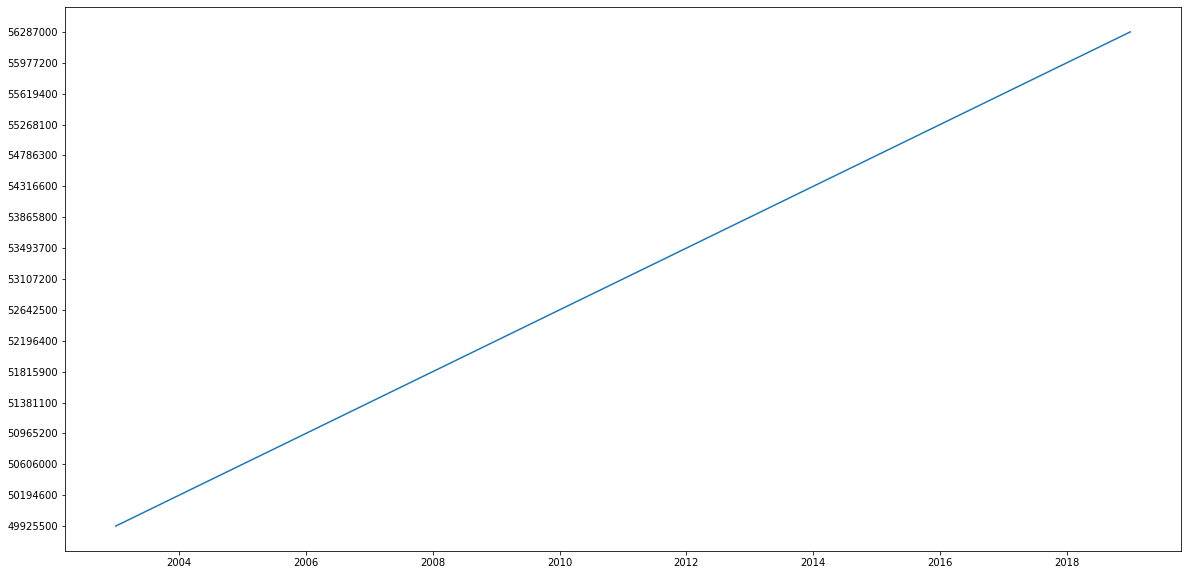

In [1018]:
model_pop = LinearRegression().fit(x, y_pop)

plt.figure(figsize=(20,10))
plt.plot(x, y_pop)
plt.show()

In [1019]:

model_pop = LinearRegression().fit(x, y_pop)
y_pred_pop = model_pop.predict(x)
r_square_value_pop = model_pop.score(x,y_pop)
print('R Square test value:',r_square_value_pop)

R Square test value: 0.9990683647189549


In [1020]:
future_pop = []
for i in range(0,11):
  mymodel_pop = np.poly1d(np.polyfit(x1, y_pred_pop ,3))
  speed_pop = mymodel_pop(2020+i)
  future_pop.append(int(speed_pop))
  print(f"Expected at {2020+i}:",int(speed_pop))

Expected at 2020: 56797220
Expected at 2021: 57209666
Expected at 2022: 57622112
Expected at 2023: 58034558
Expected at 2024: 58447004
Expected at 2025: 58859450
Expected at 2026: 59271897
Expected at 2027: 59684343
Expected at 2028: 60096789
Expected at 2029: 60509235
Expected at 2030: 60921681


In [1021]:
future_pop

[56797220,
 57209666,
 57622112,
 58034558,
 58447004,
 58859450,
 59271897,
 59684343,
 60096789,
 60509235,
 60921681]

# Area wise stats for distance travlled per year in miles


In [1022]:
# Creating a wb variable to store the spreadsheet bu URL

wb_area = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=32653163')

In [1023]:
# Getting the sheet(if multiple sheets exists) by sheet name

sheet_area = wb_area.worksheet('Area')

In [1024]:
# Getting all values that exist in the sheet

data_area = sheet_area.get_all_values()

In [1025]:
# Converting the values into a dataframe

data_frame_area = pd.DataFrame(data_area)
data_frame_area.T

0            1            2   ...          8            9            10
0    Year   North East   North West  ...  South East   South West  Sample Size
1    2003  18235.29661  7299.471933  ...        8416   12022.6096         4851
2    2004        17276         7409  ...        8116        12052         5157
3    2005        17043         7340  ...        8202        11834         5148
4    2006        17557         7334  ...        8401        12091         5232
5    2007        17940         7206  ...        8390        11468         5147
6    2008        17554         6954  ...        8155        11242         5122
7    2009  18069.18462  6902.390095  ...        7691  12280.53883         5363
8    2010  20250.09561  7052.394275  ...        7686  12622.62925         5447
9    2011        20537         6669  ...        7974        12240         5122
10   2012  18743.64578  6584.190455  ...        7765  11978.70515         5085
11   2013  16424.83482  6991.045833  ...        7308  11880.44603         5118
12   2014  17287.14548  6846.537313  ...        7027  12180.79573         5148
13   2015  20481.44931   6980.09621  ...        7217  13207.65209         5171
14   2016  19368.41213  7681.758399  ...        7648  13460.24898         5142
15  2,017        18624         7754  ...        7588        13086         5026
16   2018  20711.47245  7793.736774  ...        7452  13383.03012         4814
17   2019  20544.83639  7651.563086  ...        7590  12692.07291         4755

[18 rows x 11 columns]

In [1026]:
# Getting the first row to be the header

data_frame_area_transposed = data_frame_area.T
data_frame_area_transposed

0            1            2   ...          8            9            10
0    Year   North East   North West  ...  South East   South West  Sample Size
1    2003  18235.29661  7299.471933  ...        8416   12022.6096         4851
2    2004        17276         7409  ...        8116        12052         5157
3    2005        17043         7340  ...        8202        11834         5148
4    2006        17557         7334  ...        8401        12091         5232
5    2007        17940         7206  ...        8390        11468         5147
6    2008        17554         6954  ...        8155        11242         5122
7    2009  18069.18462  6902.390095  ...        7691  12280.53883         5363
8    2010  20250.09561  7052.394275  ...        7686  12622.62925         5447
9    2011        20537         6669  ...        7974        12240         5122
10   2012  18743.64578  6584.190455  ...        7765  11978.70515         5085
11   2013  16424.83482  6991.045833  ...        7308  11880.44603         5118
12   2014  17287.14548  6846.537313  ...        7027  12180.79573         5148
13   2015  20481.44931   6980.09621  ...        7217  13207.65209         5171
14   2016  19368.41213  7681.758399  ...        7648  13460.24898         5142
15  2,017        18624         7754  ...        7588        13086         5026
16   2018  20711.47245  7793.736774  ...        7452  13383.03012         4814
17   2019  20544.83639  7651.563086  ...        7590  12692.07291         4755

[18 rows x 11 columns]

In [1027]:
# Getting the first row to be the header

data_frame_area_transposed.columns = data_frame_area_transposed.iloc[0]

data_frame_area_transposed = data_frame_area_transposed.iloc[1:].reset_index(drop=True)

data_frame_area_transposed

0    Year   North East   North West  ... South East   South West Sample Size
0    2003  18235.29661  7299.471933  ...       8416   12022.6096        4851
1    2004        17276         7409  ...       8116        12052        5157
2    2005        17043         7340  ...       8202        11834        5148
3    2006        17557         7334  ...       8401        12091        5232
4    2007        17940         7206  ...       8390        11468        5147
5    2008        17554         6954  ...       8155        11242        5122
6    2009  18069.18462  6902.390095  ...       7691  12280.53883        5363
7    2010  20250.09561  7052.394275  ...       7686  12622.62925        5447
8    2011        20537         6669  ...       7974        12240        5122
9    2012  18743.64578  6584.190455  ...       7765  11978.70515        5085
10   2013  16424.83482  6991.045833  ...       7308  11880.44603        5118
11   2014  17287.14548  6846.537313  ...       7027  12180.79573        5148
12   2015  20481.44931   6980.09621  ...       7217  13207.65209        5171
13   2016  19368.41213  7681.758399  ...       7648  13460.24898        5142
14  2,017        18624         7754  ...       7588        13086        5026
15   2018  20711.47245  7793.736774  ...       7452  13383.03012        4814
16   2019  20544.83639  7651.563086  ...       7590  12692.07291        4755

[17 rows x 11 columns]

In [1028]:
indexed_df_area = data_frame_area_transposed.set_index('Year')
indexed_df_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2003 to 2019
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   North East                17 non-null     object
 1   North West                17 non-null     object
 2   Yorkshire and The Humber  17 non-null     object
 3   East Midlands             17 non-null     object
 4   West Midlands             17 non-null     object
 5   East of England           17 non-null     object
 6   London                    17 non-null     object
 7   South East                17 non-null     object
 8   South West                17 non-null     object
 9   Sample Size               17 non-null     object
dtypes: object(10)
memory usage: 1.5+ KB


In [1029]:
area_df = pd.DataFrame()
for items in indexed_df_area.columns:
  #print(items)
  area_df[items] = pd.to_numeric(indexed_df_area[items].values)

In [1030]:
area_df['Year'] = years_list
area_df

North East   North West  ...  Sample Size  Year
0   18235.29661  7299.471933  ...         4851  2003
1   17276.00000  7409.000000  ...         5157  2004
2   17043.00000  7340.000000  ...         5148  2005
3   17557.00000  7334.000000  ...         5232  2006
4   17940.00000  7206.000000  ...         5147  2007
5   17554.00000  6954.000000  ...         5122  2008
6   18069.18462  6902.390095  ...         5363  2009
7   20250.09561  7052.394275  ...         5447  2010
8   20537.00000  6669.000000  ...         5122  2011
9   18743.64578  6584.190455  ...         5085  2012
10  16424.83482  6991.045833  ...         5118  2013
11  17287.14548  6846.537313  ...         5148  2014
12  20481.44931  6980.096210  ...         5171  2015
13  19368.41213  7681.758399  ...         5142  2016
14  18624.00000  7754.000000  ...         5026  2017
15  20711.47245  7793.736774  ...         4814  2018
16  20544.83639  7651.563086  ...         4755  2019

[17 rows x 11 columns]

In [1031]:
indexed_area_df = area_df.set_index('Year')
indexed_area_df.style.background_gradient(cmap="Blues")

In [1032]:
indexed_area_df.columns

Index(['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands',
       'West Midlands', 'East of England', 'London', 'South East',
       'South West', 'Sample Size'],
      dtype='object')

In [1033]:
sample_area = indexed_area_df.values.astype(int)
numeric_df_area = pd.DataFrame(sample_area)
numeric_df_area.columns = indexed_area_df.columns

In [1034]:
numeric_df_area['Year'] = years_list
cleaned_df_area = numeric_df_area.set_index('Year')
cleaned_df_area

North East  North West  ...  South West  Sample Size
Year                          ...                         
2003       18235        7299  ...       12022         4851
2004       17276        7409  ...       12052         5157
2005       17043        7340  ...       11834         5148
2006       17557        7334  ...       12091         5232
2007       17940        7206  ...       11468         5147
2008       17554        6954  ...       11242         5122
2009       18069        6902  ...       12280         5363
2010       20250        7052  ...       12622         5447
2011       20537        6669  ...       12240         5122
2012       18743        6584  ...       11978         5085
2013       16424        6991  ...       11880         5118
2014       17287        6846  ...       12180         5148
2015       20481        6980  ...       13207         5171
2016       19368        7681  ...       13460         5142
2017       18624        7754  ...       13086         5026
2018       20711        7793  ...       13383         4814
2019       20544        7651  ...       12692         4755

[17 rows x 10 columns]

In [1035]:
cleaned_df_area.style.background_gradient(cmap="Blues")

In [1036]:
cleaned_df_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2003 to 2019
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   North East                17 non-null     int64
 1   North West                17 non-null     int64
 2   Yorkshire and The Humber  17 non-null     int64
 3   East Midlands             17 non-null     int64
 4   West Midlands             17 non-null     int64
 5   East of England           17 non-null     int64
 6   London                    17 non-null     int64
 7   South East                17 non-null     int64
 8   South West                17 non-null     int64
 9   Sample Size               17 non-null     int64
dtypes: int64(10)
memory usage: 2.1+ KB


# Area normalized

In [1037]:
#cleaned_df_area.to_excel('cleaned_df_area.xlsx')

In [1038]:
# Creating a wb variable to store the spreadsheet bu URL

wb_area_2 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=278438767')
sheet_area_2 = wb_area_2.worksheet('Area_2')
#sheet_area = wb_area.worksheet('Area')
data_area_2 = sheet_area_2.get_all_values()
data_frame_area_2 = pd.DataFrame(data_area_2)
data_frame_area_2

0            1            2   ...           8            9            10
0   Year   North East   North West  ...   South East   South West  Sample Size
1   2003  20475.37518  8195.764378  ...  9450.000412  13499.03814         5447
2   2004  18247.50281  7825.639519  ...   8572.39713  12729.73512         5447
3   2005  18032.87121  7766.313131  ...  8678.378788  12521.32828         5447
4   2006  18278.47458  7635.378058  ...   8746.22458  12587.85875         5447
5   2007  18985.65766  7626.011657  ...  8879.022732  12136.42821         5447
6   2008  18667.83249  7395.243655  ...  8672.449239  11955.32487         5447
7   2009  18352.01249  7010.105165  ...  7811.463174  12472.34011         5447
8   2010        20250         7052  ...         7686        12622         5447
9   2011  21840.10914  7092.159898  ...  8479.964467  13016.64975         5447
10  2012  20077.30993  7052.713471  ...  8317.788594  12830.71111         5447
11  2013  17479.78273  7440.401915  ...  7777.779601  12643.68113         5447
12  2014  18291.04293  7243.621212  ...  7435.133838  12887.42424         5447
13  2015  21574.16496  7352.554632  ...  7602.204409   13911.9182         5447
14  2016  20516.82147  8136.601906  ...  8101.644496  14258.38584         5447
15  2017  20184.02865  8403.509351  ...  8223.604457  14182.14127         5447
16  2018  23434.32011  8817.713128  ...  8431.874533  15142.75052         5447
17  2019  23533.78927  8764.457834  ...  8694.580442  14539.07971         5447

[18 rows x 11 columns]

In [1039]:
# Getting the first row to be the header

data_frame_area_2.columns = data_frame_area_2.iloc[0]

data_frame_area_2 = data_frame_area_2.iloc[1:].reset_index(drop=True)

final_df_area = data_frame_area_2.set_index('Year')
final_df_area

0      North East   North West  ...   South West Sample Size
Year                            ...                         
2003  20475.37518  8195.764378  ...  13499.03814        5447
2004  18247.50281  7825.639519  ...  12729.73512        5447
2005  18032.87121  7766.313131  ...  12521.32828        5447
2006  18278.47458  7635.378058  ...  12587.85875        5447
2007  18985.65766  7626.011657  ...  12136.42821        5447
2008  18667.83249  7395.243655  ...  11955.32487        5447
2009  18352.01249  7010.105165  ...  12472.34011        5447
2010        20250         7052  ...        12622        5447
2011  21840.10914  7092.159898  ...  13016.64975        5447
2012  20077.30993  7052.713471  ...  12830.71111        5447
2013  17479.78273  7440.401915  ...  12643.68113        5447
2014  18291.04293  7243.621212  ...  12887.42424        5447
2015  21574.16496  7352.554632  ...   13911.9182        5447
2016  20516.82147  8136.601906  ...  14258.38584        5447
2017  20184.02865  8403.509351  ...  14182.14127        5447
2018  23434.32011  8817.713128  ...  15142.75052        5447
2019  23533.78927  8764.457834  ...  14539.07971        5447

[17 rows x 10 columns]

In [1040]:
final_df_area

0      North East   North West  ...   South West Sample Size
Year                            ...                         
2003  20475.37518  8195.764378  ...  13499.03814        5447
2004  18247.50281  7825.639519  ...  12729.73512        5447
2005  18032.87121  7766.313131  ...  12521.32828        5447
2006  18278.47458  7635.378058  ...  12587.85875        5447
2007  18985.65766  7626.011657  ...  12136.42821        5447
2008  18667.83249  7395.243655  ...  11955.32487        5447
2009  18352.01249  7010.105165  ...  12472.34011        5447
2010        20250         7052  ...        12622        5447
2011  21840.10914  7092.159898  ...  13016.64975        5447
2012  20077.30993  7052.713471  ...  12830.71111        5447
2013  17479.78273  7440.401915  ...  12643.68113        5447
2014  18291.04293  7243.621212  ...  12887.42424        5447
2015  21574.16496  7352.554632  ...   13911.9182        5447
2016  20516.82147  8136.601906  ...  14258.38584        5447
2017  20184.02865  8403.509351  ...  14182.14127        5447
2018  23434.32011  8817.713128  ...  15142.75052        5447
2019  23533.78927  8764.457834  ...  14539.07971        5447

[17 rows x 10 columns]

In [1041]:
area_df_2 = pd.DataFrame()
for items in final_df_area.columns:
  #print(items)
  area_df_2[items] = pd.to_numeric(final_df_area[items].values)

In [1042]:
area_df_2['Year'] = years_list
indexed_final_area_df = area_df_2.set_index('Year')
indexed_final_area_df

North East   North West  ...   South West  Sample Size
Year                            ...                          
2003  20475.37518  8195.764378  ...  13499.03814         5447
2004  18247.50281  7825.639519  ...  12729.73512         5447
2005  18032.87121  7766.313131  ...  12521.32828         5447
2006  18278.47458  7635.378058  ...  12587.85875         5447
2007  18985.65766  7626.011657  ...  12136.42821         5447
2008  18667.83249  7395.243655  ...  11955.32487         5447
2009  18352.01249  7010.105165  ...  12472.34011         5447
2010  20250.00000  7052.000000  ...  12622.00000         5447
2011  21840.10914  7092.159898  ...  13016.64975         5447
2012  20077.30993  7052.713471  ...  12830.71111         5447
2013  17479.78273  7440.401915  ...  12643.68113         5447
2014  18291.04293  7243.621212  ...  12887.42424         5447
2015  21574.16496  7352.554632  ...  13911.91820         5447
2016  20516.82147  8136.601906  ...  14258.38584         5447
2017  20184.02865  8403.509351  ...  14182.14127         5447
2018  23434.32011  8817.713128  ...  15142.75052         5447
2019  23533.78927  8764.457834  ...  14539.07971         5447

[17 rows x 10 columns]

In [1043]:
sample_area_2 = indexed_final_area_df.values.astype(int)
numeric_df_area_2 = pd.DataFrame(sample_area_2)
numeric_df_area_2.columns = indexed_final_area_df.columns
numeric_df_area_2["Year"] = years_list

In [1044]:
final_areawise_df = numeric_df_area_2.set_index('Year')
final_areawise_df

North East  North West  ...  South West  Sample Size
Year                          ...                         
2003       20475        8195  ...       13499         5447
2004       18247        7825  ...       12729         5447
2005       18032        7766  ...       12521         5447
2006       18278        7635  ...       12587         5447
2007       18985        7626  ...       12136         5447
2008       18667        7395  ...       11955         5447
2009       18352        7010  ...       12472         5447
2010       20250        7052  ...       12622         5447
2011       21840        7092  ...       13016         5447
2012       20077        7052  ...       12830         5447
2013       17479        7440  ...       12643         5447
2014       18291        7243  ...       12887         5447
2015       21574        7352  ...       13911         5447
2016       20516        8136  ...       14258         5447
2017       20184        8403  ...       14182         5447
2018       23434        8817  ...       15142         5447
2019       23533        8764  ...       14539         5447

[17 rows x 10 columns]

In [1045]:
final_areawise_df.style.background_gradient(cmap="Blues")

# Area wise percentages

In [1046]:
# Creating a wb variable to store the spreadsheet bu URL

wb_areaWise = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=598116670')
sheet_areaWise = wb_areaWise.worksheet('Area_3')
#sheet_area = wb_area.worksheet('Area')
data_areaWise = sheet_areaWise.get_all_values()
data_frame_areaWise = pd.DataFrame(data_areaWise)
data_frame_areaWise

0           1           2  ...       7           8           9
0   Year  North East  North West  ...  London  South East  South West
1   2003        0.19        0.07  ...    0.06        0.09        0.12
2   2004        0.18        0.08  ...    0.06        0.08        0.12
3   2005        0.18        0.08  ...    0.07        0.09        0.12
4   2006        0.18        0.08  ...    0.07        0.09        0.13
5   2007        0.19        0.08  ...    0.06        0.09        0.12
6   2008        0.18        0.07  ...    0.06        0.09        0.12
7   2009        0.19        0.07  ...    0.06        0.08        0.13
8   2010        0.21        0.07  ...    0.06        0.08        0.13
9   2011        0.21        0.07  ...    0.05        0.08        0.13
10  2012         0.2        0.07  ...    0.05        0.08        0.13
11  2013        0.18        0.08  ...    0.05        0.08        0.13
12  2014        0.19        0.07  ...    0.05        0.08        0.13
13  2015        0.21        0.07  ...    0.05        0.07        0.13
14  2016         0.2        0.08  ...    0.05        0.08        0.14
15  2017        0.19        0.08  ...    0.05        0.08        0.13
16  2018        0.21        0.08  ...    0.05        0.07        0.13
17  2019        0.21        0.08  ...    0.05        0.08        0.13

[18 rows x 10 columns]

In [1047]:
# Getting the first row to be the header

data_frame_areaWise.columns = data_frame_areaWise.iloc[0]

data_frame_areaWise = data_frame_areaWise.iloc[1:].reset_index(drop=True)

final_df_areaWise = data_frame_areaWise.set_index('Year')
final_df_areaWise

0    North East North West  ... South East South West
Year                        ...                      
2003       0.19       0.07  ...       0.09       0.12
2004       0.18       0.08  ...       0.08       0.12
2005       0.18       0.08  ...       0.09       0.12
2006       0.18       0.08  ...       0.09       0.13
2007       0.19       0.08  ...       0.09       0.12
2008       0.18       0.07  ...       0.09       0.12
2009       0.19       0.07  ...       0.08       0.13
2010       0.21       0.07  ...       0.08       0.13
2011       0.21       0.07  ...       0.08       0.13
2012        0.2       0.07  ...       0.08       0.13
2013       0.18       0.08  ...       0.08       0.13
2014       0.19       0.07  ...       0.08       0.13
2015       0.21       0.07  ...       0.07       0.13
2016        0.2       0.08  ...       0.08       0.14
2017       0.19       0.08  ...       0.08       0.13
2018       0.21       0.08  ...       0.07       0.13
2019       0.21       0.08  ...       0.08       0.13

[17 rows x 9 columns]

In [1048]:
final_df_areaWise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2003 to 2019
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   North East                17 non-null     object
 1   North West                17 non-null     object
 2   Yorkshire and The Humber  17 non-null     object
 3   East Midlands             17 non-null     object
 4   West Midlands             17 non-null     object
 5   East of England           17 non-null     object
 6   London                    17 non-null     object
 7   South East                17 non-null     object
 8   South West                17 non-null     object
dtypes: object(9)
memory usage: 1.3+ KB


In [1049]:
areaWise_df = pd.DataFrame()
for items in final_df_areaWise.columns:
  #print(items)
  areaWise_df[items] = pd.to_numeric(final_df_areaWise[items].values)

In [1050]:
areaWise_df['Year'] = years_list
indexed_final_areaWise_df = areaWise_df.set_index('Year')
indexed_final_areaWise_df

North East  North West  ...  South East  South West
Year                          ...                        
2003        0.19        0.07  ...        0.09        0.12
2004        0.18        0.08  ...        0.08        0.12
2005        0.18        0.08  ...        0.09        0.12
2006        0.18        0.08  ...        0.09        0.13
2007        0.19        0.08  ...        0.09        0.12
2008        0.18        0.07  ...        0.09        0.12
2009        0.19        0.07  ...        0.08        0.13
2010        0.21        0.07  ...        0.08        0.13
2011        0.21        0.07  ...        0.08        0.13
2012        0.20        0.07  ...        0.08        0.13
2013        0.18        0.08  ...        0.08        0.13
2014        0.19        0.07  ...        0.08        0.13
2015        0.21        0.07  ...        0.07        0.13
2016        0.20        0.08  ...        0.08        0.14
2017        0.19        0.08  ...        0.08        0.13
2018        0.21        0.08  ...        0.07        0.13
2019        0.21        0.08  ...        0.08        0.13

[17 rows x 9 columns]

In [1051]:
indexed_final_areaWise_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2003 to 2019
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   North East                17 non-null     float64
 1   North West                17 non-null     float64
 2   Yorkshire and The Humber  17 non-null     float64
 3   East Midlands             17 non-null     float64
 4   West Midlands             17 non-null     float64
 5   East of England           17 non-null     float64
 6   London                    17 non-null     float64
 7   South East                17 non-null     float64
 8   South West                17 non-null     float64
dtypes: float64(9)
memory usage: 1.3+ KB


In [1052]:
"""sample_areaWise = indexed_final_areaWise_df.values.astype(int)
numeric_df_areaWise = pd.DataFrame(sample_areaWise)
numeric_df_areaWise.columns = indexed_final_areaWise_df.columns
numeric_df_areaWise["Year"] = years_list"""

'sample_areaWise = indexed_final_areaWise_df.values.astype(int)\nnumeric_df_areaWise = pd.DataFrame(sample_areaWise)\nnumeric_df_areaWise.columns = indexed_final_areaWise_df.columns\nnumeric_df_areaWise["Year"] = years_list'

In [1053]:
"""final_areawise_dataFrame = numeric_df_areaWise.set_index('Year')
final_areawise_dataFrame"""

"final_areawise_dataFrame = numeric_df_areaWise.set_index('Year')\nfinal_areawise_dataFrame"

In [1054]:
indexed_final_areaWise_df.values * 100

array([[19.,  7., 10., 14., 10., 11.,  6.,  9., 12.],
       [18.,  8., 11., 15., 10., 12.,  6.,  8., 12.],
       [18.,  8., 11., 13., 10., 12.,  7.,  9., 12.],
       [18.,  8., 11., 13., 10., 12.,  7.,  9., 13.],
       [19.,  8., 11., 13., 10., 12.,  6.,  9., 12.],
       [18.,  7., 11., 14., 11., 12.,  6.,  9., 12.],
       [19.,  7., 11., 14., 10., 12.,  6.,  8., 13.],
       [21.,  7., 11., 13., 10., 11.,  6.,  8., 13.],
       [21.,  7., 12., 13., 10., 11.,  5.,  8., 13.],
       [20.,  7., 12., 14., 10., 11.,  5.,  8., 13.],
       [18.,  8., 12., 15., 10., 12.,  5.,  8., 13.],
       [19.,  7., 11., 14., 11., 12.,  5.,  8., 13.],
       [21.,  7., 11., 13., 10., 12.,  5.,  7., 13.],
       [20.,  8., 12., 13., 10., 11.,  5.,  8., 14.],
       [19.,  8., 12., 14., 10., 11.,  5.,  8., 13.],
       [21.,  8., 11., 14., 10., 12.,  5.,  7., 13.],
       [21.,  8., 10., 15., 10., 11.,  5.,  8., 13.]])

In [1055]:
unit_df = indexed_final_areaWise_df.multiply(100)
unit_df

North East  North West  ...  South East  South West
Year                          ...                        
2003        19.0         7.0  ...         9.0        12.0
2004        18.0         8.0  ...         8.0        12.0
2005        18.0         8.0  ...         9.0        12.0
2006        18.0         8.0  ...         9.0        13.0
2007        19.0         8.0  ...         9.0        12.0
2008        18.0         7.0  ...         9.0        12.0
2009        19.0         7.0  ...         8.0        13.0
2010        21.0         7.0  ...         8.0        13.0
2011        21.0         7.0  ...         8.0        13.0
2012        20.0         7.0  ...         8.0        13.0
2013        18.0         8.0  ...         8.0        13.0
2014        19.0         7.0  ...         8.0        13.0
2015        21.0         7.0  ...         7.0        13.0
2016        20.0         8.0  ...         8.0        14.0
2017        19.0         8.0  ...         8.0        13.0
2018        21.0         8.0  ...         7.0        13.0
2019        21.0         8.0  ...         8.0        13.0

[17 rows x 9 columns]

In [1056]:
unit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2003 to 2019
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   North East                17 non-null     float64
 1   North West                17 non-null     float64
 2   Yorkshire and The Humber  17 non-null     float64
 3   East Midlands             17 non-null     float64
 4   West Midlands             17 non-null     float64
 5   East of England           17 non-null     float64
 6   London                    17 non-null     float64
 7   South East                17 non-null     float64
 8   South West                17 non-null     float64
dtypes: float64(9)
memory usage: 1.3+ KB


In [1057]:
main_df_area = unit_df.values.astype(int)
main_df_areaWise = pd.DataFrame(main_df_area)
main_df_areaWise.columns = unit_df.columns
main_df_areaWise["Year"] = years_list

In [1058]:
main_df_areaWise_indexed = main_df_areaWise.set_index('Year')
main_df_areaWise_indexed

North East  North West  ...  South East  South West
Year                          ...                        
2003          19           7  ...           9          12
2004          18           8  ...           8          12
2005          18           8  ...           9          12
2006          18           8  ...           9          13
2007          19           8  ...           9          12
2008          18           7  ...           9          12
2009          19           7  ...           8          13
2010          21           7  ...           8          13
2011          21           7  ...           8          13
2012          20           7  ...           8          13
2013          18           8  ...           8          13
2014          19           7  ...           8          13
2015          21           7  ...           7          13
2016          20           8  ...           8          14
2017          19           8  ...           8          13
2018          21           8  ...           7          13
2019          21           8  ...           8          13

[17 rows x 9 columns]

In [1059]:
main_df_areaWise_indexed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2003 to 2019
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   North East                17 non-null     int64
 1   North West                17 non-null     int64
 2   Yorkshire and The Humber  17 non-null     int64
 3   East Midlands             17 non-null     int64
 4   West Midlands             17 non-null     int64
 5   East of England           17 non-null     int64
 6   London                    17 non-null     int64
 7   South East                17 non-null     int64
 8   South West                17 non-null     int64
dtypes: int64(9)
memory usage: 1.3+ KB


In [1060]:
# just saving the data table name in readable format
areaWise = main_df_areaWise_indexed
areaWise.style.background_gradient(cmap="Greens")

# Linear regression for area wise percentages

R Square test value: 0.3781504065040593 for North East


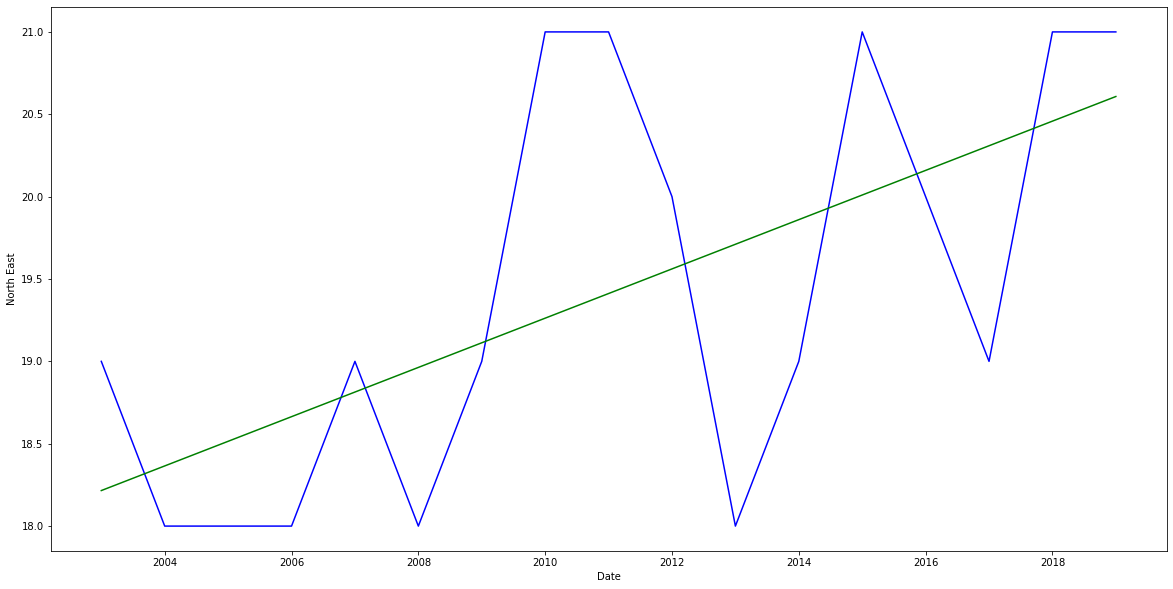

R Square test value: 0.020833333333332593 for North West


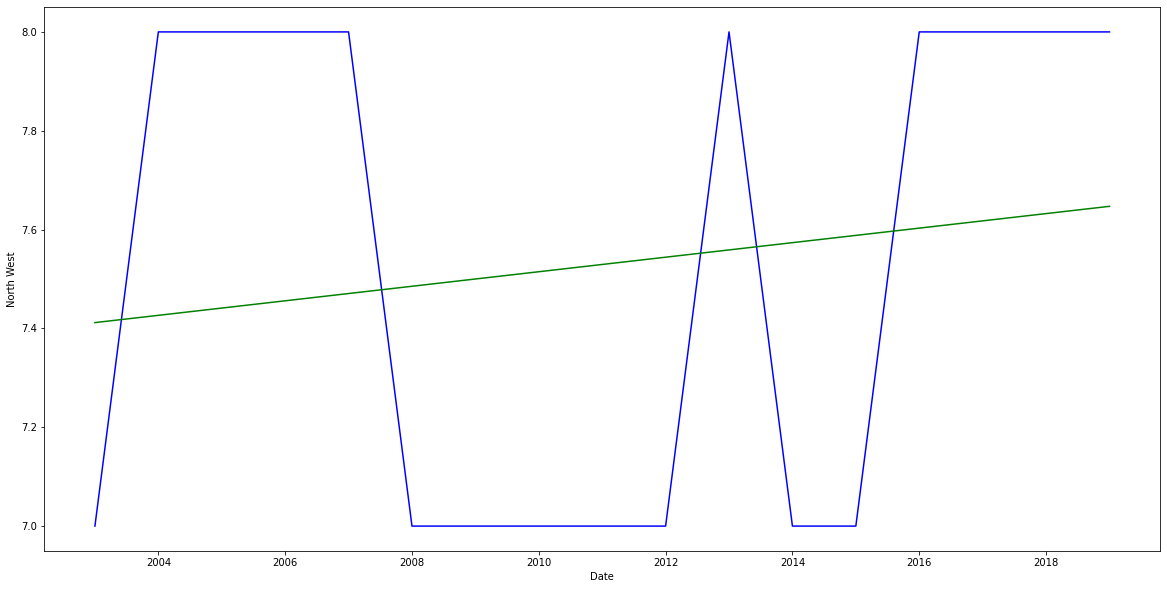

R Square test value: 0.07424242424242855 for Yorkshire and The Humber


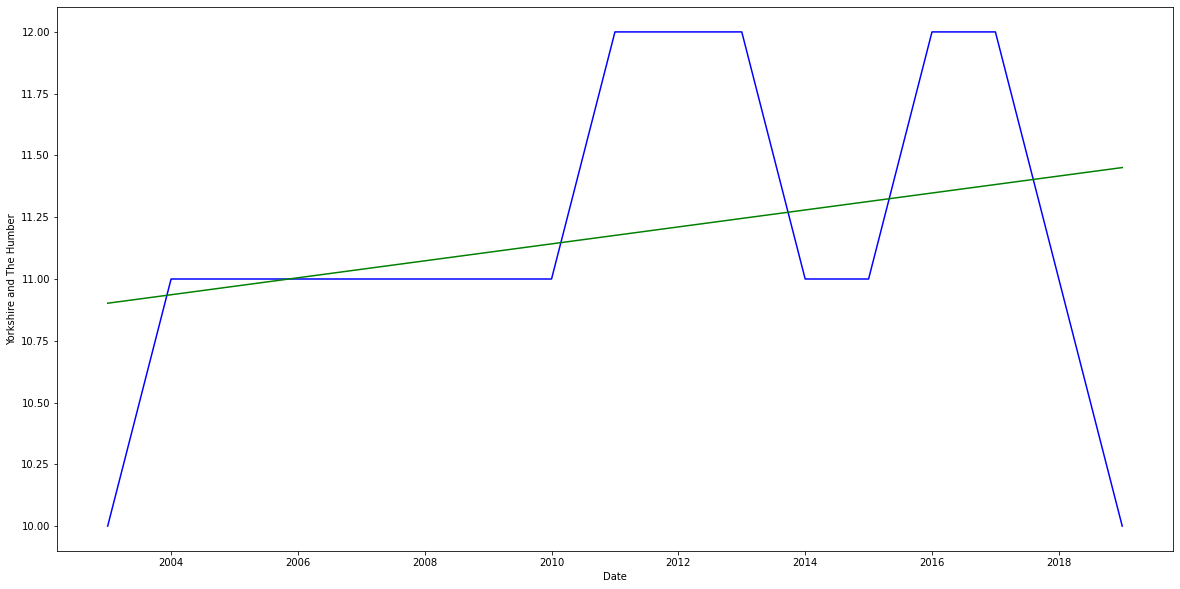

R Square test value: 0.02705627705627711 for East Midlands


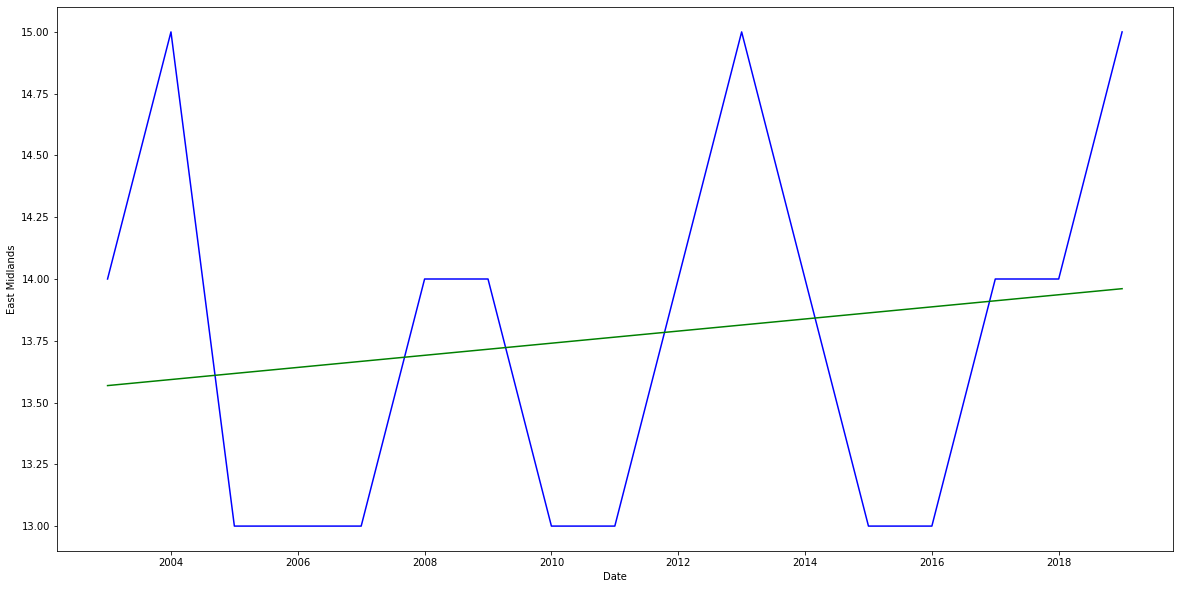

R Square test value: 0.0 for West Midlands


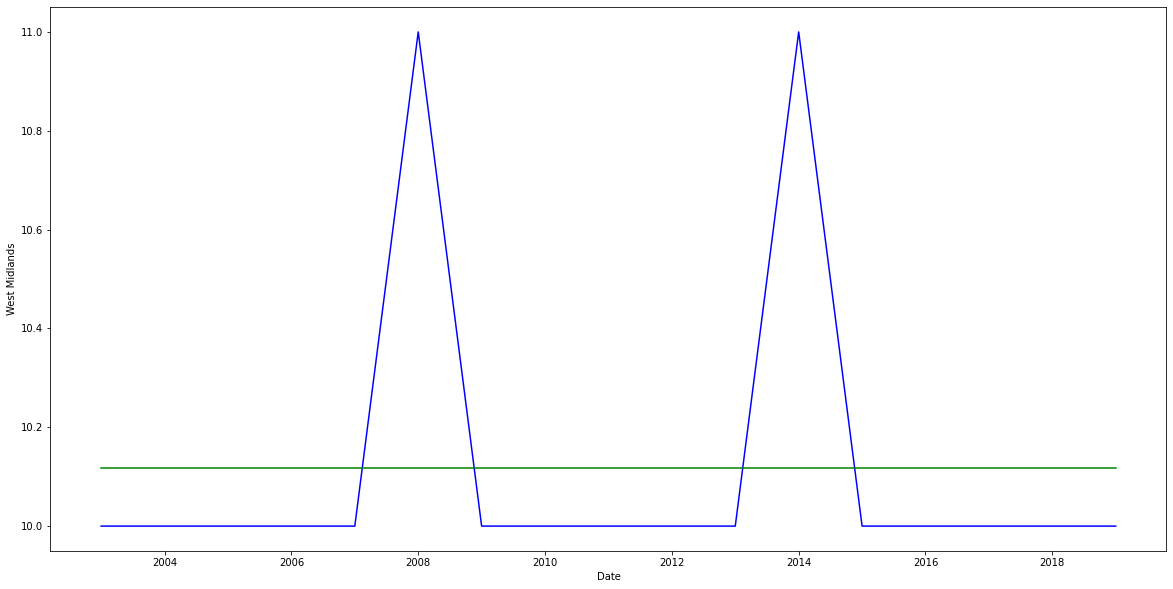

R Square test value: 0.07202380952381315 for East of England


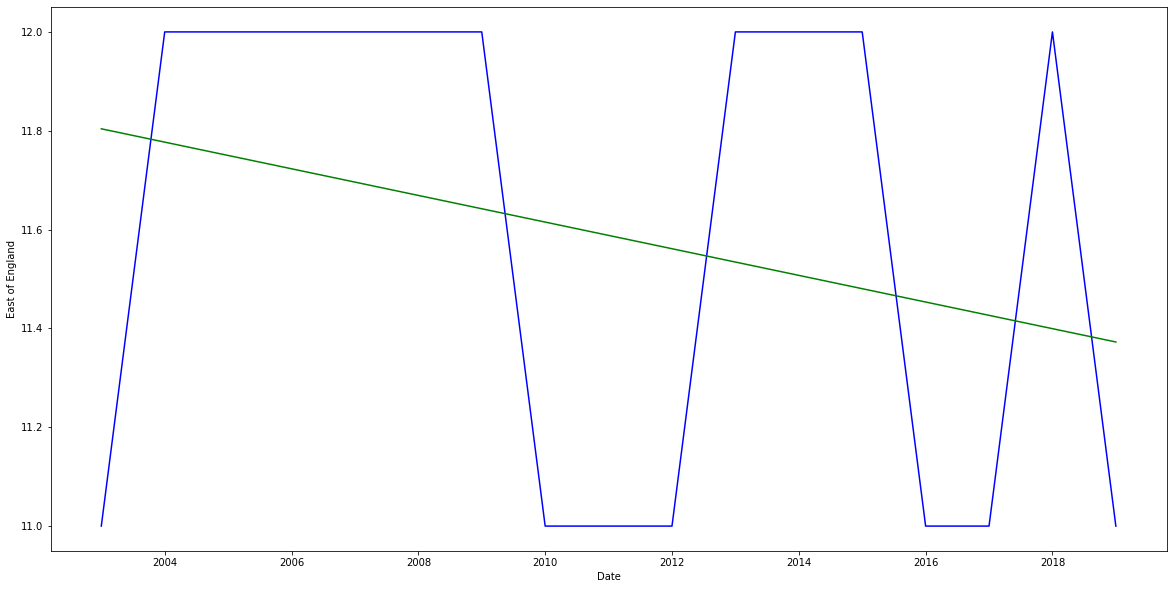

R Square test value: 0.6669685990338221 for London


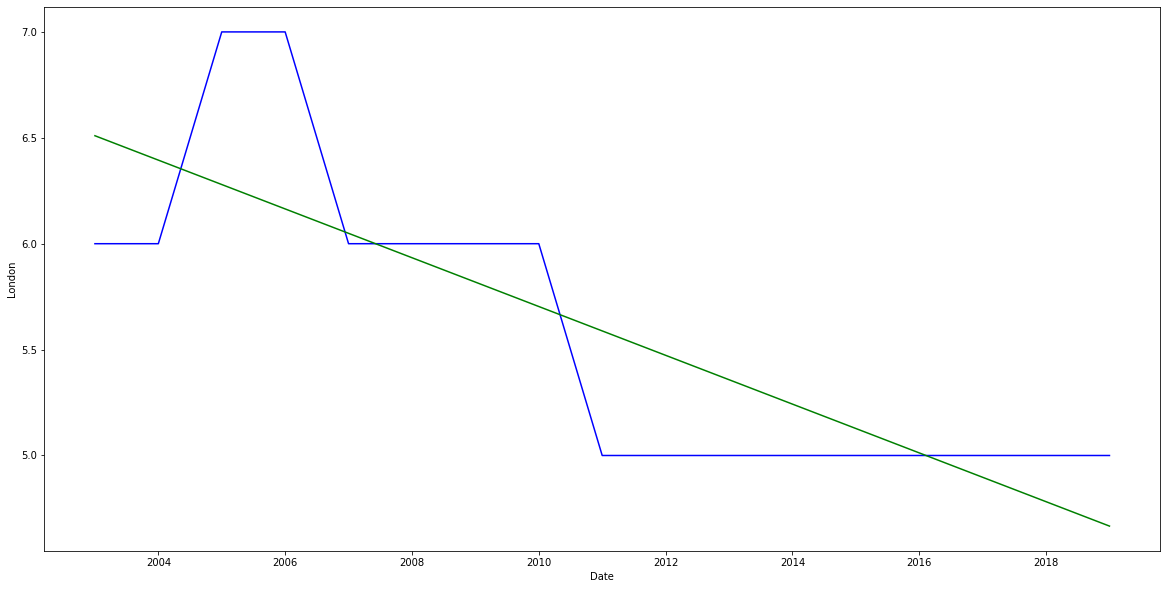

R Square test value: 0.5185606060606055 for South East


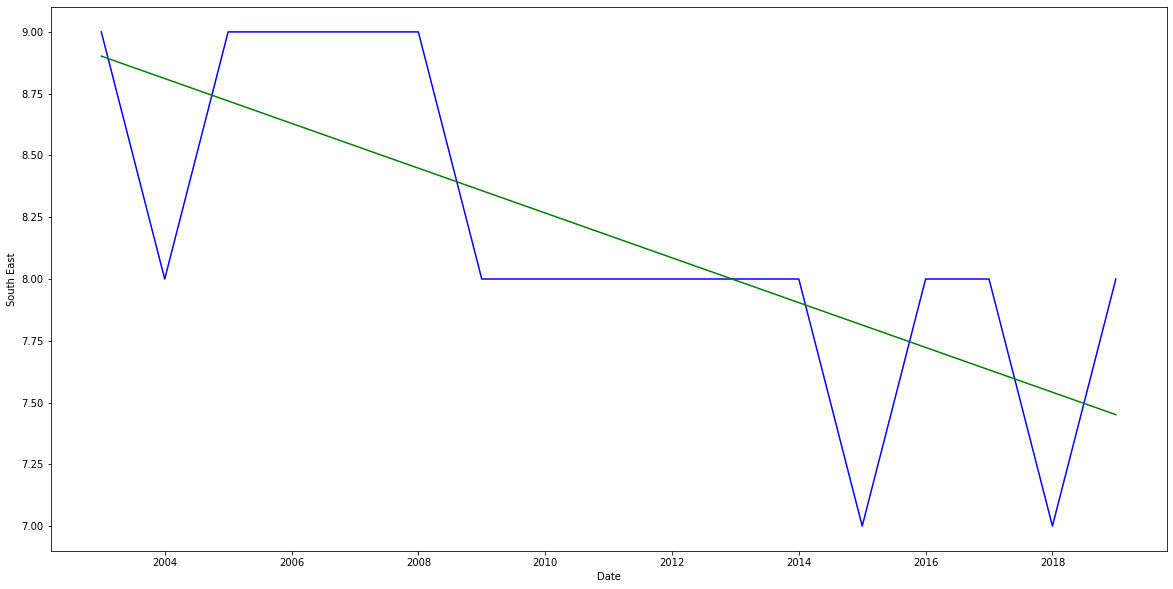

R Square test value: 0.5276162790697649 for South West


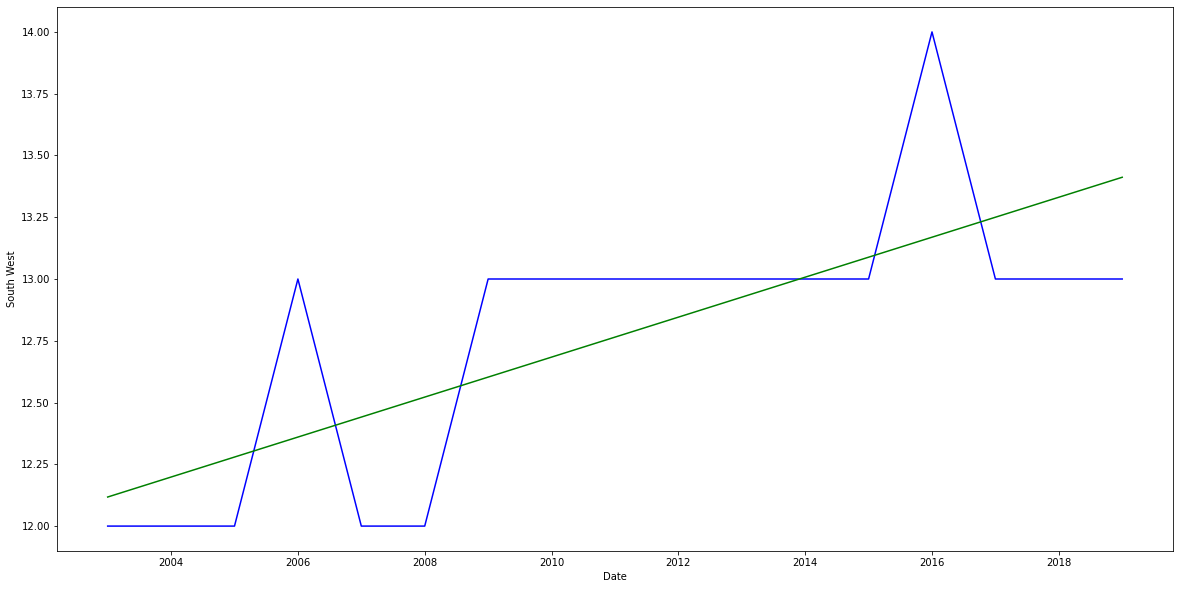

In [1061]:
pred_linear_area = []
for items in areaWise.columns:
  y_area = areaWise[items].values
  model = LinearRegression().fit(x, y_area)
  y_pred = model.predict(x)
  r_square_value = model.score(x,y_area)
  print('R Square test value:',r_square_value,'for',items)
  pred_linear_area.append(r_square_value*100)

  plt.figure(figsize=(20,10))
  plt.plot(x,y_area,'blue')
  plt.plot(x,y_pred,'green')
  plt.xlabel("Date")
  plt.ylabel(f"{items}")
  plt.show()

In [1062]:
area_r2 = pd.DataFrame()
area_r2['Area'] = areaWise.columns
area_r2['LinearReg'] = pred_linear_area


In [1063]:
indexed_pred_area_df = area_r2.set_index('Area')
indexed_pred_area_df

LinearReg
Area                               
North East                37.815041
North West                 2.083333
Yorkshire and The Humber   7.424242
East Midlands              2.705628
West Midlands              0.000000
East of England            7.202381
London                    66.696860
South East                51.856061
South West                52.761628

# Polynomial regression for area wise percentages

R Sqaure test for North East 38.0 %


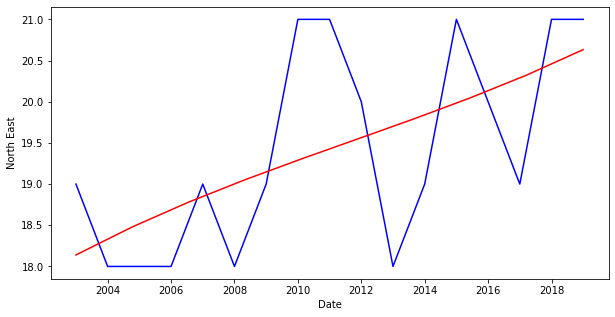

Expected at 2022: 21
 
R Sqaure test for North West 32.0 %


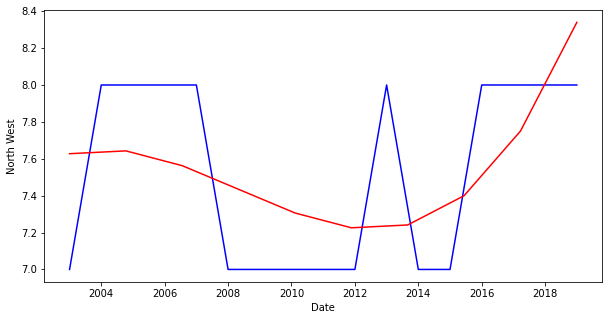

Expected at 2022: 10
 
R Sqaure test for Yorkshire and The Humber 50.0 %


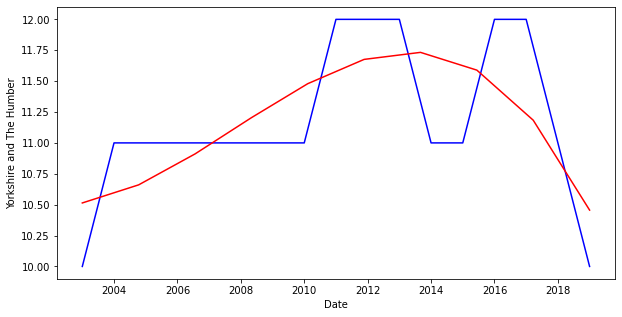

Expected at 2022: 8
 
R Sqaure test for East Midlands 15.0 %


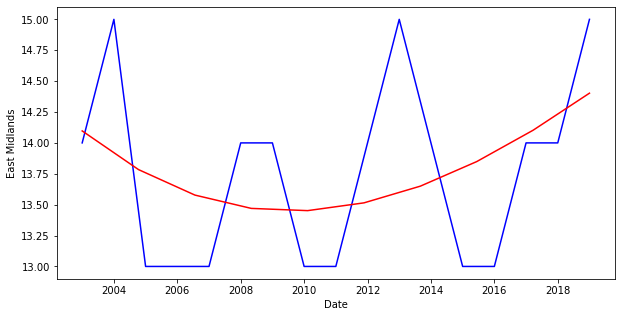

Expected at 2022: 14
 
R Sqaure test for West Midlands 7.000000000000001 %


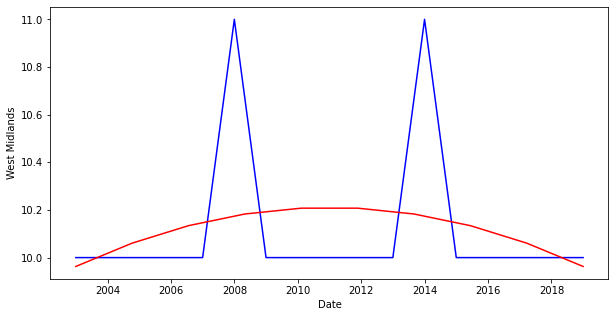

Expected at 2022: 9
 
R Sqaure test for East of England 12.0 %


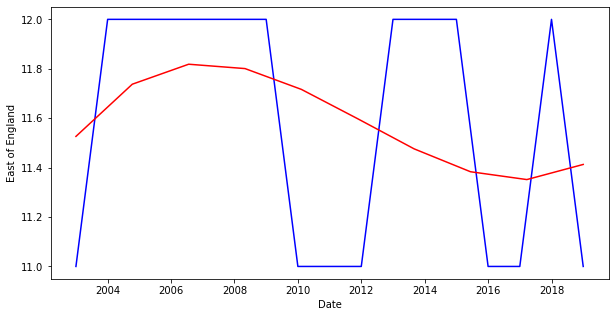

Expected at 2022: 11
 
R Sqaure test for London 81.0 %


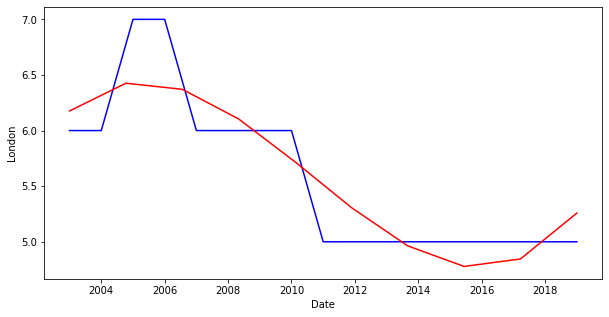

Expected at 2022: 6
 
R Sqaure test for South East 59.0 %


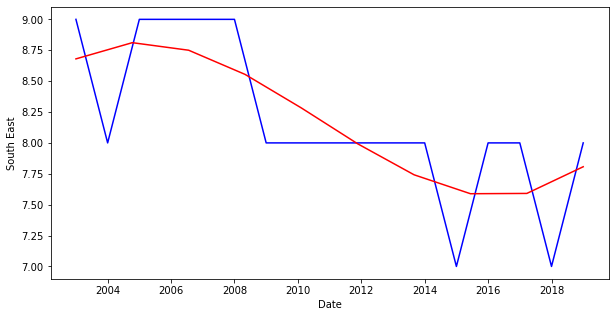

Expected at 2022: 8
 
R Sqaure test for South West 62.0 %


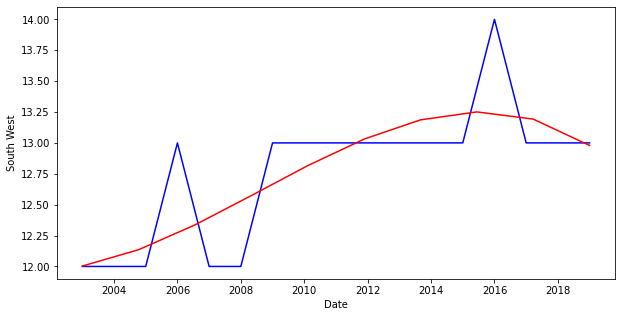

Expected at 2022: 12
 


In [1064]:
# Polynomial regression
polynomial_list_area = []

for items in areaWise.columns:

  #x = np.array(years_list).reshape(-1,1)
  y = areaWise[items].values
  mymodel = np.poly1d(np.polyfit(x1, y ,3))

  myline = np.linspace(2003, 2019, 10)
  print(f"R Sqaure test for {items}",round(r2_score(y, mymodel(x1)),2)*100,"%")
  r2_poly = r2_score(y, mymodel(x1)) * 100
  polynomial_list_area.append(r2_poly)

  # Figure details
  plt.figure(figsize=(10,5))
  plt.plot(x1, y,'blue')
  plt.plot(myline, mymodel(myline),'red')
  plt.xlabel("Date")
  plt.ylabel(f"{items}")
  plt.show()

  speed = mymodel(year_needed)
  print(f"Expected at {year_needed}:",int(speed))
  print(" ")

In [1065]:
polynomial_list_area

[37.88083013045692,
 32.30384976469601,
 50.25518329329801,
 15.390749575589723,
 6.578947368147869,
 11.892230633615819,
 80.70811090859182,
 58.57256781140483,
 62.39290083913349]

In [1066]:
indexed_pred_area_df['PolynomialReg'] = polynomial_list_area
indexed_pred_area_df.style.background_gradient(cmap="Oranges")

# Predictions for area wise percentages

In [1067]:
# Expected values for trips count
y_prediction_area_df = pd.DataFrame()

for items in areaWise.columns:    
    y_prediction_area = areaWise[items].values

    future_area = []

    for i in range(0,11):
        mymodel_area = np.poly1d(np.polyfit(x1, y_prediction_area ,3))
        speed_area = mymodel_area(2020+i)
        future_area.append(int(speed_area))

# Saving the list into a dataframe
    y_prediction_area_df[items] = future_area 

In [1068]:
y_prediction_area_df['Year'] = prediction_years
predicted_area_df = y_prediction_area_df.set_index('Year')

In [1069]:
# adding two areas data frames
frames_area = [areaWise, predicted_area_df]

predited_areaWise_df = pd.concat(frames_area)

predited_areaWise_df.style.background_gradient(cmap="Blues")

In [1070]:
#predited_areaWise_df.to_latex()

# Mode of transport

In [1071]:
# Creating a wb variable to store the spreadsheet bu URL

wb_mode = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=224351901')

In [1072]:
# Getting the sheet(if multiple sheets exists) by sheet name

sheet_mode = wb_mode.worksheet('Mode')

In [1073]:
# Getting all values that exist in the sheet

data_mode = sheet_mode.get_all_values()

In [1074]:
# Converting the values into a dataframe

data_frame_mode = pd.DataFrame(data_mode)
data_frame_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       19 non-null     object
 1   1       19 non-null     object
 2   2       19 non-null     object
 3   3       19 non-null     object
 4   4       19 non-null     object
 5   5       19 non-null     object
 6   6       19 non-null     object
 7   7       19 non-null     object
 8   8       19 non-null     object
 9   9       19 non-null     object
 10  10      19 non-null     object
 11  11      19 non-null     object
 12  12      19 non-null     object
 13  13      19 non-null     object
 14  14      19 non-null     object
dtypes: object(15)
memory usage: 2.4+ KB


In [1075]:
# Getting the first row to be the header

data_frame_mode.columns = data_frame_mode.iloc[0]

data_frame_mode = data_frame_mode.iloc[1:].reset_index(drop=True)

data_frame_mode

0   Year Walk Bicycle driver  ... Surface rail minicab transport3 Total
0   2002  264      18    438  ...           13      12          2  1074
1   2003  269      16    427  ...           14      12          3  1060
2   2004  273      17    421  ...           17      11          2  1054
3   2005  272      15    434  ...           16      11          3  1069
4   2006  275      17    432  ...           17      10          3  1066
5   2007  240      15    409  ...           18      10          2   999
6   2008  242      17    410  ...           18      10          2  1015
7   2009  250      16    393  ...           17      10          2   996
8   2010  234      15    402  ...           19       9          2   980
9   2011  242      16    392  ...           17      10          2   971
10  2012  233      17    396  ...           20      10          2   972
11  2013  223      14    380  ...           20      10          3   943
12  2014  220      18    384  ...           21      10          2   940
13  2015  219      17    381  ...           20      10          3   935
14  2016  243      15    389  ...           21      11          3   955
15  2017  255      17    390  ...           21       9          4   974
16  2018  262      17    395  ...           22      10          3   984
17  2019  250      16    380  ...           21      11          3   952

[18 rows x 15 columns]

In [1076]:
indexed_df_mode = data_frame_mode.set_index('Year')


In [1077]:
# trips per person per year
indexed_df_mode

0    Walk Bicycle driver passenger  ... Surface rail minicab transport3 Total
Year                                ...                                      
2002  264      18    438       240  ...           13      12          2  1074
2003  269      16    427       233  ...           14      12          3  1060
2004  273      17    421       228  ...           17      11          2  1054
2005  272      15    434       234  ...           16      11          3  1069
2006  275      17    432       227  ...           17      10          3  1066
2007  240      15    409       219  ...           18      10          2   999
2008  242      17    410       226  ...           18      10          2  1015
2009  250      16    393       218  ...           17      10          2   996
2010  234      15    402       212  ...           19       9          2   980
2011  242      16    392       209  ...           17      10          2   971
2012  233      17    396       213  ...           20      10          2   972
2013  223      14    380       210  ...           20      10          3   943
2014  220      18    384       206  ...           21      10          2   940
2015  219      17    381       204  ...           20      10          3   935
2016  243      15    389       202  ...           21      11          3   955
2017  255      17    390       204  ...           21       9          4   974
2018  262      17    395       207  ...           22      10          3   984
2019  250      16    380       200  ...           21      11          3   952

[18 rows x 14 columns]

In [1078]:
new_df_mode = pd.DataFrame()

In [1079]:
driver_mode = indexed_df_mode['driver'].astype(int)
passenger_mode = indexed_df_mode['passenger'].astype(int)

In [1080]:
new_df_mode['Passenger_mode'] = passenger_mode
new_df_mode['Driver_mode'] = driver_mode

In [1081]:
new_df_mode['total_trips_by_car'] = new_df_mode['Driver_mode'] + new_df_mode['Passenger_mode']

In [1082]:
new_df_mode

Passenger_mode  Driver_mode  total_trips_by_car
Year                                                 
2002             240          438                 678
2003             233          427                 660
2004             228          421                 649
2005             234          434                 668
2006             227          432                 659
2007             219          409                 628
2008             226          410                 636
2009             218          393                 611
2010             212          402                 614
2011             209          392                 601
2012             213          396                 609
2013             210          380                 590
2014             206          384                 590
2015             204          381                 585
2016             202          389                 591
2017             204          390                 594
2018             207          395                 602
2019             200          380                 580

# Predictions for trips by mode


In [1083]:
x_mode = np.array(years_list).reshape(-1,1)

In [1084]:
x_mode = x_mode.astype(int)

In [1085]:
x_mode

array([[2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [1086]:
required_mode_column_list = new_df_mode['total_trips_by_car'].iloc[1:]
y_mode = required_mode_column_list.values

In [1087]:
len(x_mode)

17

In [1088]:
len(y_mode)

17

R Square test value: 0.8181432607973318


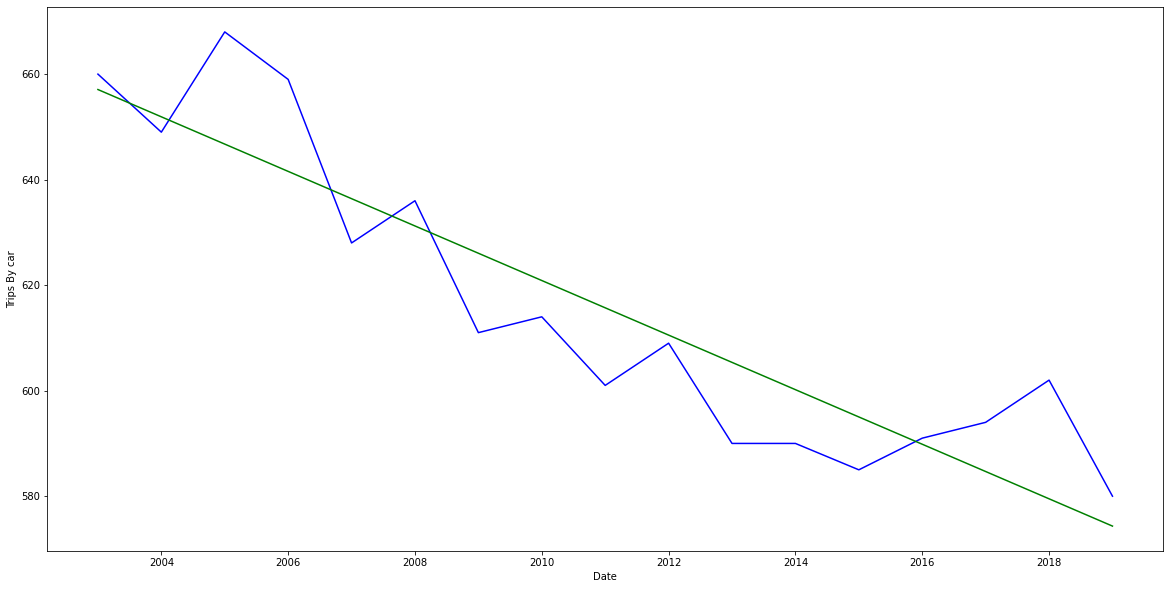

In [1089]:
model_mode = LinearRegression().fit(x_mode, y_mode)
y_pred_model = model_mode.predict(x_mode)
r_square_value_mode = model_mode.score(x_mode,y_mode)
print('R Square test value:',r_square_value_mode)
#r2_for_linear_df_mode.append(r_square_value_mode*100)

plt.figure(figsize=(20,10))
plt.plot(x_mode,y_mode,'blue')
plt.plot(x_mode,y_pred_model,'green')
plt.xlabel("Date")
plt.ylabel("Trips By car")
plt.show()

In [1090]:
x1

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

In [1091]:
y_pred_model

array([657.07843137, 651.90686275, 646.73529412, 641.56372549,
       636.39215686, 631.22058824, 626.04901961, 620.87745098,
       615.70588235, 610.53431373, 605.3627451 , 600.19117647,
       595.01960784, 589.84803922, 584.67647059, 579.50490196,
       574.33333333])

In [1092]:
future_trips_by_car = []
for i in range(0,11):
  mymodel_trips_by_car = np.poly1d(np.polyfit(x1, y_pred_model ,3))
  trips_by_car = mymodel_trips_by_car(2020+i)
  future_trips_by_car.append(int(trips_by_car))
  print(f"Expected at {2020+i}:",int(trips_by_car))

Expected at 2020: 569
Expected at 2021: 563
Expected at 2022: 558
Expected at 2023: 553
Expected at 2024: 548
Expected at 2025: 543
Expected at 2026: 538
Expected at 2027: 532
Expected at 2028: 527
Expected at 2029: 522
Expected at 2030: 517


In [1093]:
future_trips_by_car

[569, 563, 558, 553, 548, 543, 538, 532, 527, 522, 517]

In [1094]:
last_df_mode = new_df_mode['total_trips_by_car']
last_df_mode

Year
2002    678
2003    660
2004    649
2005    668
2006    659
2007    628
2008    636
2009    611
2010    614
2011    601
2012    609
2013    590
2014    590
2015    585
2016    591
2017    594
2018    602
2019    580
Name: total_trips_by_car, dtype: int64

In [1095]:
prediction_dataFrame['Prediction_for_Trips_By_Car'] = future_trips_by_car


In [1096]:
prediction_dataFrame.style.background_gradient(cmap="Blues")

In [1097]:
prediction_dataFrame['Total_miles_by_car'] = prediction_dataFrame['Miles_per_Trips'] * prediction_dataFrame['Prediction_for_Trips_By_Car']

In [1098]:
prediction_dataFrame.style.background_gradient(cmap="Greens")

In [1099]:
prediction_dataFrame['Predictions_for_populations'] = future_pop

In [1100]:
prediction_dataFrame

Predictions_for_trips  ...  Predictions_for_populations
year                         ...                             
2020                   1270  ...                     56797220
2021                   1351  ...                     57209666
2022                   1445  ...                     57622112
2023                   1555  ...                     58034558
2024                   1680  ...                     58447004
2025                   1822  ...                     58859450
2026                   1983  ...                     59271897
2027                   2162  ...                     59684343
2028                   2361  ...                     60096789
2029                   2581  ...                     60509235
2030                   2822  ...                     60921681

[11 rows x 6 columns]

In [1101]:
required_df = pd.DataFrame()

In [1102]:
required_df['Total_miles_by_car'] = prediction_dataFrame['Total_miles_by_car']
required_df['Predictions_for_population'] = prediction_dataFrame['Predictions_for_populations']

# Predictions for total miles by car by entire population

In [1103]:
required_df['Total_distance_in_miles'] = required_df['Total_miles_by_car'] * required_df['Predictions_for_population']

In [1104]:
required_df

Total_miles_by_car  Predictions_for_population  Total_distance_in_miles
year                                                                         
2020         3797.962992                    56797220             2.157137e+11
2021         3717.216876                    57209666             2.126607e+11
2022         3644.956401                    57622112             2.100301e+11
2023         3569.428296                    58034558             2.071502e+11
2024         3496.761905                    58447004             2.043753e+11
2025         3425.191548                    58859450             2.016049e+11
2026         3353.343419                    59271897             1.987590e+11
2027         3279.600370                    59684343             1.957408e+11
2028         3214.454468                    60096789             1.931784e+11
2029         3151.820225                    60509235             1.907142e+11
2030         3092.839830                    60921681             1.884210e+11

In [1105]:
# avg efficiency of electric vehciles in watt-hour per miles
efficiency

304.43

In [1106]:
required_df['Energy_demand(Watt-Hours)'] = required_df['Total_distance_in_miles'] * efficiency

In [1107]:
required_df

Total_miles_by_car  ...  Energy_demand(Watt-Hours)
year                      ...                           
2020         3797.962992  ...               6.566973e+13
2021         3717.216876  ...               6.474031e+13
2022         3644.956401  ...               6.393946e+13
2023         3569.428296  ...               6.306273e+13
2024         3496.761905  ...               6.221796e+13
2025         3425.191548  ...               6.137458e+13
2026         3353.343419  ...               6.050821e+13
2027         3279.600370  ...               5.958937e+13
2028         3214.454468  ...               5.880930e+13
2029         3151.820225  ...               5.805913e+13
2030         3092.839830  ...               5.736101e+13

[11 rows x 4 columns]

In [1108]:
required_area_year = predited_areaWise_df.iloc[17:,:]

#megawatt-hour conversion from watt-hour

In [1109]:
megawatt_hours_conversion = 1e-6

In [1110]:
required_df['Energy_demand(MegaWatt-Hours)'] = required_df['Energy_demand(Watt-Hours)'] * megawatt_hours_conversion

In [1111]:
required_df

Total_miles_by_car  ...  Energy_demand(MegaWatt-Hours)
year                      ...                               
2020         3797.962992  ...                   6.566973e+07
2021         3717.216876  ...                   6.474031e+07
2022         3644.956401  ...                   6.393946e+07
2023         3569.428296  ...                   6.306273e+07
2024         3496.761905  ...                   6.221796e+07
2025         3425.191548  ...                   6.137458e+07
2026         3353.343419  ...                   6.050821e+07
2027         3279.600370  ...                   5.958937e+07
2028         3214.454468  ...                   5.880930e+07
2029         3151.820225  ...                   5.805913e+07
2030         3092.839830  ...                   5.736101e+07

[11 rows x 5 columns]

# area and energy demand analysis

In [1112]:
required_area_year

North East  North West  ...  South East  South West
Year                          ...                        
2020          20           8  ...           8          12
2021          21           9  ...           8          12
2022          21          10  ...           8          12
2023          21          10  ...           9          11
2024          21          11  ...          10          11
2025          22          12  ...          10          10
2026          22          13  ...          11          10
2027          22          15  ...          12           9
2028          23          16  ...          14           8
2029          23          18  ...          15           7
2030          23          20  ...          17           6

[11 rows x 9 columns]

In [1113]:
required_df.iloc[0:1,-1:]

Energy_demand(MegaWatt-Hours)
year                               
2020                   6.566973e+07

In [1114]:
final_list = []
for i in range(0,11):
  new_values = required_area_year.iloc[i:i+1,:].values * required_df.iloc[i:i+1,-1:].values/100
  final_list.append(new_values)

In [1115]:
final_list[1].tolist()[0]

[13595464.647358065,
 5826627.706010599,
 5826627.706010599,
 9063643.098238708,
 5826627.706010599,
 7121433.862901842,
 3884418.470673733,
 5179224.627564977,
 7768836.941347466]

In [1116]:
area_wise_ed_df = pd.DataFrame()

i = -1
for items in prediction_years:
  i=i+1
  #print(final_list[i].tolist()[0])
  area_wise_ed_df[items] = final_list[i].tolist()[0]
  
  



In [1117]:
transposed_area_ed_df = area_wise_ed_df.T

In [1118]:
final_df_areaWise.columns

Index(['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands',
       'West Midlands', 'East of England', 'London', 'South East',
       'South West'],
      dtype='object', name=0)

In [1119]:
transposed_area_ed_df.columns = final_df_areaWise.columns

# Area wise energy demand in megawatt-hours per year

In [1120]:
transposed_area_ed_df.style.background_gradient(cmap="Blues")

In [1121]:
transposed_area_ed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2020 to 2030
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   North East                11 non-null     float64
 1   North West                11 non-null     float64
 2   Yorkshire and The Humber  11 non-null     float64
 3   East Midlands             11 non-null     float64
 4   West Midlands             11 non-null     float64
 5   East of England           11 non-null     float64
 6   London                    11 non-null     float64
 7   South East                11 non-null     float64
 8   South West                11 non-null     float64
dtypes: float64(9)
memory usage: 1.2+ KB


In [1122]:
(transposed_area_ed_df == 0).sum(axis=1)

2020    0
2021    0
2022    0
2023    0
2024    0
2025    0
2026    0
2027    0
2028    1
2029    0
2030    0
dtype: int64

In [1123]:
transposed_area_ed_df.iloc[8:9,2:3] = transposed_area_ed_df['Yorkshire and The Humber'].mean()

In [1124]:
transposed_area_ed_df.style.background_gradient(cmap="Greens")

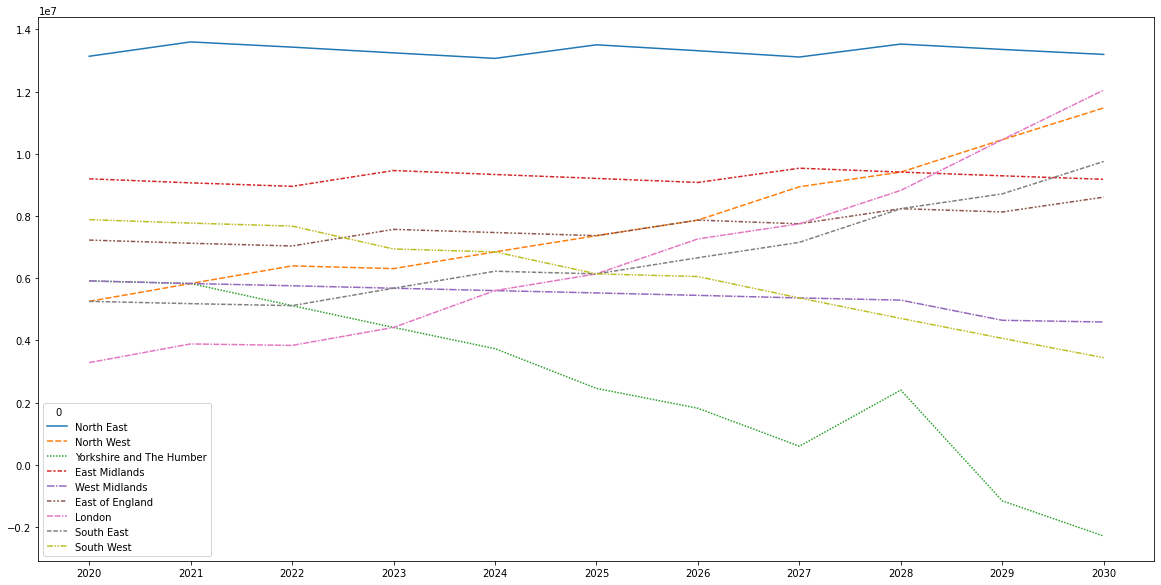

In [1125]:
# Import seaborn
import seaborn as sns
# Visualitation of data
plt.figure(figsize=(20,10))
sns.lineplot(data=transposed_area_ed_df)

# Month wise trips analysis

In [1126]:
# Creating a wb variable to store the spreadsheet bu URL

wb_year = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=517804340')

In [1127]:
# Getting the sheet(if multiple sheets exists) by sheet name

sheet_year = wb_year.worksheet('Year')

In [1128]:
# Getting all values that exist in the sheet

data_year = sheet_year.get_all_values()

In [1129]:
# Converting the values into a dataframe

data_frame_year = pd.DataFrame(data_year)

In [1130]:
data_frame_year.style.background_gradient(cmap="Blues")

In [1131]:
# Getting the first row to be the header

data_frame_year.columns = data_frame_year.iloc[0]

data_frame_year = data_frame_year.iloc[1:].reset_index(drop=True)

data_frame_year

0     Years Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
0   2003/07  86  81  93  87  92  86  90  82  88  91  89  83
1   2004/08  86  81  91  87  92  85  89  82  89  91  87  83
2   2005/09  83  79  90  86  91  85  88  82  88  90  86  81
3   2006/10  82  78  90  85  90  84  87  80  86  88  85  77
4   2007/11  81  77  89  84  87  83  85  78  85  86  84  75
5   2008/12  80  77  87  83  87  83  85  79  85  86  82  75
6   2009/13  78  75  86  82  85  82  85  77  83  84  82  74
7   2010/14  78  74  85  81  84  82  84  75  81  82  82  74
8   2011/15  78  73  84  79  84  81  83  74  78  82  81  76
9   2012/16  76  73  83  79  85  81  82  73  79  82  80  77
10  2013/17  77  72  84  79  84  81  82  72  79  81  80  77
11  2014/18  77  74  85  80  85  82  82  73  78  83  80  78
12  2015/19  78  75  85  79  85  81  83  74  80  82  80  79

In [1132]:
indexed_df_year = data_frame_year.set_index('Years')
indexed_df_year

0       Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
Years                                                  
2003/07  86  81  93  87  92  86  90  82  88  91  89  83
2004/08  86  81  91  87  92  85  89  82  89  91  87  83
2005/09  83  79  90  86  91  85  88  82  88  90  86  81
2006/10  82  78  90  85  90  84  87  80  86  88  85  77
2007/11  81  77  89  84  87  83  85  78  85  86  84  75
2008/12  80  77  87  83  87  83  85  79  85  86  82  75
2009/13  78  75  86  82  85  82  85  77  83  84  82  74
2010/14  78  74  85  81  84  82  84  75  81  82  82  74
2011/15  78  73  84  79  84  81  83  74  78  82  81  76
2012/16  76  73  83  79  85  81  82  73  79  82  80  77
2013/17  77  72  84  79  84  81  82  72  79  81  80  77
2014/18  77  74  85  80  85  82  82  73  78  83  80  78
2015/19  78  75  85  79  85  81  83  74  80  82  80  79

In [1133]:
indexed_df_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2003/07 to 2015/19
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Jan     13 non-null     object
 1   Feb     13 non-null     object
 2   Mar     13 non-null     object
 3   Apr     13 non-null     object
 4   May     13 non-null     object
 5   Jun     13 non-null     object
 6   Jul     13 non-null     object
 7   Aug     13 non-null     object
 8   Sep     13 non-null     object
 9   Oct     13 non-null     object
 10  Nov     13 non-null     object
 11  Dec     13 non-null     object
dtypes: object(12)
memory usage: 1.3+ KB


In [1134]:
year_range = indexed_df_year.index.values
year_range

array(['2003/07', '2004/08', '2005/09', '2006/10', '2007/11', '2008/12',
       '2009/13', '2010/14', '2011/15', '2012/16', '2013/17', '2014/18',
       '2015/19'], dtype=object)

In [1135]:
year_period = indexed_df_year.columns
year_period

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name=0)

In [1136]:
sample_year = indexed_df_year.values.astype(int)
numeric_df_year = pd.DataFrame(sample_year)
numeric_df_year

0   1   2   3   4   5   6   7   8   9   10  11
0   86  81  93  87  92  86  90  82  88  91  89  83
1   86  81  91  87  92  85  89  82  89  91  87  83
2   83  79  90  86  91  85  88  82  88  90  86  81
3   82  78  90  85  90  84  87  80  86  88  85  77
4   81  77  89  84  87  83  85  78  85  86  84  75
5   80  77  87  83  87  83  85  79  85  86  82  75
6   78  75  86  82  85  82  85  77  83  84  82  74
7   78  74  85  81  84  82  84  75  81  82  82  74
8   78  73  84  79  84  81  83  74  78  82  81  76
9   76  73  83  79  85  81  82  73  79  82  80  77
10  77  72  84  79  84  81  82  72  79  81  80  77
11  77  74  85  80  85  82  82  73  78  83  80  78
12  78  75  85  79  85  81  83  74  80  82  80  79

In [1137]:
numeric_df_year['Month'] = year_range


In [1138]:
indexed_year_df = numeric_df_year.set_index('Month')
indexed_year_df.columns = indexed_df_year.columns
indexed_year_df

0        Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
Month                                                              
2003/07   86   81   93   87   92   86   90   82   88   91   89   83
2004/08   86   81   91   87   92   85   89   82   89   91   87   83
2005/09   83   79   90   86   91   85   88   82   88   90   86   81
2006/10   82   78   90   85   90   84   87   80   86   88   85   77
2007/11   81   77   89   84   87   83   85   78   85   86   84   75
2008/12   80   77   87   83   87   83   85   79   85   86   82   75
2009/13   78   75   86   82   85   82   85   77   83   84   82   74
2010/14   78   74   85   81   84   82   84   75   81   82   82   74
2011/15   78   73   84   79   84   81   83   74   78   82   81   76
2012/16   76   73   83   79   85   81   82   73   79   82   80   77
2013/17   77   72   84   79   84   81   82   72   79   81   80   77
2014/18   77   74   85   80   85   82   82   73   78   83   80   78
2015/19   78   75   85   79   85   81   83   74   80   82   80   79

In [1139]:
indexed_year_df.describe()

0            Jan        Feb        Mar  ...        Oct        Nov        Dec
count  13.000000  13.000000  13.000000  ...  13.000000  13.000000  13.000000
mean   80.000000  76.076923  87.076923  ...  85.230769  82.923077  77.615385
std     3.366502   3.012793   3.174417  ...   3.700312   3.012793   3.096731
min    76.000000  72.000000  83.000000  ...  81.000000  80.000000  74.000000
25%    78.000000  74.000000  85.000000  ...  82.000000  80.000000  75.000000
50%    78.000000  75.000000  86.000000  ...  84.000000  82.000000  77.000000
75%    82.000000  78.000000  90.000000  ...  88.000000  85.000000  79.000000
max    86.000000  81.000000  93.000000  ...  91.000000  89.000000  83.000000

[8 rows x 12 columns]

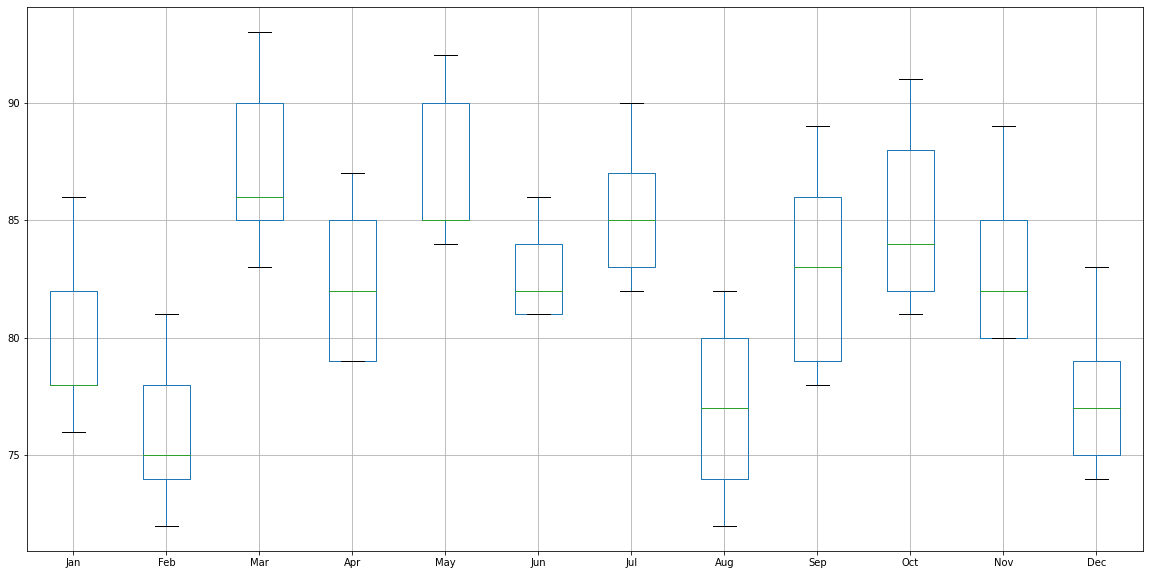

In [1140]:
indexed_year_df.boxplot(column=None,figsize=(20,10),grid=True)

In [1141]:
mean_of_year_array = indexed_year_df.mean(axis = 0).values
mean_of_year_list = mean_of_year_array.tolist()
mean_of_year_list

[80.0,
 76.07692307692308,
 87.07692307692308,
 82.38461538461539,
 87.0,
 82.76923076923077,
 85.0,
 77.0,
 83.0,
 85.23076923076923,
 82.92307692307692,
 77.61538461538461]

In [1142]:
# Max of the list
max(mean_of_year_list)

87.07692307692308

In [1143]:
# Sum of all values
sum_of_year_value = sum(mean_of_year_list)
sum_of_year_value

986.0769230769232

In [1144]:
required_year_list = [(x/sum_of_year_value)*100 for x in  mean_of_year_list]

In [1145]:
required_year_list

[8.112957328964816,
 7.715110383025197,
 8.830642015757858,
 8.354785864732039,
 8.822841095249238,
 8.393790467275137,
 8.620017162025118,
 7.808721429128636,
 8.417193228800997,
 8.643419923550976,
 8.409392308292377,
 7.871128793197596]

In [1146]:
year_df = pd.DataFrame()
year_df.append(required_year_list)

0
0   8.112957
1   7.715110
2   8.830642
3   8.354786
4   8.822841
5   8.393790
6   8.620017
7   7.808721
8   8.417193
9   8.643420
10  8.409392
11  7.871129

In [1147]:
year_df['month'] = year_period

In [1148]:
year_df['Percentage'] = required_year_list

In [1149]:
indexed_month_df = year_df.set_index('month')

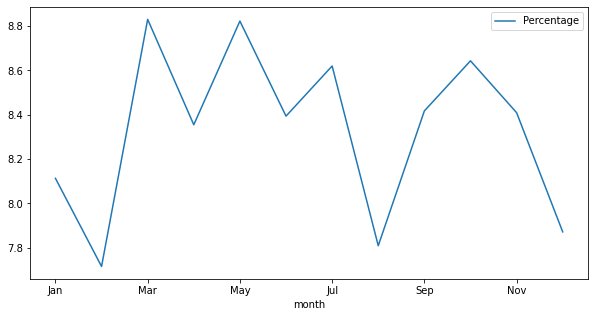

In [1150]:

indexed_month_df.plot(figsize = (10,5))

# Area wise distribution
# Considering one area in a year(lets say 2025)

In [1151]:
selected_area_year = transposed_area_ed_df['North East']['2025']

In [1152]:
selected_area_year

13502406.909005849

In [1153]:
monthWise_ed_dist = []
for i in indexed_month_df['Percentage'].values:
  #print(i*selected_area_year/100)
  monthWise_ed_dist.append(i*selected_area_year/100)

monthWise_ed_dist
  

[1095444.5109108416,
 1041725.5973950218,
 1192349.2176452624,
 1128097.1838322228,
 1191295.9056155405,
 1133363.7439808324,
 1163909.7928427693,
 1054365.3417516851,
 1136523.6800699984,
 1167069.728931935,
 1135470.3680402762,
 1062791.837989461]

# North east area wide energy demand estimation in the year 2025

In [1154]:
selected_area_df = pd.DataFrame()

In [1155]:
selected_area_df['Monthly_Energy_Demand(MegaWatt-Hours)'] = monthWise_ed_dist
selected_area_df['Month'] = year_period
indexed_selected_area_df = selected_area_df.set_index('Month')

In [1156]:
indexed_selected_area_df.style.background_gradient(cmap="Blues")

# Week wise analysis

In [1157]:
# Creating a wb variable to store the spreadsheet bu URL

wb_week = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=24479772')

In [1158]:
# Getting the sheet(if multiple sheets exists) by sheet name

sheet_week = wb_week.worksheet('Week')

In [1159]:
# Getting all values that exist in the sheet

data_week = sheet_week.get_all_values()

In [1160]:
# Converting the values into a dataframe

data_frame_week = pd.DataFrame(data_week)

In [1161]:
data_frame_week

0       1        2          3         4       5         6       7
0     Years  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
1   2003/07     149      158        158       160     164       146     114
2   2004/08     149      156        157       159     162       144     113
3   2005/09     147      154        157       158     160       142     112
4   2006/10     144      152        154       154     157       140     110
5   2007/11     142      149        152       152     154       136     107
6   2008/12     142      148        152       151     153       135     107
7   2009/13     140      146        149       149     152       133     105
8   2010/14     139      145        147       147     150       130     104
9   2011/15     138      143        146       146     148       129     103
10  2012/16     138      142        145       145     147       128     103
11  2013/17     138      142        145       145     147       128     104
12  2014/18     140      143        146       146     147       130     105
13  2015/19     140      143        147       146     148       130     105

In [1162]:
# Getting the first row to be the header

data_frame_week.columns = data_frame_week.iloc[0]

data_frame_week = data_frame_week.iloc[1:].reset_index(drop=True)

data_frame_week

0     Years Monday Tuesday Wednesday Thursday Friday Saturday Sunday
0   2003/07    149     158       158      160    164      146    114
1   2004/08    149     156       157      159    162      144    113
2   2005/09    147     154       157      158    160      142    112
3   2006/10    144     152       154      154    157      140    110
4   2007/11    142     149       152      152    154      136    107
5   2008/12    142     148       152      151    153      135    107
6   2009/13    140     146       149      149    152      133    105
7   2010/14    139     145       147      147    150      130    104
8   2011/15    138     143       146      146    148      129    103
9   2012/16    138     142       145      145    147      128    103
10  2013/17    138     142       145      145    147      128    104
11  2014/18    140     143       146      146    147      130    105
12  2015/19    140     143       147      146    148      130    105

In [1163]:
indexed_df_week = data_frame_week.set_index('Years')
indexed_df_week

0       Monday Tuesday Wednesday Thursday Friday Saturday Sunday
Years                                                           
2003/07    149     158       158      160    164      146    114
2004/08    149     156       157      159    162      144    113
2005/09    147     154       157      158    160      142    112
2006/10    144     152       154      154    157      140    110
2007/11    142     149       152      152    154      136    107
2008/12    142     148       152      151    153      135    107
2009/13    140     146       149      149    152      133    105
2010/14    139     145       147      147    150      130    104
2011/15    138     143       146      146    148      129    103
2012/16    138     142       145      145    147      128    103
2013/17    138     142       145      145    147      128    104
2014/18    140     143       146      146    147      130    105
2015/19    140     143       147      146    148      130    105

In [1164]:
week_list = indexed_df_week.columns
week_list

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name=0)

In [1165]:
sample_week = indexed_df_week.values.astype(int)
numeric_df_week = pd.DataFrame(sample_week)
numeric_df_week

0    1    2    3    4    5    6
0   149  158  158  160  164  146  114
1   149  156  157  159  162  144  113
2   147  154  157  158  160  142  112
3   144  152  154  154  157  140  110
4   142  149  152  152  154  136  107
5   142  148  152  151  153  135  107
6   140  146  149  149  152  133  105
7   139  145  147  147  150  130  104
8   138  143  146  146  148  129  103
9   138  142  145  145  147  128  103
10  138  142  145  145  147  128  104
11  140  143  146  146  147  130  105
12  140  143  147  146  148  130  105

In [1166]:
numeric_df_week.columns = week_list

In [1167]:
numeric_df_week['Year'] = year_range

In [1168]:
indexed_numeric_df_week = numeric_df_week.set_index('Year')

In [1169]:
indexed_numeric_df_week

0        Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Year                                                                   
2003/07     149      158        158       160     164       146     114
2004/08     149      156        157       159     162       144     113
2005/09     147      154        157       158     160       142     112
2006/10     144      152        154       154     157       140     110
2007/11     142      149        152       152     154       136     107
2008/12     142      148        152       151     153       135     107
2009/13     140      146        149       149     152       133     105
2010/14     139      145        147       147     150       130     104
2011/15     138      143        146       146     148       129     103
2012/16     138      142        145       145     147       128     103
2013/17     138      142        145       145     147       128     104
2014/18     140      143        146       146     147       130     105
2015/19     140      143        147       146     148       130     105

# week wise stats

In [1170]:
indexed_numeric_df_week.describe()

0          Monday     Tuesday   Wednesday  ...      Friday    Saturday      Sunday
count   13.000000   13.000000   13.000000  ...   13.000000   13.000000   13.000000
mean   142.000000  147.769231  150.384615  ...  153.000000  134.692308  107.076923
std      4.041452    5.599908    4.874055  ...    6.027714    6.382066    3.882901
min    138.000000  142.000000  145.000000  ...  147.000000  128.000000  103.000000
25%    139.000000  143.000000  146.000000  ...  148.000000  130.000000  104.000000
50%    140.000000  146.000000  149.000000  ...  152.000000  133.000000  105.000000
75%    144.000000  152.000000  154.000000  ...  157.000000  140.000000  110.000000
max    149.000000  158.000000  158.000000  ...  164.000000  146.000000  114.000000

[8 rows x 7 columns]

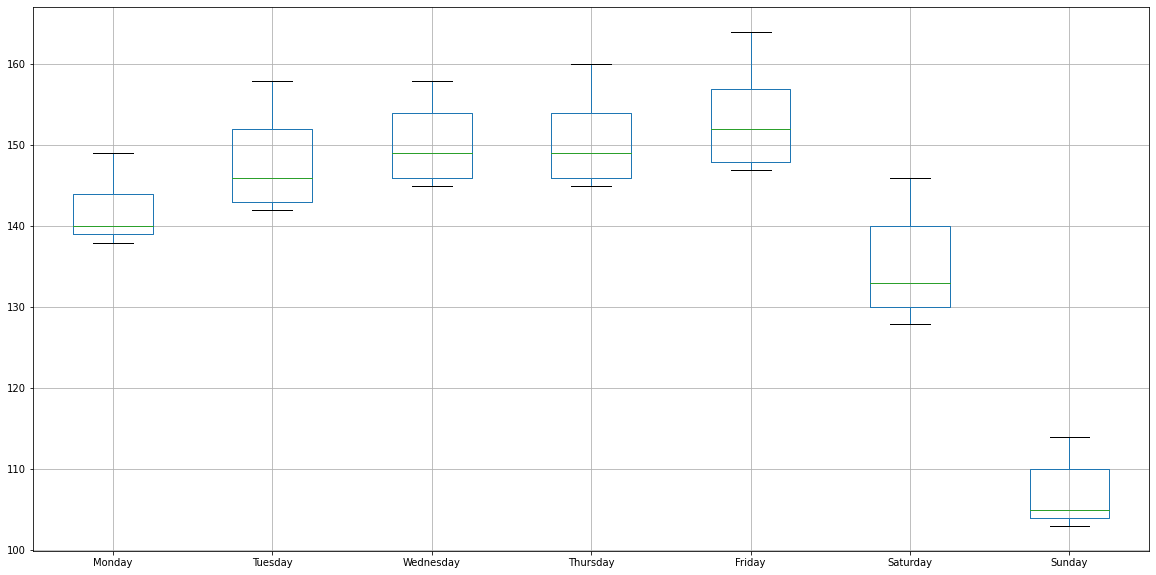

In [1171]:
indexed_numeric_df_week.boxplot(column=None,figsize=(20,10),grid=True)

In [1172]:
mean_of_week_array = indexed_numeric_df_week.mean(axis = 0).values
mean_of_week_list = mean_of_week_array.tolist()
mean_of_week_list

[142.0,
 147.76923076923077,
 150.3846153846154,
 150.6153846153846,
 153.0,
 134.69230769230768,
 107.07692307692308]

In [1173]:
# Max of the list
max(mean_of_week_list)

153.0

In [1174]:
# Sum of all values
sum_of_week_value = sum(mean_of_week_list)
sum_of_week_value

985.5384615384617

In [1175]:
required_week_list = [(x/sum_of_week_value)*100 for x in  mean_of_week_list]

In [1176]:
sum(required_week_list)

99.99999999999999

In [1177]:
required_week_list

[14.408367155791444,
 14.99375585388698,
 15.25913206369029,
 15.282547611614108,
 15.524508273493598,
 13.66687480487043,
 10.864814236653137]

# North east area energy demand estimation per day per month in year 2025

In [1178]:
weekWise_list = []
for z in range(0,len(indexed_selected_area_df['Monthly_Energy_Demand(MegaWatt-Hours)'])):
  ed_week = indexed_selected_area_df['Monthly_Energy_Demand(MegaWatt-Hours)'].values
  #print(ed_week[z])
  #print("--")
  dayWise_list = []
  for k in required_week_list:
    #print((k * ed_week[z]/100)/4)
    dayWise_list.append((k * ed_week[z]/100)/4)
  weekWise_list.append(dayWise_list)  


#weekWise_list

In [1179]:
weekWise_df = pd.DataFrame()

In [1180]:
for j in range(0,len(weekWise_list)):
  weekWise_df[j] = weekWise_list[j]

In [1181]:
weekWise_df['day'] = week_list

In [1182]:
indexed_weekWise_df = weekWise_df.set_index('day')
transposed_indexed_weekWise_df = indexed_weekWise_df.T

In [1183]:
transposed_indexed_weekWise_df['Month'] = year_period
transposed_indexed_weekWise_df

day        Monday       Tuesday     Wednesday  ...      Saturday        Sunday  Month
0    39458.916780  41062.068870  41788.831151  ...  37428.257466  29754.502794    Jan
1    37523.912207  39048.448185  39739.571162  ...  35592.833302  28295.387753    Feb
2    42949.513264  44694.482655  45485.535445  ...  40739.218703  32386.631887    Mar
3    40635.096030  42286.034385  43034.459772  ...  38543.907448  30641.415858    Apr
4    42911.571998  44654.999896  45445.353877  ...  40703.229994  32358.021788    May
5    40824.802361  42483.448177  43235.367614  ...  38723.850993  30784.466352    Jun
6    41925.099079  43628.448175  44400.633098  ...  39767.523557  31614.159219    Jul
7    37979.207401  39522.241288  40221.749983  ...  36024.697811  28638.708939    Aug
8    40938.626159  42601.896453  43355.912319  ...  38831.817121  30870.296649    Sep
9    42038.922877  43746.896450  44521.177803  ...  39875.489685  31699.989515    Oct
10   40900.684893  42562.413694  43315.730751  ...  38795.828412  30841.686550    Nov
11   38282.737530  39838.103356  40543.202530  ...  36312.607484  28867.589730    Dec

[12 rows x 8 columns]

In [1184]:
indexed_final_df_week = transposed_indexed_weekWise_df.set_index('Month')

In [1185]:
indexed_final_df_week

day          Monday       Tuesday  ...      Saturday        Sunday
Month                              ...                            
Jan    39458.916780  41062.068870  ...  37428.257466  29754.502794
Feb    37523.912207  39048.448185  ...  35592.833302  28295.387753
Mar    42949.513264  44694.482655  ...  40739.218703  32386.631887
Apr    40635.096030  42286.034385  ...  38543.907448  30641.415858
May    42911.571998  44654.999896  ...  40703.229994  32358.021788
Jun    40824.802361  42483.448177  ...  38723.850993  30784.466352
Jul    41925.099079  43628.448175  ...  39767.523557  31614.159219
Aug    37979.207401  39522.241288  ...  36024.697811  28638.708939
Sep    40938.626159  42601.896453  ...  38831.817121  30870.296649
Oct    42038.922877  43746.896450  ...  39875.489685  31699.989515
Nov    40900.684893  42562.413694  ...  38795.828412  30841.686550
Dec    38282.737530  39838.103356  ...  36312.607484  28867.589730

[12 rows x 7 columns]

# Final day wise estimate

In [1186]:
result = pd.concat([indexed_selected_area_df, indexed_final_df_week], axis=1)

In [1187]:
del result['Monthly_Energy_Demand(MegaWatt-Hours)']

In [1188]:
result.style.background_gradient(cmap="Greens")

# Time wise analysis

In [1189]:
# Creating a wb variable to store the spreadsheet bu URL

wb_time = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O8jNkQuzQSzwwHSmcw1BjSEFhs-Xj4Tt9s7mFJEGyS8/edit#gid=1934667143')

In [1190]:
# Getting the sheet(if multiple sheets exists) by sheet name

sheet_time = wb_time.worksheet('Time')

In [1191]:
# Getting all values that exist in the sheet

data_time = sheet_time.get_all_values()

In [1192]:
# Converting the values into a dataframe

data_frame_time = pd.DataFrame(data_time)

In [1193]:
data_frame_time

0       1       2       3   ...      14      15      16      17
0   Time of day    2019    2018    2017  ...    2006    2005    2004    2003
1   0000 - 0059   16.94   20.51   23.77  ...   33.75   28.39   30.34   30.87
2   0100 - 0159    8.15    6.86   10.67  ...   13.38   10.66   11.74   11.84
3   0200 - 0259    4.62    5.91    6.71  ...    7.38    6.61    6.15    7.68
4   0300 - 0359    5.47    6.89    5.93  ...    5.57    4.29    4.74    6.86
5   0400 - 0459   12.05   12.67   12.04  ...   12.12   10.06   10.92   11.51
6   0500 - 0559   39.87   50.24   38.83  ...   37.77   36.58   32.93   36.64
7   0600 - 0659  114.75  102.59  104.79  ...   92.32   84.19   90.22   88.92
8   0700 - 0759  248.44  247.69  253.25  ...  237.49  227.11  239.37  228.34
9   0800 - 0859  427.88  418.64  407.65  ...  406.75  405.25  416.54  417.86
10  0900 - 0959  432.93  437.04  444.59  ...  420.78  419.60  420.53  417.88
11  1000 - 1059  542.50  528.72  529.51  ...  511.70  489.19  468.20  486.62
12  1100 - 1159  568.44  555.17  570.89  ...  537.48  533.99  530.55  529.88
13  1200 - 1259  539.34  535.11  554.74  ...  527.75  517.30  527.65  518.92
14  1300 - 1359  490.71  483.38  479.58  ...  490.61  466.27  476.75  480.15
15  1400 - 1459  486.05  495.30  483.07  ...  470.56  474.39  472.09  466.21
16  1500 - 1559  510.65  511.15  498.98  ...  498.57  486.75  491.91  494.45
17  1600 - 1659  497.31  504.89  496.94  ...  499.87  500.44  487.71  495.04
18  1700 - 1759  472.71  491.66  490.99  ...  499.16  509.69  498.79  503.72
19  1800 - 1859  373.18  381.89  390.87  ...  403.58  402.34  410.73  406.65
20  1900 - 1959  255.70  265.44  265.15  ...  296.70  298.84  297.98  303.54
21  2000 - 2059  156.80  168.73  164.33  ...  191.86  193.00  190.20  200.09
22  2100 - 2159  109.83  110.40  117.27  ...  134.51  134.79  134.27  144.43
23  2200 - 2259   80.42   82.04   85.47  ...  101.76  100.35  107.07  106.94
24  2300 - 2359   45.63   55.58   49.32  ...   68.68   77.04   75.44   72.64

[25 rows x 18 columns]

In [1194]:
# Getting the first row to be the header

data_frame_time.columns = data_frame_time.iloc[0]

data_frame_time = data_frame_time.iloc[1:].reset_index(drop=True)

data_frame_time

0   Time of day    2019    2018    2017  ...    2006    2005    2004    2003
0   0000 - 0059   16.94   20.51   23.77  ...   33.75   28.39   30.34   30.87
1   0100 - 0159    8.15    6.86   10.67  ...   13.38   10.66   11.74   11.84
2   0200 - 0259    4.62    5.91    6.71  ...    7.38    6.61    6.15    7.68
3   0300 - 0359    5.47    6.89    5.93  ...    5.57    4.29    4.74    6.86
4   0400 - 0459   12.05   12.67   12.04  ...   12.12   10.06   10.92   11.51
5   0500 - 0559   39.87   50.24   38.83  ...   37.77   36.58   32.93   36.64
6   0600 - 0659  114.75  102.59  104.79  ...   92.32   84.19   90.22   88.92
7   0700 - 0759  248.44  247.69  253.25  ...  237.49  227.11  239.37  228.34
8   0800 - 0859  427.88  418.64  407.65  ...  406.75  405.25  416.54  417.86
9   0900 - 0959  432.93  437.04  444.59  ...  420.78  419.60  420.53  417.88
10  1000 - 1059  542.50  528.72  529.51  ...  511.70  489.19  468.20  486.62
11  1100 - 1159  568.44  555.17  570.89  ...  537.48  533.99  530.55  529.88
12  1200 - 1259  539.34  535.11  554.74  ...  527.75  517.30  527.65  518.92
13  1300 - 1359  490.71  483.38  479.58  ...  490.61  466.27  476.75  480.15
14  1400 - 1459  486.05  495.30  483.07  ...  470.56  474.39  472.09  466.21
15  1500 - 1559  510.65  511.15  498.98  ...  498.57  486.75  491.91  494.45
16  1600 - 1659  497.31  504.89  496.94  ...  499.87  500.44  487.71  495.04
17  1700 - 1759  472.71  491.66  490.99  ...  499.16  509.69  498.79  503.72
18  1800 - 1859  373.18  381.89  390.87  ...  403.58  402.34  410.73  406.65
19  1900 - 1959  255.70  265.44  265.15  ...  296.70  298.84  297.98  303.54
20  2000 - 2059  156.80  168.73  164.33  ...  191.86  193.00  190.20  200.09
21  2100 - 2159  109.83  110.40  117.27  ...  134.51  134.79  134.27  144.43
22  2200 - 2259   80.42   82.04   85.47  ...  101.76  100.35  107.07  106.94
23  2300 - 2359   45.63   55.58   49.32  ...   68.68   77.04   75.44   72.64

[24 rows x 18 columns]

In [1195]:
indexed_data_time = data_frame_time.set_index('Time of day')
indexed_data_time

0              2019    2018    2017    2016  ...    2006    2005    2004    2003
Time of day                                  ...                                
0000 - 0059   16.94   20.51   23.77   23.63  ...   33.75   28.39   30.34   30.87
0100 - 0159    8.15    6.86   10.67   10.15  ...   13.38   10.66   11.74   11.84
0200 - 0259    4.62    5.91    6.71    7.36  ...    7.38    6.61    6.15    7.68
0300 - 0359    5.47    6.89    5.93    6.86  ...    5.57    4.29    4.74    6.86
0400 - 0459   12.05   12.67   12.04   13.08  ...   12.12   10.06   10.92   11.51
0500 - 0559   39.87   50.24   38.83   42.19  ...   37.77   36.58   32.93   36.64
0600 - 0659  114.75  102.59  104.79  108.38  ...   92.32   84.19   90.22   88.92
0700 - 0759  248.44  247.69  253.25  247.61  ...  237.49  227.11  239.37  228.34
0800 - 0859  427.88  418.64  407.65  402.72  ...  406.75  405.25  416.54  417.86
0900 - 0959  432.93  437.04  444.59  423.29  ...  420.78  419.60  420.53  417.88
1000 - 1059  542.50  528.72  529.51  521.47  ...  511.70  489.19  468.20  486.62
1100 - 1159  568.44  555.17  570.89  554.86  ...  537.48  533.99  530.55  529.88
1200 - 1259  539.34  535.11  554.74  528.28  ...  527.75  517.30  527.65  518.92
1300 - 1359  490.71  483.38  479.58  483.51  ...  490.61  466.27  476.75  480.15
1400 - 1459  486.05  495.30  483.07  482.52  ...  470.56  474.39  472.09  466.21
1500 - 1559  510.65  511.15  498.98  510.60  ...  498.57  486.75  491.91  494.45
1600 - 1659  497.31  504.89  496.94  486.09  ...  499.87  500.44  487.71  495.04
1700 - 1759  472.71  491.66  490.99  477.61  ...  499.16  509.69  498.79  503.72
1800 - 1859  373.18  381.89  390.87  400.39  ...  403.58  402.34  410.73  406.65
1900 - 1959  255.70  265.44  265.15  279.37  ...  296.70  298.84  297.98  303.54
2000 - 2059  156.80  168.73  164.33  170.92  ...  191.86  193.00  190.20  200.09
2100 - 2159  109.83  110.40  117.27  116.30  ...  134.51  134.79  134.27  144.43
2200 - 2259   80.42   82.04   85.47   87.89  ...  101.76  100.35  107.07  106.94
2300 - 2359   45.63   55.58   49.32   57.05  ...   68.68   77.04   75.44   72.64

[24 rows x 17 columns]

In [1196]:
sample_time = indexed_data_time.values.astype(float)
numeric_df_time = pd.DataFrame(sample_time)
numeric_df_time

0       1       2       3   ...      13      14      15      16
0    16.94   20.51   23.77   23.63  ...   33.75   28.39   30.34   30.87
1     8.15    6.86   10.67   10.15  ...   13.38   10.66   11.74   11.84
2     4.62    5.91    6.71    7.36  ...    7.38    6.61    6.15    7.68
3     5.47    6.89    5.93    6.86  ...    5.57    4.29    4.74    6.86
4    12.05   12.67   12.04   13.08  ...   12.12   10.06   10.92   11.51
5    39.87   50.24   38.83   42.19  ...   37.77   36.58   32.93   36.64
6   114.75  102.59  104.79  108.38  ...   92.32   84.19   90.22   88.92
7   248.44  247.69  253.25  247.61  ...  237.49  227.11  239.37  228.34
8   427.88  418.64  407.65  402.72  ...  406.75  405.25  416.54  417.86
9   432.93  437.04  444.59  423.29  ...  420.78  419.60  420.53  417.88
10  542.50  528.72  529.51  521.47  ...  511.70  489.19  468.20  486.62
11  568.44  555.17  570.89  554.86  ...  537.48  533.99  530.55  529.88
12  539.34  535.11  554.74  528.28  ...  527.75  517.30  527.65  518.92
13  490.71  483.38  479.58  483.51  ...  490.61  466.27  476.75  480.15
14  486.05  495.30  483.07  482.52  ...  470.56  474.39  472.09  466.21
15  510.65  511.15  498.98  510.60  ...  498.57  486.75  491.91  494.45
16  497.31  504.89  496.94  486.09  ...  499.87  500.44  487.71  495.04
17  472.71  491.66  490.99  477.61  ...  499.16  509.69  498.79  503.72
18  373.18  381.89  390.87  400.39  ...  403.58  402.34  410.73  406.65
19  255.70  265.44  265.15  279.37  ...  296.70  298.84  297.98  303.54
20  156.80  168.73  164.33  170.92  ...  191.86  193.00  190.20  200.09
21  109.83  110.40  117.27  116.30  ...  134.51  134.79  134.27  144.43
22   80.42   82.04   85.47   87.89  ...  101.76  100.35  107.07  106.94
23   45.63   55.58   49.32   57.05  ...   68.68   77.04   75.44   72.64

[24 rows x 17 columns]

In [1197]:
numeric_df_time.index = indexed_data_time.index
numeric_df_time.columns = indexed_data_time.columns
transposed_data_time = numeric_df_time.T
transposed_data_time.style.background_gradient(cmap="Blues")

# Time stats

In [1198]:
mean_of_time_array = transposed_data_time.mean(axis = 0).values
mean_of_time_list = mean_of_time_array.tolist()
mean_of_time_list

[25.656470588235294,
 10.298823529411765,
 6.234705882352942,
 5.407647058823529,
 11.04294117647059,
 38.47,
 96.79411764705883,
 238.6394117647059,
 409.5899999999999,
 418.8858823529412,
 497.3664705882352,
 536.4876470588234,
 519.7276470588235,
 470.65352941176474,
 467.0894117647059,
 490.10823529411766,
 487.75882352941187,
 487.72294117647056,
 391.1241176470589,
 279.0488235294117,
 176.74705882352941,
 122.59529411764706,
 93.05117647058823,
 62.021764705882376]

In [1199]:
len(mean_of_time_list)

24

In [1200]:
# Max of the list
max(mean_of_time_list)

536.4876470588234

In [1201]:
# Sum of all values
sum_of_time_value = sum(mean_of_time_list)
sum_of_time_value

6342.522941176469

In [1202]:
required_time_list = [(x/sum_of_time_value)*100 for x in  mean_of_time_list]

In [1203]:
sum(required_time_list)

100.00000000000001

In [1204]:
required_time_list

[0.40451521935648366,
 0.1623773950039737,
 0.09830009193780656,
 0.08526018918617374,
 0.17410959769303166,
 0.606540967321503,
 1.5261137964304243,
 3.76253131408368,
 6.457840260078355,
 6.604404686240558,
 7.84177645396075,
 8.458584257943745,
 8.19433610061834,
 7.420604289126365,
 7.364410284309762,
 7.72733878678266,
 7.690296559478236,
 7.689730816897971,
 6.166696144019143,
 4.399650204144964,
 2.786699558878454,
 1.932910535045017,
 1.4671003531810363,
 0.9778721382815844]

In [1205]:
required_time_list2 = [round(k,2) for k in required_time_list]

In [1206]:
required_time_list2

[0.4,
 0.16,
 0.1,
 0.09,
 0.17,
 0.61,
 1.53,
 3.76,
 6.46,
 6.6,
 7.84,
 8.46,
 8.19,
 7.42,
 7.36,
 7.73,
 7.69,
 7.69,
 6.17,
 4.4,
 2.79,
 1.93,
 1.47,
 0.98]

In [1207]:
final_time_df = pd.DataFrame()
final_time_df['Distribution_of_Travel'] = required_time_list2
final_time_df.index = transposed_data_time.columns

In [1208]:
final_time_df.style.background_gradient(cmap="Blues")

In [1209]:
final_time_df['Distribution_of_Travel'].values

array([0.4 , 0.16, 0.1 , 0.09, 0.17, 0.61, 1.53, 3.76, 6.46, 6.6 , 7.84,
       8.46, 8.19, 7.42, 7.36, 7.73, 7.69, 7.69, 6.17, 4.4 , 2.79, 1.93,
       1.47, 0.98])

# North east region energy demand estimation for year 2025 per hour in the month of jan on a monday

In [1210]:
required_day = result['Monday']['Jan']

In [1211]:
required_timeWise_data = [(required_day * j)/100 for j in final_time_df['Distribution_of_Travel'].values]

In [1212]:
final_time_df['Energy_demand(Mw-hours)'] = required_timeWise_data

In [1213]:
final_time_df.style.background_gradient(cmap="CMRmap")

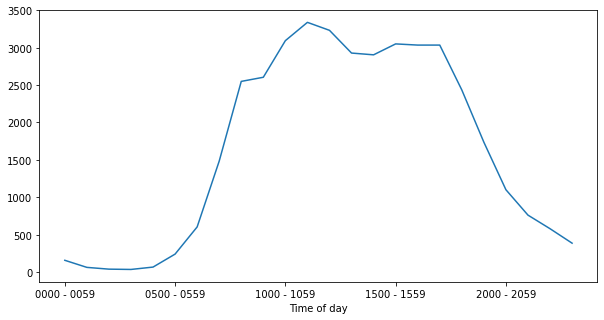

In [1214]:
plt.figure(figsize=(10,5))
final_time_df['Energy_demand(Mw-hours)'].plot()
plt.show()